Group members:

Jose Reyes- student number:2022240

Liudmila Stolbetskaia- student number: 2020291

Giovanna Amorim- student number: 2022502


## Introduction

A stock exchange or stock market is a physical or digital place where investors can buy and sell stock, or shares, in publicly traded companies. The price of each share is driven by supply and demand, as well as investor sentiment, and domestic and global economic trends.
The idea of trading goods dates back to the earliest civilizations. Early businesses would combine their funds to take ships across the sea to other countries. These transactions were either implemented by trading groups or individuals for thousands of years. 
In this project four companies’ datasets: Meta, Google, Microsoft and Apple will be analyzed using different Data analysis techniques, including data cleaning, data feature engineering, machine learning, time series and clustering. The aim of this project is to predict the next year’s closing prices of the four companies mentioned before.
The reason why these companies were selected is due to their importance in stock markets and also because all of them are related to digital technology.



## Business understanding

According to (Forbes.com, 2023) stock markets are a constellation of marketplaces where securities like stocks and bonds are bought and sold. Stock markets provide you with easy, transparent access to investment assets, and they help professional investors determine fair prices for public companies. The stock market helps companies raise money to fund operations by selling shares of stock, and it creates and sustains wealth for individual investors.
Companies raise money on the stock market by selling ownership stakes to investors. These equity stakes are known as shares of stock. Thi is how it works, companies list shares for sale on the stock exchanges that make up the stock market, companies get access to the capital they need to operate and expand their businesses without having to take on debt. In exchange for the privilege of selling stock to the public, companies are required to disclose information and give shareholders a say in how their businesses are run.
Investors benefit by exchanging their money for shares on the stock market. As companies put that money to work growing and expanding their businesses, investors reap the benefits as their shares of stock become more valuable over time, leading to capital gains. In addition, companies pay dividends to their shareholders as their profits grow.
The performances of individual stocks vary widely over time, but taken as a whole the stock market has historically rewarded investors with average annual returns of around 10%, making it one of the most reliable ways of growing your money.


## Data understanding

The dataset that has been used for this project is a dataset that contain information from 4 different companies: Meta, Google, Microsoft and Apple. The dataset shows stock market information from 2013 to 2022.  The dataset contains 10072 rows and 10 columns.
The features in this dataset are:

•	Date - specifies trading date

•	Open - opening price

•	High - maximum price during the day

•	Low - minimum price during the day

•	Close - close price adjusted for splits

•	Adj Close - adjusted close price adjusted for both dividends and splits

•	Volume - the number of shares that changed hands during a given day

•	Company – companies’ name

•	Origin – companies’ country

  Headquarters – Companies’ headquarters location


## Objectives

To predict the closing price of Meta, Google, Microsoft and Apple stock-market using different machine learning models.

To compare the performance of two machine learning model when making predictions and future forecasting.



## CRIPS-DM

The Project Management approach used in this project is CRIPS-DM.

The reason why we have used CRIPS-DM is because it works really well with small groups and we are only 3 people in this group, it only has 6 stages which are, Business understanding, Data understanding, Data preparation, Modeling, Evaluation and deployment, which is exactly what we need for our project. We can split these tasks between team members,and split activities.  Besides that, according to (data science-pm, 2023) it has the following advantages:
•	Adopt-able: Like Kanban, CRISP-DM can be implemented without much training, organizational role changes, or controversy.
•	Right Start: The initial focus on Business Understanding is helpful to align technical work with business needs and to steer data scientists away from jumping into a problem without properly understanding business objectives.
•	Strong Finish: Its final step Deployment likewise addresses important considerations to close out the project and transition to maintenance and operations.
•	Flexible: A loose CRISP-DM implementation can be flexible to provide many of the benefits of agile principles and practices. By accepting that a project starts with significant unknowns, the user can cycle through steps, each time gaining a deeper understanding of the data and the problem. The empirical knowledge learned from previous cycles can then feed into the following cycles. 


## Importing libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from IPython.display import Markdown
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import Markdown
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [ ]:
#reach to the Google drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation 

<a id='0'></a>
## 1. Opening

On the following steps, we will open the datasets picked up to analyse on the project.
The opening of the datasets will be followed by the procedure of include a new column called "**Company**" which will denominate the name of the company the observations will belong to. 

In [ ]:

Apple = pd.read_csv("/content/drive/My Drive/ML_Business/AAPL.csv")
Apple

Date        Open        High         Low       Close   Adj Close  \
0     2013-01-02   19.779285   19.821428   19.343929   19.608213   16.837111   
1     2013-01-03   19.567142   19.631071   19.321428   19.360714   16.624598   
2     2013-01-04   19.177500   19.236786   18.779642   18.821428   16.161530   
3     2013-01-07   18.642857   18.903570   18.400000   18.710714   16.066448   
4     2013-01-08   18.900356   18.996071   18.616072   18.761070   16.109694   
...          ...         ...         ...         ...         ...         ...   
2513  2022-12-23  130.919998  132.419998  129.639999  131.860001  131.658981   
2514  2022-12-27  131.380005  131.410004  128.720001  130.029999  129.831772   
2515  2022-12-28  129.669998  131.029999  125.870003  126.040001  125.847855   
2516  2022-12-29  127.989998  130.479996  127.730003  129.610001  129.412415   
2517  2022-12-30  128.410004  129.949997  127.430000  129.929993  129.731918   

         Volume  
0     560518000  
1     352965200  
2     594333600  
3     484156400  
4     458707200  
...         ...  
2513   63814900  
2514   69007800  
2515   85438400  
2516   75703700  
2517   77034200  

[2518 rows x 7 columns]

In [ ]:
Apple = Apple.assign(Company="Apple", Origin="Los Altos, California, United States", Headquarter="Cupertino, California, United States")
Apple.head()

Date       Open       High        Low      Close  Adj Close  \
0  2013-01-02  19.779285  19.821428  19.343929  19.608213  16.837111   
1  2013-01-03  19.567142  19.631071  19.321428  19.360714  16.624598   
2  2013-01-04  19.177500  19.236786  18.779642  18.821428  16.161530   
3  2013-01-07  18.642857  18.903570  18.400000  18.710714  16.066448   
4  2013-01-08  18.900356  18.996071  18.616072  18.761070  16.109694   

      Volume Company                                Origin  \
0  560518000   Apple  Los Altos, California, United States   
1  352965200   Apple  Los Altos, California, United States   
2  594333600   Apple  Los Altos, California, United States   
3  484156400   Apple  Los Altos, California, United States   
4  458707200   Apple  Los Altos, California, United States   

                            Headquarter  
0  Cupertino, California, United States  
1  Cupertino, California, United States  
2  Cupertino, California, United States  
3  Cupertino, California, United States  
4  Cupertino, California, United States

In [ ]:
Apple.tail()

Date        Open        High         Low       Close   Adj Close  \
2513  2022-12-23  130.919998  132.419998  129.639999  131.860001  131.658981   
2514  2022-12-27  131.380005  131.410004  128.720001  130.029999  129.831772   
2515  2022-12-28  129.669998  131.029999  125.870003  126.040001  125.847855   
2516  2022-12-29  127.989998  130.479996  127.730003  129.610001  129.412415   
2517  2022-12-30  128.410004  129.949997  127.430000  129.929993  129.731918   

        Volume Company                                Origin  \
2513  63814900   Apple  Los Altos, California, United States   
2514  69007800   Apple  Los Altos, California, United States   
2515  85438400   Apple  Los Altos, California, United States   
2516  75703700   Apple  Los Altos, California, United States   
2517  77034200   Apple  Los Altos, California, United States   

                               Headquarter  
2513  Cupertino, California, United States  
2514  Cupertino, California, United States  
2515  Cupertino, California, United States  
2516  Cupertino, California, United States  
2517  Cupertino, California, United States

_______________________________________________________________________

In [ ]:
Google = pd.read_csv("/content/drive/My Drive/ML_Business/GOOGL.csv")
Google

Date       Open       High        Low      Close  Adj Close  \
0     2013-01-02  18.003504  18.193193  17.931683  18.099348  18.099348   
1     2013-01-03  18.141392  18.316566  18.036036  18.109859  18.109859   
2     2013-01-04  18.251753  18.555305  18.210211  18.467718  18.467718   
3     2013-01-07  18.404655  18.503002  18.282784  18.387136  18.387136   
4     2013-01-08  18.406906  18.425926  18.128880  18.350851  18.350851   
...          ...        ...        ...        ...        ...        ...   
2513  2022-12-23  87.110001  89.550003  87.070000  89.230003  89.230003   
2514  2022-12-27  88.800003  88.940002  87.010002  87.389999  87.389999   
2515  2022-12-28  86.980003  88.040001  85.940002  86.019997  86.019997   
2516  2022-12-29  86.620003  88.849998  86.610001  88.449997  88.449997   
2517  2022-12-30  86.980003  88.300003  86.570000  88.230003  88.230003   

         Volume  
0     101550348  
1      92635272  
2     110429460  
3      66161772  
4      66976956  
...         ...  
2513   23003000  
2514   20097300  
2515   19523200  
2516   23333500  
2517   23986300  

[2518 rows x 7 columns]

In [ ]:
Google = Google.assign(Company="Google",Origin="Menlo Park, California, United States", Headquarter="Mountain View, California, United States")
Google

Date       Open       High        Low      Close  Adj Close  \
0     2013-01-02  18.003504  18.193193  17.931683  18.099348  18.099348   
1     2013-01-03  18.141392  18.316566  18.036036  18.109859  18.109859   
2     2013-01-04  18.251753  18.555305  18.210211  18.467718  18.467718   
3     2013-01-07  18.404655  18.503002  18.282784  18.387136  18.387136   
4     2013-01-08  18.406906  18.425926  18.128880  18.350851  18.350851   
...          ...        ...        ...        ...        ...        ...   
2513  2022-12-23  87.110001  89.550003  87.070000  89.230003  89.230003   
2514  2022-12-27  88.800003  88.940002  87.010002  87.389999  87.389999   
2515  2022-12-28  86.980003  88.040001  85.940002  86.019997  86.019997   
2516  2022-12-29  86.620003  88.849998  86.610001  88.449997  88.449997   
2517  2022-12-30  86.980003  88.300003  86.570000  88.230003  88.230003   

         Volume Company                                 Origin  \
0     101550348  Google  Menlo Park, California, United States   
1      92635272  Google  Menlo Park, California, United States   
2     110429460  Google  Menlo Park, California, United States   
3      66161772  Google  Menlo Park, California, United States   
4      66976956  Google  Menlo Park, California, United States   
...         ...     ...                                    ...   
2513   23003000  Google  Menlo Park, California, United States   
2514   20097300  Google  Menlo Park, California, United States   
2515   19523200  Google  Menlo Park, California, United States   
2516   23333500  Google  Menlo Park, California, United States   
2517   23986300  Google  Menlo Park, California, United States   

                                   Headquarter  
0     Mountain View, California, United States  
1     Mountain View, California, United States  
2     Mountain View, California, United States  
3     Mountain View, California, United States  
4     Mountain View, California, United States  
...                                        ...  
2513  Mountain View, California, United States  
2514  Mountain View, California, United States  
2515  Mountain View, California, United States  
2516  Mountain View, California, United States  
2517  Mountain View, California, United States  

[2518 rows x 10 columns]

_______________________________________________________________

In [ ]:
Meta = pd.read_csv("/content/drive/My Drive/ML_Business/META.csv")

In [ ]:
Meta = Meta.assign(Company="Meta",Origin="Cambridge, Massachusetts, United States", Headquarter="Menlo Park, California, United States")
Meta

Date        Open        High         Low       Close   Adj Close  \
0     2013-01-02   27.440001   28.180000   27.420000   28.000000   28.000000   
1     2013-01-03   27.879999   28.469999   27.590000   27.770000   27.770000   
2     2013-01-04   28.010000   28.930000   27.830000   28.760000   28.760000   
3     2013-01-07   28.690001   29.790001   28.650000   29.420000   29.420000   
4     2013-01-08   29.510000   29.600000   28.860001   29.059999   29.059999   
...          ...         ...         ...         ...         ...         ...   
2513  2022-12-23  116.029999  118.180000  115.540001  118.040001  118.040001   
2514  2022-12-27  117.930000  118.599998  116.050003  116.879997  116.879997   
2515  2022-12-28  116.250000  118.150002  115.510002  115.620003  115.620003   
2516  2022-12-29  116.400002  121.029999  115.769997  120.260002  120.260002   
2517  2022-12-30  118.160004  120.419998  117.739998  120.339996  120.339996   

        Volume Company                                   Origin  \
0     69846400    Meta  Cambridge, Massachusetts, United States   
1     63140600    Meta  Cambridge, Massachusetts, United States   
2     72715400    Meta  Cambridge, Massachusetts, United States   
3     83781800    Meta  Cambridge, Massachusetts, United States   
4     45871300    Meta  Cambridge, Massachusetts, United States   
...        ...     ...                                      ...   
2513  17796600    Meta  Cambridge, Massachusetts, United States   
2514  21392300    Meta  Cambridge, Massachusetts, United States   
2515  19612500    Meta  Cambridge, Massachusetts, United States   
2516  22366200    Meta  Cambridge, Massachusetts, United States   
2517  19583800    Meta  Cambridge, Massachusetts, United States   

                                Headquarter  
0     Menlo Park, California, United States  
1     Menlo Park, California, United States  
2     Menlo Park, California, United States  
3     Menlo Park, California, United States  
4     Menlo Park, California, United States  
...                                     ...  
2513  Menlo Park, California, United States  
2514  Menlo Park, California, United States  
2515  Menlo Park, California, United States  
2516  Menlo Park, California, United States  
2517  Menlo Park, California, United States  

[2518 rows x 10 columns]

_______________________________________________________________

In [ ]:
Microsoft = pd.read_csv("/content/drive/My Drive/ML_Business/MSFT.csv")
Microsoft

Date        Open        High         Low       Close   Adj Close  \
0     2013-01-02   27.250000   27.730000   27.150000   27.620001   22.717789   
1     2013-01-03   27.629999   27.650000   27.160000   27.250000   22.413460   
2     2013-01-04   27.270000   27.340000   26.730000   26.740000   21.993973   
3     2013-01-07   26.770000   26.879999   26.639999   26.690001   21.952847   
4     2013-01-08   26.750000   26.790001   26.459999   26.549999   21.837690   
...          ...         ...         ...         ...         ...         ...   
2513  2022-12-23  236.110001  238.869995  233.940002  238.729996  238.133545   
2514  2022-12-27  238.699997  238.929993  235.830002  236.960007  236.367981   
2515  2022-12-28  236.889999  239.720001  234.169998  234.529999  233.944031   
2516  2022-12-29  235.649994  241.919998  235.649994  241.009995  240.407837   
2517  2022-12-30  238.210007  239.960007  236.660004  239.820007  239.220825   

        Volume  
0     52899300  
1     48294400  
2     52521100  
3     37110400  
4     44703100  
...        ...  
2513  21207000  
2514  16688600  
2515  17457100  
2516  19770700  
2517  21938500  

[2518 rows x 7 columns]

In [ ]:
Microsoft = Microsoft.assign(Company="Microsoft",Origin="Albuquerque, New Mexico, United States", Headquarter="Redmond, Washington, United States")
Microsoft

Date        Open        High         Low       Close   Adj Close  \
0     2013-01-02   27.250000   27.730000   27.150000   27.620001   22.717789   
1     2013-01-03   27.629999   27.650000   27.160000   27.250000   22.413460   
2     2013-01-04   27.270000   27.340000   26.730000   26.740000   21.993973   
3     2013-01-07   26.770000   26.879999   26.639999   26.690001   21.952847   
4     2013-01-08   26.750000   26.790001   26.459999   26.549999   21.837690   
...          ...         ...         ...         ...         ...         ...   
2513  2022-12-23  236.110001  238.869995  233.940002  238.729996  238.133545   
2514  2022-12-27  238.699997  238.929993  235.830002  236.960007  236.367981   
2515  2022-12-28  236.889999  239.720001  234.169998  234.529999  233.944031   
2516  2022-12-29  235.649994  241.919998  235.649994  241.009995  240.407837   
2517  2022-12-30  238.210007  239.960007  236.660004  239.820007  239.220825   

        Volume    Company                                  Origin  \
0     52899300  Microsoft  Albuquerque, New Mexico, United States   
1     48294400  Microsoft  Albuquerque, New Mexico, United States   
2     52521100  Microsoft  Albuquerque, New Mexico, United States   
3     37110400  Microsoft  Albuquerque, New Mexico, United States   
4     44703100  Microsoft  Albuquerque, New Mexico, United States   
...        ...        ...                                     ...   
2513  21207000  Microsoft  Albuquerque, New Mexico, United States   
2514  16688600  Microsoft  Albuquerque, New Mexico, United States   
2515  17457100  Microsoft  Albuquerque, New Mexico, United States   
2516  19770700  Microsoft  Albuquerque, New Mexico, United States   
2517  21938500  Microsoft  Albuquerque, New Mexico, United States   

                             Headquarter  
0     Redmond, Washington, United States  
1     Redmond, Washington, United States  
2     Redmond, Washington, United States  
3     Redmond, Washington, United States  
4     Redmond, Washington, United States  
...                                  ...  
2513  Redmond, Washington, United States  
2514  Redmond, Washington, United States  
2515  Redmond, Washington, United States  
2516  Redmond, Washington, United States  
2517  Redmond, Washington, United States  

[2518 rows x 10 columns]

______________________________________________________________________________________________

<a id='1'></a>
## 2. Merging datasets 

Bellow, the function **concat()** from *Pandas* library will be used in order to merge the datasets along with all the stocks observations. 

In [ ]:
data = pd.concat([Microsoft,Meta, Apple, Google])
data

Date       Open       High        Low      Close  Adj Close  \
0     2013-01-02  27.250000  27.730000  27.150000  27.620001  22.717789   
1     2013-01-03  27.629999  27.650000  27.160000  27.250000  22.413460   
2     2013-01-04  27.270000  27.340000  26.730000  26.740000  21.993973   
3     2013-01-07  26.770000  26.879999  26.639999  26.690001  21.952847   
4     2013-01-08  26.750000  26.790001  26.459999  26.549999  21.837690   
...          ...        ...        ...        ...        ...        ...   
2513  2022-12-23  87.110001  89.550003  87.070000  89.230003  89.230003   
2514  2022-12-27  88.800003  88.940002  87.010002  87.389999  87.389999   
2515  2022-12-28  86.980003  88.040001  85.940002  86.019997  86.019997   
2516  2022-12-29  86.620003  88.849998  86.610001  88.449997  88.449997   
2517  2022-12-30  86.980003  88.300003  86.570000  88.230003  88.230003   

        Volume    Company                                  Origin  \
0     52899300  Microsoft  Albuquerque, New Mexico, United States   
1     48294400  Microsoft  Albuquerque, New Mexico, United States   
2     52521100  Microsoft  Albuquerque, New Mexico, United States   
3     37110400  Microsoft  Albuquerque, New Mexico, United States   
4     44703100  Microsoft  Albuquerque, New Mexico, United States   
...        ...        ...                                     ...   
2513  23003000     Google   Menlo Park, California, United States   
2514  20097300     Google   Menlo Park, California, United States   
2515  19523200     Google   Menlo Park, California, United States   
2516  23333500     Google   Menlo Park, California, United States   
2517  23986300     Google   Menlo Park, California, United States   

                                   Headquarter  
0           Redmond, Washington, United States  
1           Redmond, Washington, United States  
2           Redmond, Washington, United States  
3           Redmond, Washington, United States  
4           Redmond, Washington, United States  
...                                        ...  
2513  Mountain View, California, United States  
2514  Mountain View, California, United States  
2515  Mountain View, California, United States  
2516  Mountain View, California, United States  
2517  Mountain View, California, United States  

[10072 rows x 10 columns]

In [ ]:
Clustering = data.iloc[:,1:6]

## 3. Descriptive Statistics about the Dataset

In [ ]:
data["Company"].value_counts()

Microsoft    2518
Meta         2518
Apple        2518
Google       2518
Name: Company, dtype: int64

In [ ]:
data.shape


(10072, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10072 entries, 0 to 2517
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         10072 non-null  object 
 1   Open         10072 non-null  float64
 2   High         10072 non-null  float64
 3   Low          10072 non-null  float64
 4   Close        10072 non-null  float64
 5   Adj Close    10072 non-null  float64
 6   Volume       10072 non-null  int64  
 7   Company      10072 non-null  object 
 8   Origin       10072 non-null  object 
 9   Headquarter  10072 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 865.6+ KB


In [ ]:
data.isna().sum() 

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Company        0
Origin         0
Headquarter    0
dtype: int64

This dataset contains 10,072 rows and 10 columns,this is the result after Concatenating data from 4 companies:Microsoft,Meta, Apple, Google, each of them has 2518 values. This dataset consists of categorical and numerical values. As displayed in the charts above there ar no missing values.

In [ ]:
data.describe()

Open          High           Low         Close     Adj Close  \
count  10072.000000  10072.000000  10072.000000  10072.000000  10072.000000   
mean      99.806913    100.926654     98.674467     99.834015     98.166958   
std       79.515558     80.484979     78.526690     79.528397     79.734072   
min       13.856071     14.271429     13.753571     13.947500     12.046198   
25%       38.584874     38.962625     38.292376     38.642126     36.687374   
50%       67.857498     68.437252     67.174251     67.854000     66.147095   
75%      142.369999    144.189995    140.703377    142.351879    141.737496   
max      381.679993    384.329987    378.809998    382.179993    382.179993   

             Volume  
count  1.007200e+04  
mean   6.904930e+07  
std    8.839611e+07  
min    5.913100e+06  
25%    2.373358e+07  
50%    3.527205e+07  
75%    8.000415e+07  
max    1.460852e+09

In [ ]:
data.describe(include=['O'])

Date    Company                                  Origin  \
count        10072      10072                                   10072   
unique        2518          4                                       4   
top     2013-01-02  Microsoft  Albuquerque, New Mexico, United States   
freq             4       2518                                    2518   

                               Headquarter  
count                                10072  
unique                                   4  
top     Redmond, Washington, United States  
freq                                  2518

Using describe() we can generate descriptive statistics including those that summarize the central tendency, dispersion, and shape of a dataset’s distribution. The chart shows that in general the mean price is always higher than the median price, which means that it has a positive skew distribution. Also we see that the closing price is almost always higher than the opening price, this helps to know if the performance was good or not during a given period of time.

## Closing price
The closing price is the raw price or cash value of the last transacted price in a security before the market officially closes for normal trading. It is often the reference point used by investors to compare a stock's performance since the previous day—and closing prices are frequently used to construct line graphs depicting historical price changes over time.(investopedia,2023) 
Let's see how the companies in our dataset have performed . Using some visualizations. 

## Distribution of Close Price per company.

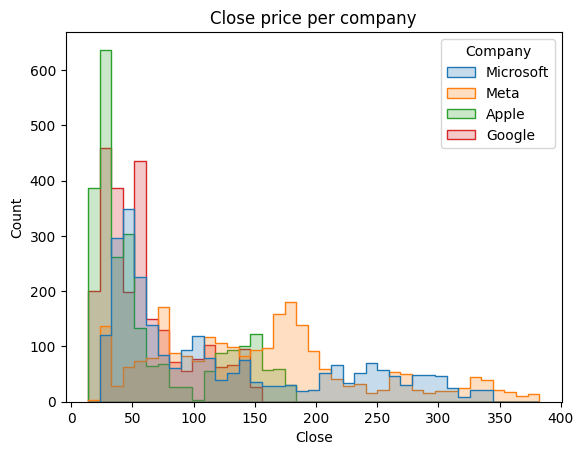

In [ ]:
sns.histplot(data=data, x="Close", hue="Company",element="step");
plt.title("Close price per company");

*In the Histogram above, we can check out the distribution of the feature "Close" price by company. The distribution is positively right-sked as we can tell by the image, which means "most values are clustered around the left tail of the distribution while the right tail of the distribution is longer"*.(Taylor Sebastian, 2022)



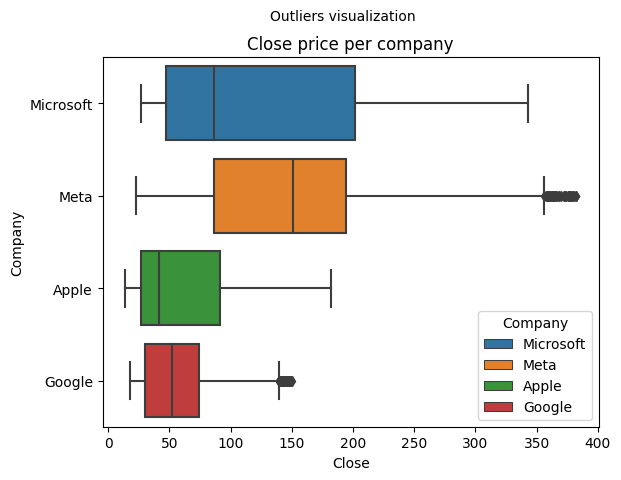

In [ ]:
sns.boxplot(data=data, x="Close", y = "Company", hue="Company", dodge=False)
plt.title("Close price per company")
plt.suptitle("Outliers visualization",fontsize=10);

*The boxplot was displayed above so that we could be able to have a deeper look at the outliers. Despite the boxplot helping to check out the distribution as well as the histogram, we picked it up by displaying them separately so we could analyse them with different goals.* 

*Going back to the outliers analysis, we have noticed that only the companies "Google" and "Meta" have outliers on the sampling we got. Nonetheless, accordingly, to the dataset and the dataset it belongs to, which is the stocks market, we decided not to remove the outlier once these noises and movements in the prices are a natural characteristic of the market we are working on and by getting rid out of that would be getting rid out of an important feature of the dataset itself and we don't want to do that for further analysis.* 

## Historical Performance of Close Price per company.

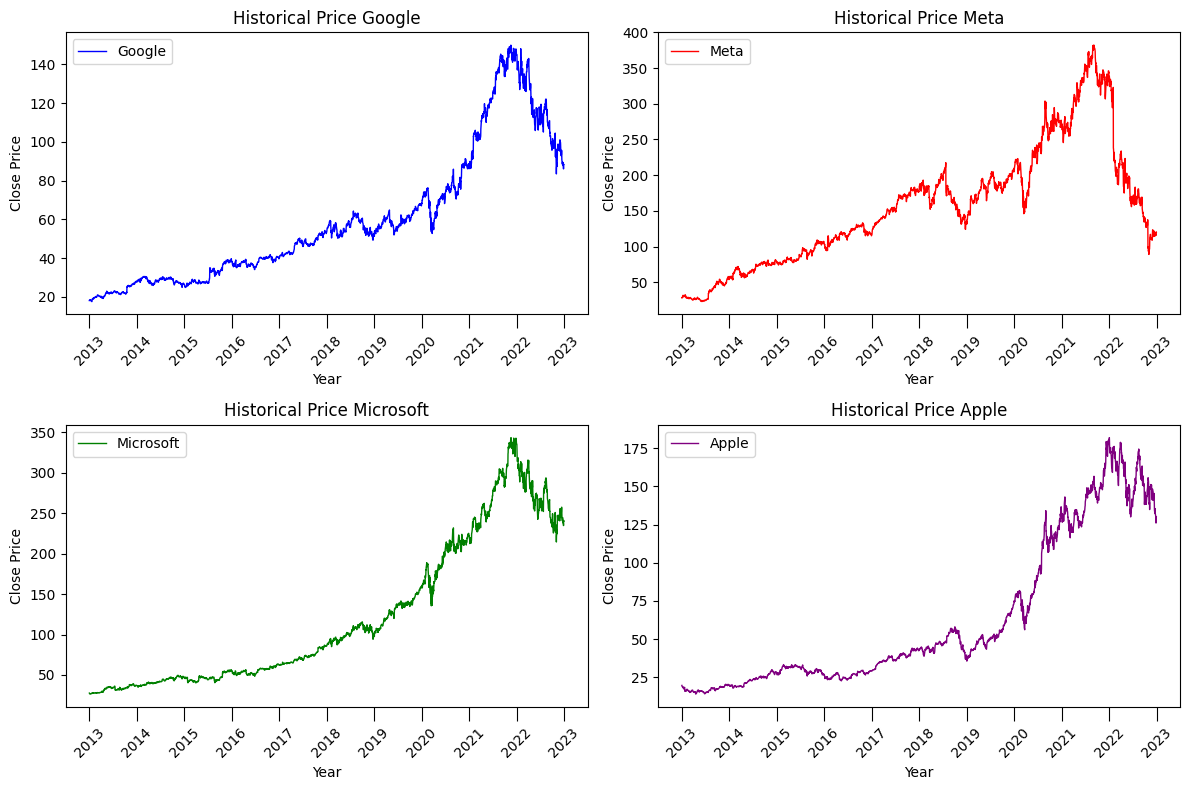

In [ ]:
plt.figsize=(15,10)

Google["Date"]=pd.to_datetime(Google.Date,format="%Y-%m-%d")
Meta["Date"] = pd.to_datetime(Meta.Date, format="%Y-%m-%d")
Microsoft["Date"] = pd.to_datetime(Microsoft.Date, format="%Y-%m-%d")
Apple["Date"] = pd.to_datetime(Apple.Date, format="%Y-%m-%d")

# Set Date as index column for all data frames
Google.index = Google['Date']
Meta.index = Meta['Date']
Microsoft.index = Microsoft['Date']
Apple.index = Apple['Date']

# Plot close price for all companies as subplots
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs[0, 0].plot(Google["Close"], label='Google', color='b',  lw=1.0, )
axs[0, 0].set_title('Historical Price Google')
axs[0, 1].plot(Meta["Close"], label='Meta', color='r',  lw=1.0)
axs[0, 1].set_title('Historical Price Meta')
axs[1, 0].plot(Microsoft["Close"], label='Microsoft', color='g',  lw=1.0)
axs[1, 0].set_title('Historical Price Microsoft')
axs[1, 1].plot(Apple["Close"], label='Apple', color='purple',  lw=1.0)
axs[1, 1].set_title('Historical Price Apple')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Close Price')
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45, size = 10)


plt.tight_layout()
plt.show()

The graphs above show the historical Close price performance for each company, All of them had a great perfomance between 2020 and 2021. Then Meta shows a big drop in price in the last year.

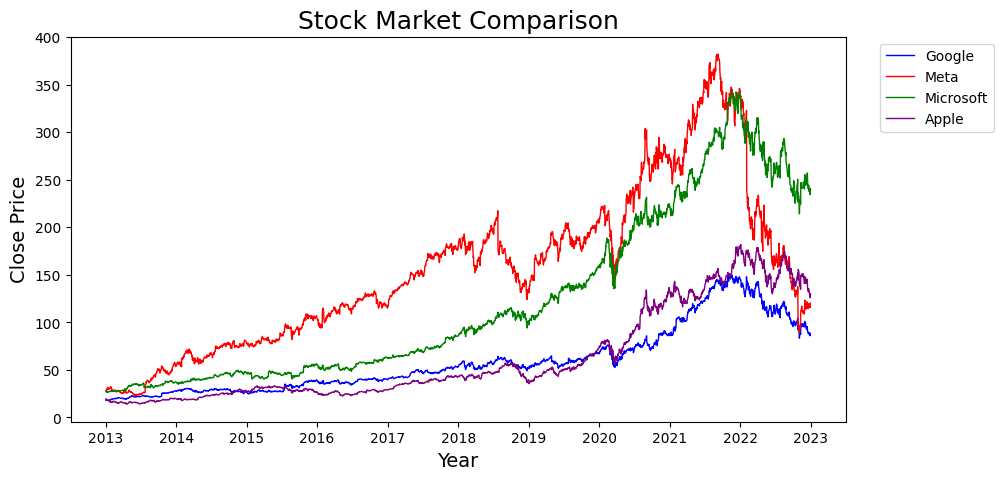

In [ ]:
# Plot close price for all companies
plt.figure(figsize=(10,5))
plt.plot(Google["Close"], label='Google', color='b', lw=1.0)
plt.plot(Meta["Close"], label='Meta', color='r',lw=1.0)
plt.plot(Microsoft["Close"], label='Microsoft', color='g', lw=1.0)
plt.plot(Apple["Close"], label='Apple', color='purple', lw=1.0)

plt.xlabel("Year", size=14)
plt.ylabel("Close Price", size=14)
plt.title("Stock Market Comparison", size=18)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
plt.show()

This graph above show the comparison of all the companies together. we see how Google and Apple show a similar perfomance with a more steady trend than the other 2 companies.

## 4. Correlation

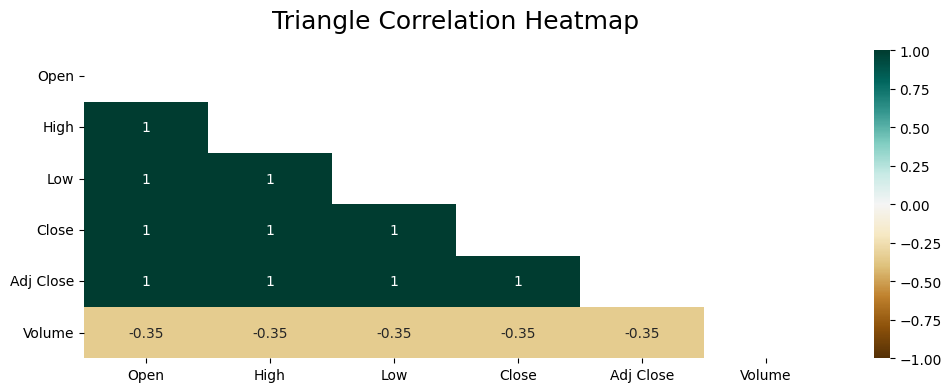

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,4))
mask = np.triu(np.ones_like(data.corr(method = "pearson"), dtype=bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

The correlation between the variables but volume, is positively strong. This means that the Closing price will be directly affected if any of the other prices suffers any change. 

In [ ]:
import altair as alt

In [ ]:
alt.Chart(Microsoft).mark_circle().encode(x='Open', y='Close', color='Company',tooltip=['Date','Open', 'Low','High','Close'],).interactive() 

alt.Chart(...)

In [ ]:
chart = alt.Chart(Microsoft).mark_circle().encode( y='Close', color='Company')
chart1 = chart.encode(x='High',tooltip=['Date','Open', 'Low','High','Close'],).interactive()
chart2 = chart.encode(x='Low',tooltip=['Date','Open', 'Low','High','Close'],).interactive()
alt.hconcat(chart1, chart2)

alt.HConcatChart(...)

The Scatterplots above show how the correlation between Closing price and the other prices, as expected they have perfect positive colorrelation. If High price goes up so will do the closing, and if low price goes up the same will happen to closing price. 

https://www.investopedia.com/terms/c/closingprice.asp

__________________________________________________________________________________________________________

# 3. Modeling

**************

# 5.**Time Series Analysis**


Time Series Analysis is part of the predictive analysis, gathering data over consistent intervals of time. It is an efficient tool that allows us to quantify the impact of management decisions on future outcomes. It can be used to make informed predictions for future values.


The analysis will be applied as we work with timeline data which can be used for future prediction of closing price stock companies such as Microsoft, Meta, Apple and Google. 


**ARIMA**

ARIMA is of the machine learning algorithms widly used in finance and stock market. It is a powerful model for capturing the temporal dependencies and trends in time series data, and has been shown to perform well in many cases.

**The key features of the model:**

*   It is predict future values based on past values. 

*   It is makes use of lagged moving averages to smooth time series data.



The model's aim is to predict future stock market moves by examining the differences between values in the series instead of through actual values.

**ARIMA stands for:**

*   AR (Autoregression): A model that uses the dependent relationship between an observation and some number of lagged observations.

*   I  (Integrated): The use of differencing of raw observations (i.e., subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

*  MA (Moving Average): A model that uses the dependency between an observation and residual errors from a moving average model applied to lagged observations

**ARIMA Parameters:**

*   p: The number of lag observations included in the model called the lag order.
*   d: The number of times that the raw observations are differenced called degree of differencing.
*  q: The size of the moving average window called the order of moving average


* The same approach will be applied to each company separately. The description of the steps and explanation applyes overall for every copany.

# Google

In [ ]:
# Separate the year from the date column
Google['Year'] = pd.DatetimeIndex(Google['Date']).year
Google['Month'] = pd.DatetimeIndex(Google['Date']).month

In [ ]:
Google.head()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2013-01-02 2013-01-02  18.003504  18.193193  17.931683  18.099348  18.099348   
2013-01-03 2013-01-03  18.141392  18.316566  18.036036  18.109859  18.109859   
2013-01-04 2013-01-04  18.251753  18.555305  18.210211  18.467718  18.467718   
2013-01-07 2013-01-07  18.404655  18.503002  18.282784  18.387136  18.387136   
2013-01-08 2013-01-08  18.406906  18.425926  18.128880  18.350851  18.350851   

               Volume Company                                 Origin  \
Date                                                                   
2013-01-02  101550348  Google  Menlo Park, California, United States   
2013-01-03   92635272  Google  Menlo Park, California, United States   
2013-01-04  110429460  Google  Menlo Park, California, United States   
2013-01-07   66161772  Google  Menlo Park, California, United States   
2013-01-08   66976956  Google  Menlo Park, California, United States   

                                         Headquarter  Year  Month  
Date                                                               
2013-01-02  Mountain View, California, United States  2013      1  
2013-01-03  Mountain View, California, United States  2013      1  
2013-01-04  Mountain View, California, United States  2013      1  
2013-01-07  Mountain View, California, United States  2013      1  
2013-01-08  Mountain View, California, United States  2013      1

In [ ]:
Google.tail()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2022-12-23 2022-12-23  87.110001  89.550003  87.070000  89.230003  89.230003   
2022-12-27 2022-12-27  88.800003  88.940002  87.010002  87.389999  87.389999   
2022-12-28 2022-12-28  86.980003  88.040001  85.940002  86.019997  86.019997   
2022-12-29 2022-12-29  86.620003  88.849998  86.610001  88.449997  88.449997   
2022-12-30 2022-12-30  86.980003  88.300003  86.570000  88.230003  88.230003   

              Volume Company                                 Origin  \
Date                                                                  
2022-12-23  23003000  Google  Menlo Park, California, United States   
2022-12-27  20097300  Google  Menlo Park, California, United States   
2022-12-28  19523200  Google  Menlo Park, California, United States   
2022-12-29  23333500  Google  Menlo Park, California, United States   
2022-12-30  23986300  Google  Menlo Park, California, United States   

                                         Headquarter  Year  Month  
Date                                                               
2022-12-23  Mountain View, California, United States  2022     12  
2022-12-27  Mountain View, California, United States  2022     12  
2022-12-28  Mountain View, California, United States  2022     12  
2022-12-29  Mountain View, California, United States  2022     12  
2022-12-30  Mountain View, California, United States  2022     12

### Time Series, ACF and PACF
The first step to take in Time Seriese Analysis is to plot ACF and PACF 
ACF (Autocorrelation Function)
PACF (Partial Autocorrelation Function)

It is one of the most important steps in EDA for Time Series Analysis. The autocorrelation analysis helps to detect patterns and check randomness. 

In [ ]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 50, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt, color = "blue", lw=1.0)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf, color = "blue")
    plot_pacf(xt, lags = 50, ax = ax_pacf, color = "blue")
    plt.tight_layout()
    return None

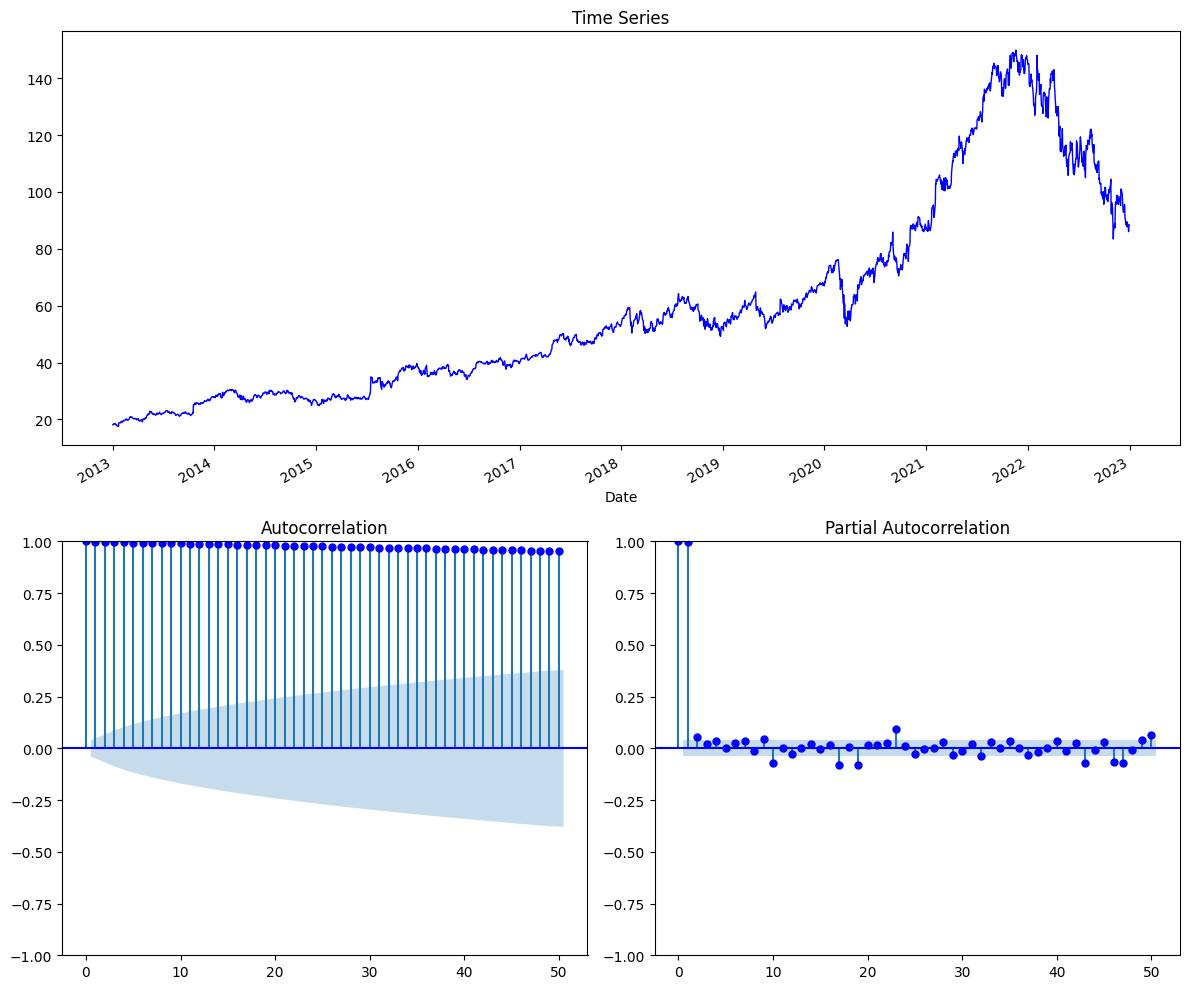

In [ ]:
plotds(Google["Close"], nlag = 50)

We already can see we are working with non Stationary data. As I mentioned before, the Autocorrelation function can detect patterns and observe if the data have seasonality. In this case, the visualisation does not provide any evidence of seasonality. There is no sinusoidal wave that is usually displayed in the case of seasonality.

### Mean and variance of splited time period Google

In [ ]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 = Google.iloc[:1258].Close.mean(), Google.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = Google.iloc[:1258].Close.var(), Google.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 33.310387, mean2 = 61.561049
variance1 = 81.592860, variance2 = 1177.912619


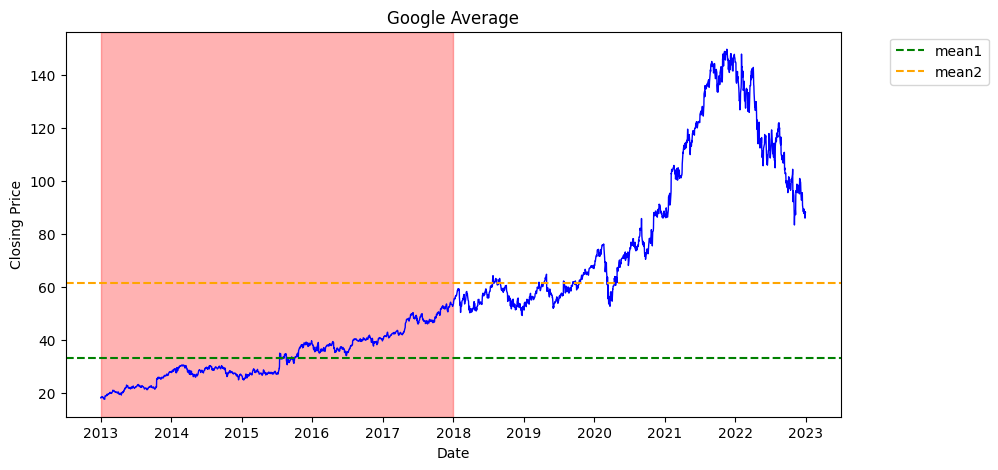

In [ ]:
# Plot time series data
plt.figure(figsize=(10, 5))
plt.plot(Google.Close, color='blue', lw=1.0)

# Highlight first 125 rows in red
plt.axvspan(Google.index[0],Google.index[1258], color='red', alpha=0.3)

# Plot mean values for each part of the time series
plt.axhline(mean1, color='green', linestyle='dashed', label='mean1')
plt.axhline(mean2, color='orange', linestyle='dashed', label='mean2')

# Add legend and axis labels
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Google Average')
plt.show()

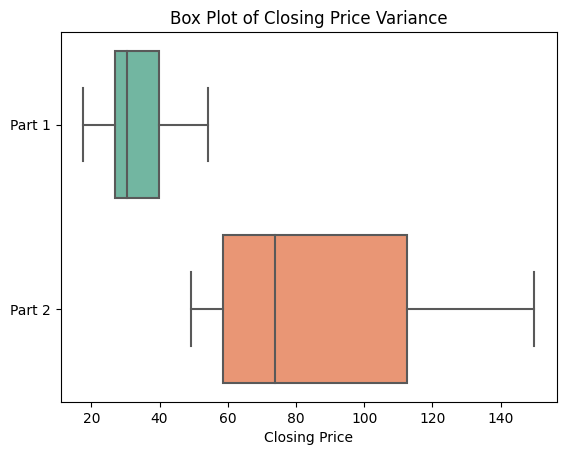

In [ ]:
# Create box plots for each part of the time series
variance = [Google.iloc[:1258].Close, Google.iloc[1258:].Close]

sns.boxplot(data = variance, orient='h', palette='Set2')
plt.yticks([0, 1], ['Part 1', 'Part 2'])
plt.xlabel('Closing Price')
plt.title('Box Plot of Closing Price Variance')
plt.show()

The analysis of the mean illustrates that the difference between the time period is not significant for such as long period of time. The difference in mean values can indicate the rising trend of Google Stocks.

However, the variance of the periods is significantly different. We can say that the variability of the Google price in the second period is higher. It is useful information for predicting the future performance of Google Stock.    

The two statistical representations of two parts help to understand the behaviour of the stock price over time.

**mean1 = 33.310387, mean2 = 61.561049**

**variance1 = 81.592860, variance2 = 1177.912619**

### Dicky Fuller Test
We are creating a model for forecasting purposes in time series analysis. The performance of the model requires a stationary time series for better prediction
In order to perform ARIMA model first we need to define if the data is non-stationary or stationary. There are multiple ways to define stationary and non-stationary data. Testing stationary is a common practise in autoregressive modelling. 

**Why do we need to make the time series stationary?** 

If we work with non-stationary time series it tends to return an error or deterministic trend with the time values. It will bring some difficulties in making predictions and drawing conclusions. On the other hand, if we work with stationary time series the statistical properties do not change over time. It will return an error or deterministic trend. It will make the prediction more accurate and we will be able to draw a conclusion. 

We will apply Augmented Dicky Fuller(ADF) Test to have accurate results. Basicaly ADF is an extension of the dickey-fuller test. It is one of the most common forms of the Unit Root Test.  The test itself performs null and alternative hypotheses. As a result, we will have a p-value. Based on p values we will be able to make an assumption if the data if it stationary or not. 

    Null Hypothesis (HO): Series is non-stationary
    Alternate Hypothesis(HA): Series is stationary
    Conditions to reject null hypothesis 
    p value less than 0.05(p<0.05)

**Augmented Dicky Fuller Test Formula** 

- ɑ is a constant 
- t is the coefficient at time. 
- p is the lag order of the autoregressive process.


test DFT.png

We need to imort libraries

adfuller (Augmented Dicky Fuller) from statsmodel

In [ ]:
series = Google['Close'].values

In [ ]:
from  statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag = 'AIC')

In [ ]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -0.960224
p-value: 0.767494
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


The ADF tests provide the results of the test statistic, p-value, and critical value at 1%, 5%, and 10% confidence intervals

The p-value is 0.767494 which is greater than the significance level of 0.05. 
ADF statistic is higher than any of the critical values. 

It is clear to see that we can not reject the null hypothesis. So, the time series is, in fact, non-stationary. We can conclude that we can apply ARIMA model as it is applied for non Stationary Data. There are techniques such as differencing, detrending, and decomposition to transform data into stationary. 

###  Difference. Transforming into Stationary.
- ARIMA models may be defined as:
- ARIMA(1, 0, 0) is the first-order autoregressive model
- ARIMA(0, 1, 0) is the random walk model
- **ARIMA(1, 1, 0)** is the differenced first-order autoregressive model. This specifies that the model should have an autoregressive (AR) component of 1, a differencing component of  1, and no moving average (MA) component. The (1, 1, 0) order is a common choice for modelling time series data that has a first-order trend. They are the fundamentals for time series model parameters. At this point, we believe it might be the option to include MA in the model as we have a high variance in the data. 

Once the parameters (p, d, q) have been defined, the ARIMA model aims to estimate the coefficients α and θ, which is the result of using previous data points to forecast values.

We will take 1 or 2 first rows from the column and will see what will work best for us. 


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Call ARIMA function to train the model on the 'Close' price
model = ARIMA(Google['Close'], order = (1, 1, 0))

# Train ARIMA Model on the 'Close' price dataset
results_AR = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Store one difference value of the 'Close' column
first_order_diff = Google['Close'].diff(2)#setting the parameter to 2

# Display the first five records
first_order_diff.head()

Date
2013-01-02         NaN
2013-01-03         NaN
2013-01-04    0.368370
2013-01-07    0.277277
2013-01-08   -0.116867
Name: Close, dtype: float64

In [ ]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = Google['Close'].diff(2).dropna()

# Display the first five records
first_order_diff.head()

Date
2013-01-04    0.368370
2013-01-07    0.277277
2013-01-08   -0.116867
2013-01-09    0.084336
2013-01-10    0.204704
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of Google during 2013 -2023')

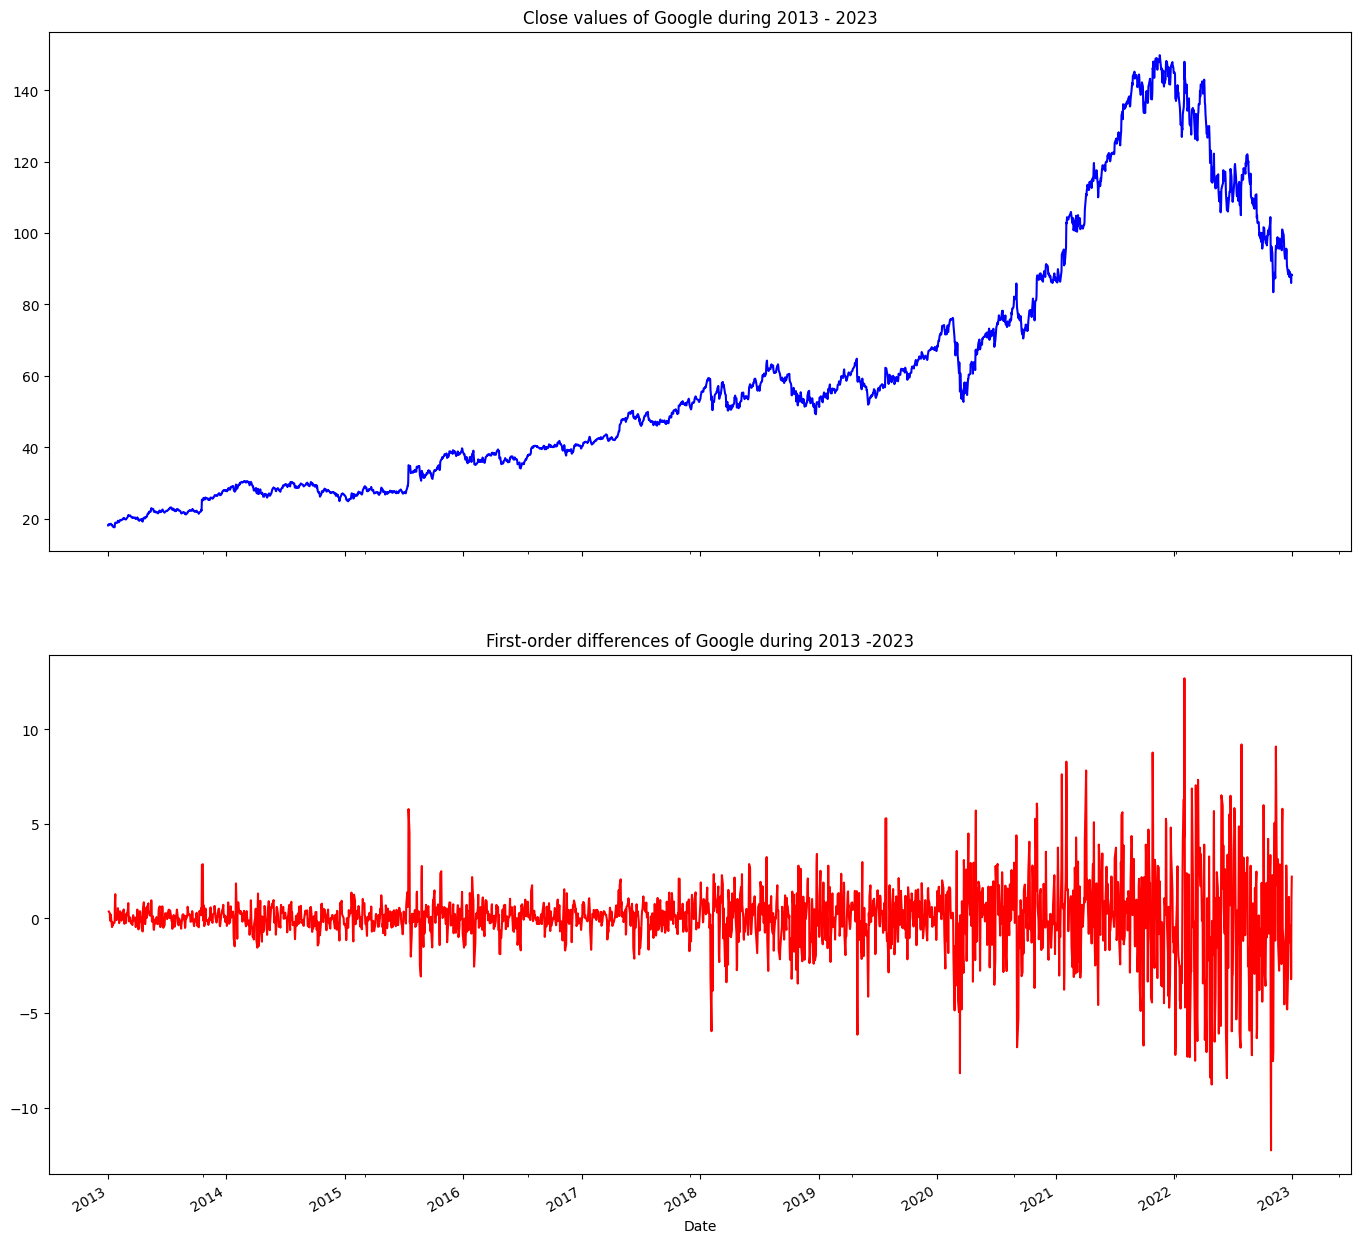

In [ ]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(16.8, 16.8)
Google['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of Google during 2013 - 2023')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of Google during 2013 -2023')

After applying the Model it is claer to see we have stationary data. However we will perform Dicky Fuller Test to display P value.

ADF Statistic: -9.676000
p-value: 0.000000


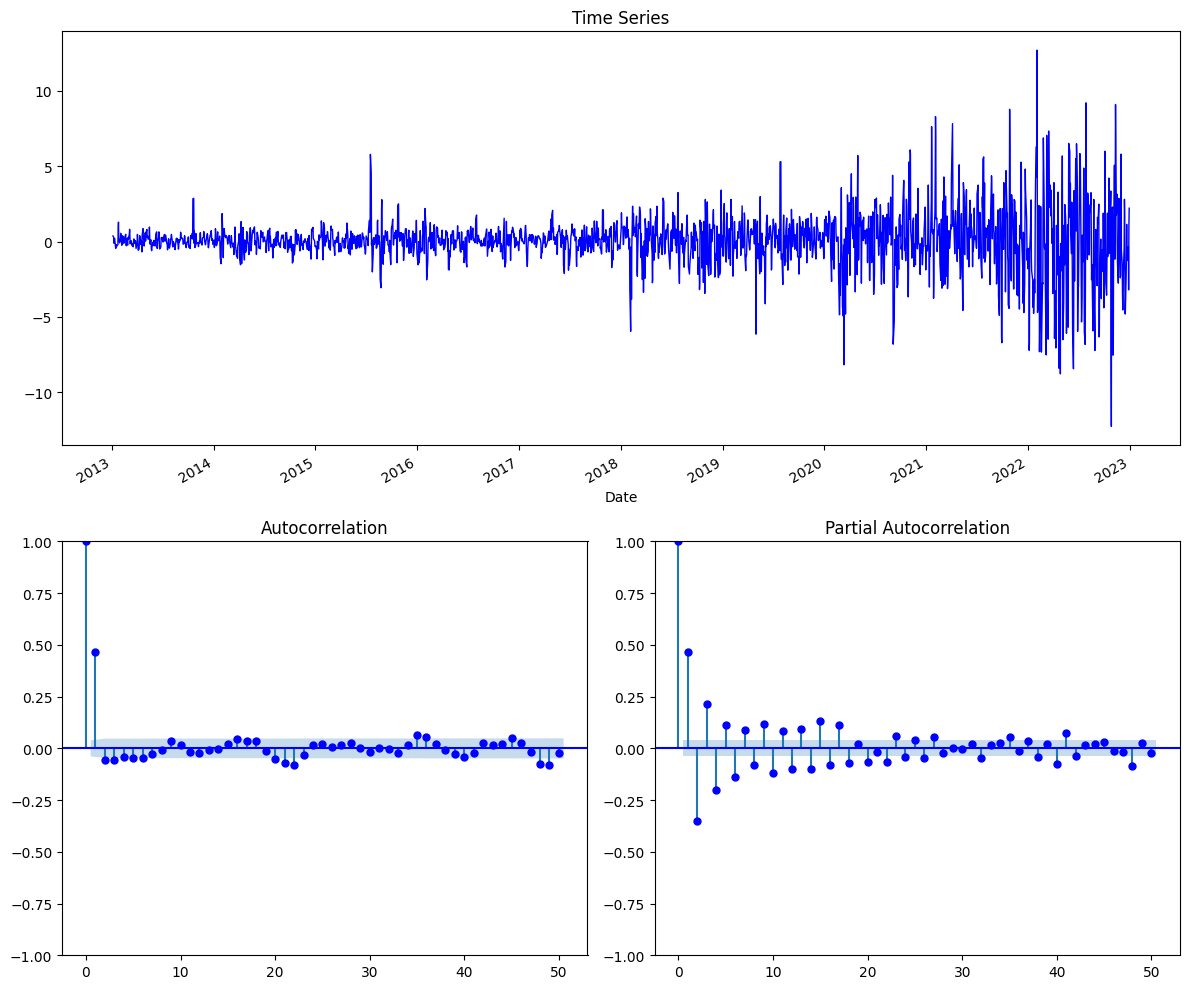

In [ ]:
# plot the data with 50 lags
plotds(first_order_diff, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

We will display trend, ACF and PACF to see if the number of differnces has been chosen correctly. 


After the test application, we have P value = 0. It means we have stationary data. 
We run the code with 1 and 2 differences. The autocorrelation graph shows significant improvement if we use the first 2 rows from the close price in order to predict the result. We have a visible sinusoidal wave of the values.

### Akaike information criterion (AIC).
AIC is the method for evaluating how well a model fits the data. We will use the criteria in order to compare different models and identify the best which fits the data. We will calculate different combinations of ARIMA(p,d,q) models on the Google stock price and will store them in aicValue_list.
The code represented below will identify the best parameters of p, d, and q.

    d is range(1,3) in the first loop indicates that the code will try ARIMA models with d values of 1 and 2
    ari and maj are range(0,3) are loops to indicate that the code will try ARIMA models with p and q values of 0, 1, and 2
In the end, we will be able to see different combinations of ARIMA models. The lowes value will refer to appropriate model parameters.

In [ ]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(Google['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[0, 1, 0, 8386.671442853763], [0, 1, 1, 8379.71325404985], [0, 1, 2, 8381.610449765529], [1, 1, 0, 8379.807834974239], [1, 1, 1, 8376.991154856161], [1, 1, 2, 8378.241789099178], [2, 1, 0, 8381.760877609879], [2, 1, 1, 8378.164834881269], [2, 1, 2, 8378.652307993907], [0, 2, 0, 10273.230209699172], [0, 2, 1, 8392.982263129608], [0, 2, 2, 8385.984727785913], [1, 2, 0, 9454.13798562497], [1, 2, 1, 8386.08341205254], [1, 2, 2, 8379.168496844532], [2, 2, 0, 9186.61339674028], [2, 2, 1, 8388.032492295995], [2, 2, 2, 8389.021835496285]]


Split the DATA

The result of AIC:
The smallest AIC VALUE -  [1, 1, 1, 8376.991154826701]. The best parameters for the model will be ARIMA(1,1,1). 

The model AR term of order 1, an I term of order 1 (the data will be differenced once), and an MA term of order 1.

### Traning the model
We will train the model with the parameters ARIMA(1,1,1) and display the summary of it.

In [ ]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(Google['Close'].tolist(), order = (1, 1, 1))

# d = 2, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# disp : int, optional
# If True, convergence information is printed.  For the default l_bfgs_b solver, disp controls the frequency of the output 
# during the iterations. disp < 0 means no output in this case.

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2518
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4185.496
Date:                Sun, 30 Apr 2023   AIC                           8376.991
Time:                        15:47:38   BIC                           8394.484
Sample:                             0   HQIC                          8383.340
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7148      0.069     10.386      0.000       0.580       0.850
ma.L1         -0.7664      0.064    -12.016      0.000      -0.891      -0.641
sigma2         1.6289      0.019     83.744      0.000       1.591       1.667
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              8829.75
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):              20.36   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- AIC (Akaikes Information Criterion) measures how well the model is fitting. It takes into account the model's ability to fit the data and its complexity. AIC penalises models for having more parameters, so models with lower AIC values are preferred over models with higher AIC values.
- BIC (Definition of the Bayesian Information Criterion). It is similar to AIC but places a stronger penalty on models with more parameters. BIC tends to select simpler models than AIC. The model with the lowest BIC is considered the best
- HQIC(Hannan-Quinn Information Criterion) is similar to AIC and BIC, but it places a stronger penalty on models with more parameters than BIC and less than AIC.  It is an alternative to AIC and BIC. It is given as. where. is the log-likelihood, k is the number of parameters, and n is the number of observations.

AIC	8376.991

BIC	8394.484

HQIC	8383.340

**Fiting the ARIMA** 
    
We will declare the variable where we store values of ARIMA. The model using the fittedvalues method of the ARIMAResults object arima_obj_fit. And store them in the data frame "Google"

We will declare diffval by adding the difference between the observed values and the predicted values to the fitted values

In [ ]:
# Declare the array 'pred' and append the values 
pred = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
Google['Google_ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
Google['Google_diffval'] = diffval

# Display first five records
Google.head()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2013-01-02 2013-01-02  18.003504  18.193193  17.931683  18.099348  18.099348   
2013-01-03 2013-01-03  18.141392  18.316566  18.036036  18.109859  18.109859   
2013-01-04 2013-01-04  18.251753  18.555305  18.210211  18.467718  18.467718   
2013-01-07 2013-01-07  18.404655  18.503002  18.282784  18.387136  18.387136   
2013-01-08 2013-01-08  18.406906  18.425926  18.128880  18.350851  18.350851   

               Volume Company                                 Origin  \
Date                                                                   
2013-01-02  101550348  Google  Menlo Park, California, United States   
2013-01-03   92635272  Google  Menlo Park, California, United States   
2013-01-04  110429460  Google  Menlo Park, California, United States   
2013-01-07   66161772  Google  Menlo Park, California, United States   
2013-01-08   66976956  Google  Menlo Park, California, United States   

                                         Headquarter  Year  Month  \
Date                                                                
2013-01-02  Mountain View, California, United States  2013      1   
2013-01-03  Mountain View, California, United States  2013      1   
2013-01-04  Mountain View, California, United States  2013      1   
2013-01-07  Mountain View, California, United States  2013      1   
2013-01-08  Mountain View, California, United States  2013      1   

            Google_ARIMA  Google_diffval  
Date                                      
2013-01-02      0.000000       18.099348  
2013-01-03     18.099347       18.109859  
2013-01-04     18.109359       18.467718  
2013-01-07     18.449738       18.387136  
2013-01-08     18.377426       18.350851

If we have a look on column Close, ARIMA and diffval we will be able to see how close  the values are. 

### Visualisation of the model 

We have a data frame with 2 new columns "ARIMA" an "diffval". We will visualise actual and predicted values and color them in blue: actual values and green:predicted values. We will be able to see how close the predicted value to the actual. 

In [ ]:
print(Google['Google_diffval'], Google['Google_ARIMA'])

Date
2013-01-02    18.099348
2013-01-03    18.109859
2013-01-04    18.467718
2013-01-07    18.387136
2013-01-08    18.350851
                ...    
2022-12-23    89.230003
2022-12-27    87.389999
2022-12-28    86.019997
2022-12-29    88.449997
2022-12-30    88.230003
Name: Google_diffval, Length: 2518, dtype: float64 Date
2013-01-02     0.000000
2013-01-03    18.099347
2013-01-04    18.109359
2013-01-07    18.449738
2013-01-08    18.377426
                ...    
2022-12-23    87.927292
2022-12-27    89.282349
2022-12-28    87.525070
2022-12-29    86.194210
2022-12-30    88.458108
Name: Google_ARIMA, Length: 2518, dtype: float64


In [ ]:
Google['Google_diffval'].iloc[2:]

Date
2013-01-04    18.467718
2013-01-07    18.387136
2013-01-08    18.350851
2013-01-09    18.471472
2013-01-10    18.555555
                ...    
2022-12-23    89.230003
2022-12-27    87.389999
2022-12-28    86.019997
2022-12-29    88.449997
2022-12-30    88.230003
Name: Google_diffval, Length: 2516, dtype: float64

Text(0, 0.5, 'Closing')

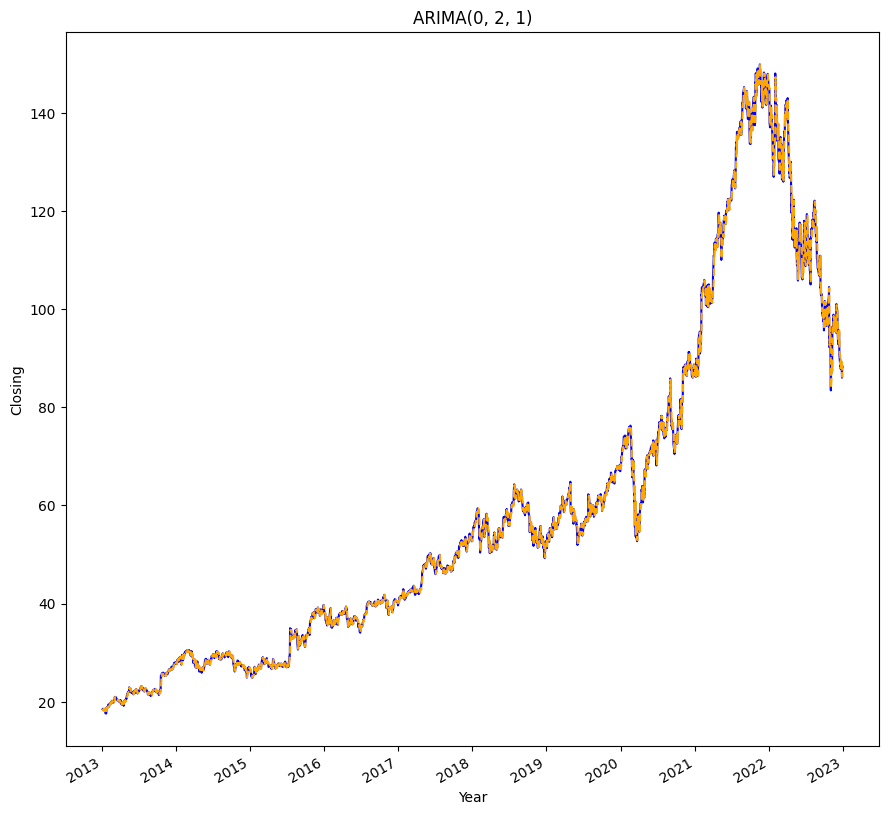

In [ ]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(10.5, 10.5)

# Ignore first two rows because of difference factor d = 2
#add the leble 
Google['Google_diffval'].iloc[2:].plot(color = 'blue', linestyle = '-', ax = axarr)
Google['Google_ARIMA'].iloc[2:].plot(color = 'orange', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Year')
plt.ylabel('Closing')

The graph above provides the visualisation of actual value by blue color and predicted value by orange color. 
We can se that the preedicted values is very close to the actual. Which prove that the model has good performance. 

## Prediction Interval: 
The get_forecast() function allows the prediction interval to be specified.

The alpha argument on the conf_int() function on the PredictionResult specifies the prediction level.

An alpha of 0.05 means that the ARIMA model will evaluate the upper and lower values around the forecast. It means there is a only a 5% chance that the real value will not be in that range.

 If we have a 95% prediction interval, it means that there is a good chance that the actual observation will fall within that range

we have the option to request for a narrower range, but doing so may also increase the chances of the actual observation falling outside of that range.

We can develop a model that can have more predictive power and makes more accurate predictions.


Ww can apply few different commonly used prediction intervals of 80%, 90%, 95% and 99%

In [ ]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 239.873 between 236.296 and 243.450
90.0% Confidence Interval: 239.873 between 235.282 and 244.464
95.0% Confidence Interval: 239.873 between 234.402 and 245.343
99.0% Confidence Interval: 239.873 between 232.683 and 247.062


A80% Confidence: 1.635

90% Confidence: 2.099

95% Confidence: 2.501

99% Confidence: 3.287

The interval that contains the nin vale is the most appropriate. However, it is better to take the average value of the interval for the prediction. We will apply the interval of 90% to the ARIMA model in order to make a prediction. 

## Splitting the data
We will split the data into training and testing sets and apply the interval. We will visualise the data of splitting as well.

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
trainG = Google[:int(0.90 * (len(Google)))]
testG  = Google[int(0.90 * (len(Google))):]
trainG.shape, testG.shape



((2266, 14), (252, 14))

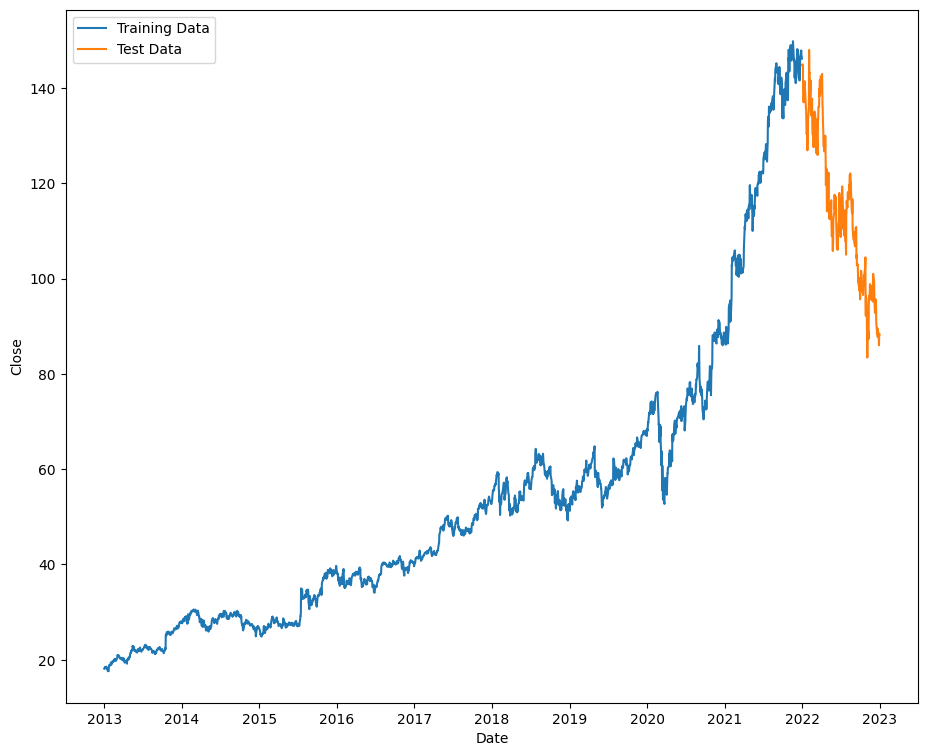

In [ ]:

plt.plot(trainG['Close'], label='Training Data')
plt.plot(testG['Close'], label='Test Data')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

The graph above visualise traning data and testing data

 **Predictions using the ARIMA model**
 

In [ ]:
# Fit ARIMA model
model = ARIMA(trainG['Close'].tolist(), order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3167.097
Date:                Sun, 30 Apr 2023   AIC                           6340.195
Time:                        18:12:37   BIC                           6357.371
Sample:                             0   HQIC                          6346.462
                               - 2266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3639      0.125     -2.921      0.003      -0.608      -0.120
ma.L1          0.2888      0.128      2.259      0.024       0.038       0.539
sigma2         0.9595      0.012     78.050      0.0

In order to see the predicted values we take starting value from the train and the last value from the train and test. We will make a prediction for the next year and visualise it by level. 

The level is commonly used in visualisation in time series analysis. it is used if data is not required any transformation when the data is already stationary



In [ ]:
start = len(trainG) #  starting point for the predictions
end   = len(trainG) + len(testG) - 1 # the ending point for the predictions
# define the ending point for the predictions
predictionsG = model_fit.predict(start=len(trainG), end=len(trainG)+len(testG)-1, dynamic=False, typ = 'level')

print(predictionsG)

[146.24348954 146.22784368 146.23353793 146.23146553 146.23221977
 146.23194527 146.23204517 146.23200881 146.23202205 146.23201723
 146.23201898 146.23201834 146.23201858 146.23201849 146.23201852
 146.23201851 146.23201852 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201

**Mean and Mean Squared Error**


In [ ]:
testG['Close'].mean()

114.87978178174603

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Calculate root mean squared error
rmse = sqrt(mean_squared_error(predictionsG, testG['Close'].values))
print('RMSE: %.3f' % rmse)

RMSE: 35.270


In case RMSE is very close to the value of the test mean it considers a bed model. In this case, the difference between the measurement is significant. We might assume that the model is built well.

In [ ]:
Google.tail()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2022-12-23 2022-12-23  87.110001  89.550003  87.070000  89.230003  89.230003   
2022-12-27 2022-12-27  88.800003  88.940002  87.010002  87.389999  87.389999   
2022-12-28 2022-12-28  86.980003  88.040001  85.940002  86.019997  86.019997   
2022-12-29 2022-12-29  86.620003  88.849998  86.610001  88.449997  88.449997   
2022-12-30 2022-12-30  86.980003  88.300003  86.570000  88.230003  88.230003   

              Volume Company                                 Origin  \
Date                                                                  
2022-12-23  23003000  Google  Menlo Park, California, United States   
2022-12-27  20097300  Google  Menlo Park, California, United States   
2022-12-28  19523200  Google  Menlo Park, California, United States   
2022-12-29  23333500  Google  Menlo Park, California, United States   
2022-12-30  23986300  Google  Menlo Park, California, United States   

                                         Headquarter  Year  Month  \
Date                                                                
2022-12-23  Mountain View, California, United States  2022     12   
2022-12-27  Mountain View, California, United States  2022     12   
2022-12-28  Mountain View, California, United States  2022     12   
2022-12-29  Mountain View, California, United States  2022     12   
2022-12-30  Mountain View, California, United States  2022     12   

            Google_ARIMA  Google_diffval  
Date                                      
2022-12-23     87.927292       89.230003  
2022-12-27     89.282349       87.389999  
2022-12-28     87.525070       86.019997  
2022-12-29     86.194210       88.449997  
2022-12-30     88.458108       88.230003

In [ ]:
# Define the range of future dates
future_dates = pd.date_range(start='2022-12-31', end='2023-12-31')

# Make predictions for the next 12 months
predictionsG = pd.Series(model_fit.predict(start=len(trainG), end=len(trainG)+len(future_dates)-1, dynamic=False, typ='level'), index=future_dates, name='ARIMA Predictions')

print(predictionsG)

2022-12-31    146.243490
2023-01-01    146.227844
2023-01-02    146.233538
2023-01-03    146.231466
2023-01-04    146.232220
                 ...    
2023-12-27    146.232019
2023-12-28    146.232019
2023-12-29    146.232019
2023-12-30    146.232019
2023-12-31    146.232019
Freq: D, Name: ARIMA Predictions, Length: 366, dtype: float64


<Axes: >

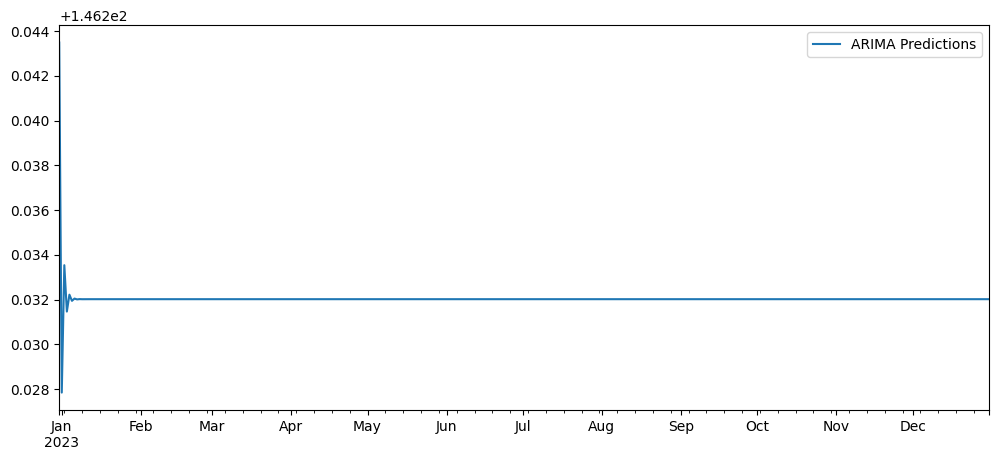

In [ ]:
predictionsG.plot(figsize=(12,5), legend = True)

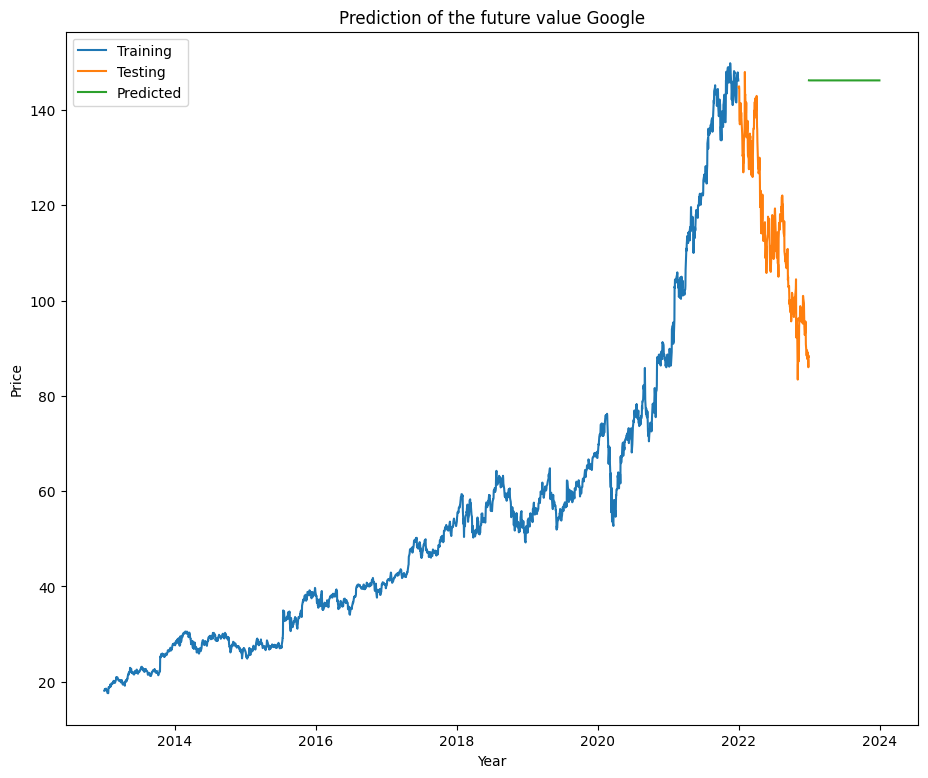

In [ ]:

# Plot the actual and predicted values
plt.plot(trainG['Close'], label='Training')
plt.plot(testG['Close'], label='Testing')
plt.plot(predictionsG, label='Predicted')
plt.legend(loc='upper left')
plt.title("Prediction of the future value Google")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

#Apple

In [ ]:
Apple.head()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2013-01-02 2013-01-02  19.779285  19.821428  19.343929  19.608213  16.837111   
2013-01-03 2013-01-03  19.567142  19.631071  19.321428  19.360714  16.624598   
2013-01-04 2013-01-04  19.177500  19.236786  18.779642  18.821428  16.161530   
2013-01-07 2013-01-07  18.642857  18.903570  18.400000  18.710714  16.066448   
2013-01-08 2013-01-08  18.900356  18.996071  18.616072  18.761070  16.109694   

               Volume Company                                Origin  \
Date                                                                  
2013-01-02  560518000   Apple  Los Altos, California, United States   
2013-01-03  352965200   Apple  Los Altos, California, United States   
2013-01-04  594333600   Apple  Los Altos, California, United States   
2013-01-07  484156400   Apple  Los Altos, California, United States   
2013-01-08  458707200   Apple  Los Altos, California, United States   

                                     Headquarter  Apple_ARIMA  Apple_diffval  
Date                                                                          
2013-01-02  Cupertino, California, United States     0.000000      19.608213  
2013-01-03  Cupertino, California, United States    29.412319      19.360714  
2013-01-04  Cupertino, California, United States    19.113271      18.821428  
2013-01-07  Cupertino, California, United States    18.432142      18.710714  
2013-01-08  Cupertino, California, United States    18.406572      18.761070

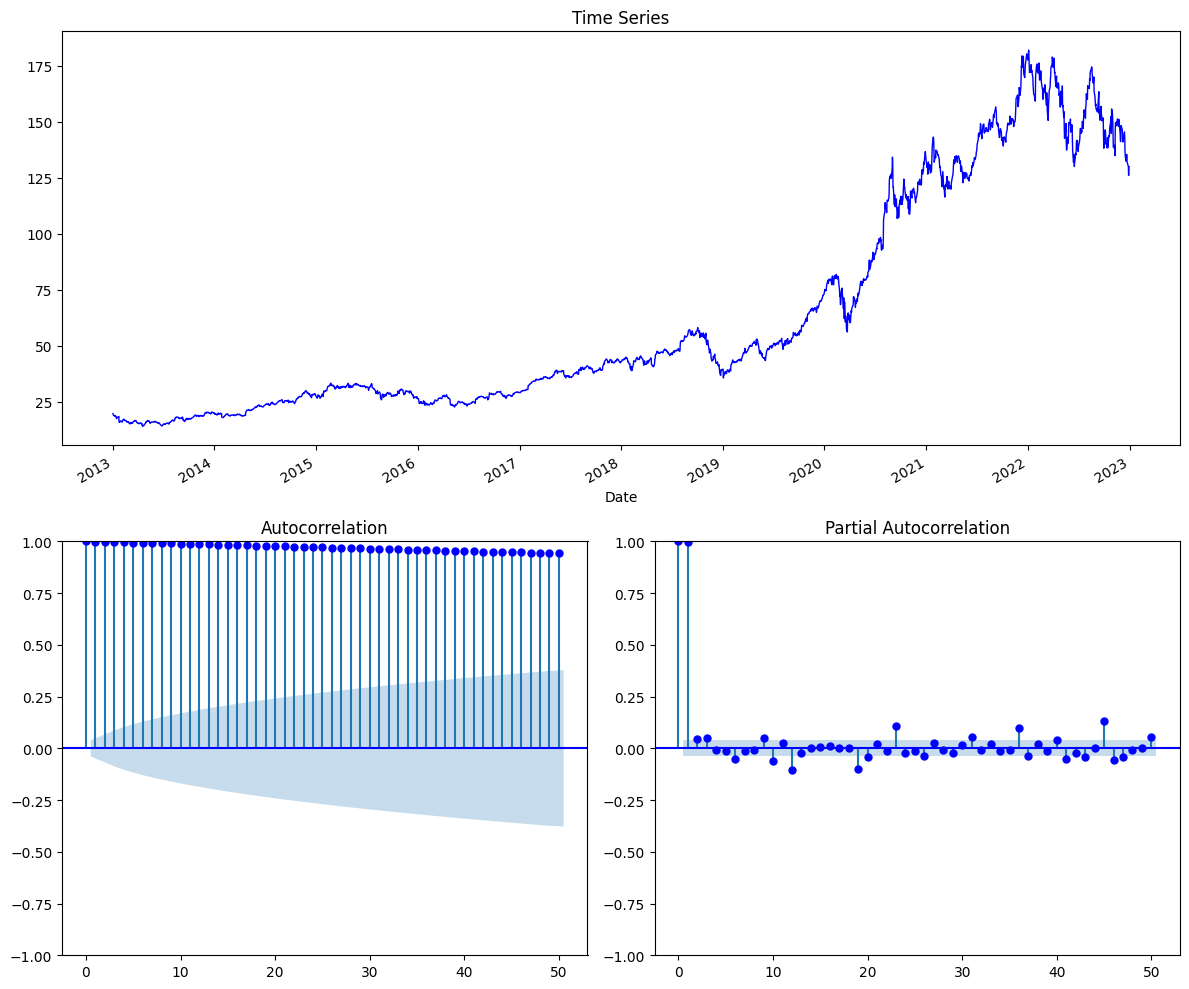

In [ ]:
plotds(Apple["Close"], nlag = 50)

We already can see we are working with non Stationary data. As I mentioned before, the Autocorrelation function can detect patterns and observe if the data have seasonality. In this case, the visualisation does not provide any evidence of seasonality. There is no sinusoidal wave that is usually displayed in the case of seasonality.

### Mean and variance of splited time period Apple

In [ ]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 = Apple.iloc[:1258].Close.mean(), Apple.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = Apple.iloc[:1258].Close.var(), Apple.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 26.727927, mean2 = 64.841990
variance1 = 54.798953, variance2 = 2378.019259


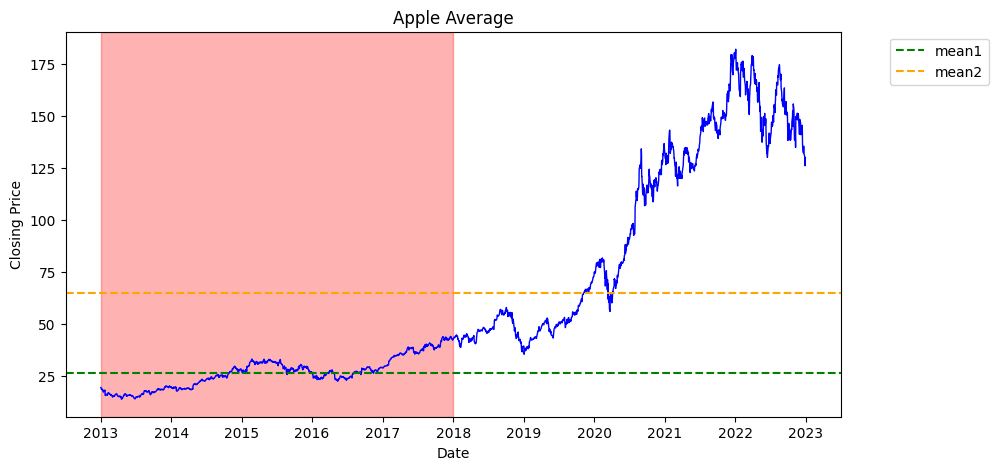

In [ ]:
# Plot time series data
plt.figure(figsize=(10, 5))
plt.plot(Apple.Close, color='blue', lw=1.0)

# Highlight first 125 rows in red
plt.axvspan(Apple.index[0],Apple.index[1258], color='red', alpha=0.3)

# Plot mean values for each part of the time series
plt.axhline(mean1, color='green', linestyle='dashed', label='mean1')
plt.axhline(mean2, color='orange', linestyle='dashed', label='mean2')

# Add legend and axis labels
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Apple Average')
plt.show()

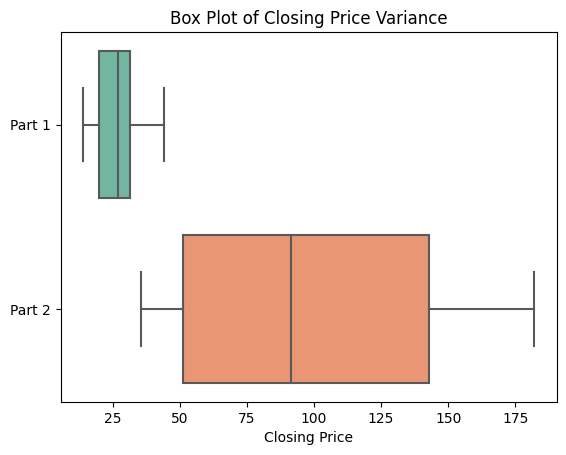

In [ ]:
# Create box plots for each part of the time series
variance = [Apple.iloc[:1258].Close, Apple.iloc[1258:].Close]

sns.boxplot(data = variance, orient='h', palette='Set2')
plt.yticks([0, 1], ['Part 1', 'Part 2'])
plt.xlabel('Closing Price')
plt.title('Box Plot of Closing Price Variance')
plt.show()

The analysis of the mean illustrates that the difference between the time period is not significant for such as long period of time. The difference in mean values can indicate the rising trend of Google Stocks.

However, the variance of the periods is significantly different. We can say that the variability of the Google price in the second period is higher. It is useful information for predicting the future performance of Google Stock.    

The two statistical representations of two parts help to understand the behaviour of the stock price over time.

**mean1 = 26.727927, mean2 = 64.841990**

**variance1 = 54.798953, variance2 = 2378.019259**

### Dicky Fuller Test

In [ ]:
series = Apple['Close'].values

In [ ]:
from  statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag = 'AIC')

In [ ]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -0.506668
p-value: 0.890709
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


p-value: 0.890709

Apple also have non stationary data. We will be performing the same steps as we did for Google. 



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Call ARIMA function to train the model on the 'Close' price
model_a = ARIMA(Apple['Close'], order = (1, 1, 0))

# Train ARIMA Model on the 'Close' price dataset
results_AR = model_a.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Store one difference value of the 'Close' column
first_order_diff_a = Apple['Close'].diff(2)

# Display the first five records
first_order_diff_a.head()

Date
2013-01-02         NaN
2013-01-03         NaN
2013-01-04   -0.786785
2013-01-07   -0.650000
2013-01-08   -0.060358
Name: Close, dtype: float64

In [ ]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff_a = Apple['Close'].diff(2).dropna()

# Display the first five records
first_order_diff_a.head()

Date
2013-01-04   -0.786785
2013-01-07   -0.650000
2013-01-08   -0.060358
2013-01-09   -0.242857
2013-01-10   -0.064283
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of Apple during 2013 -2023')

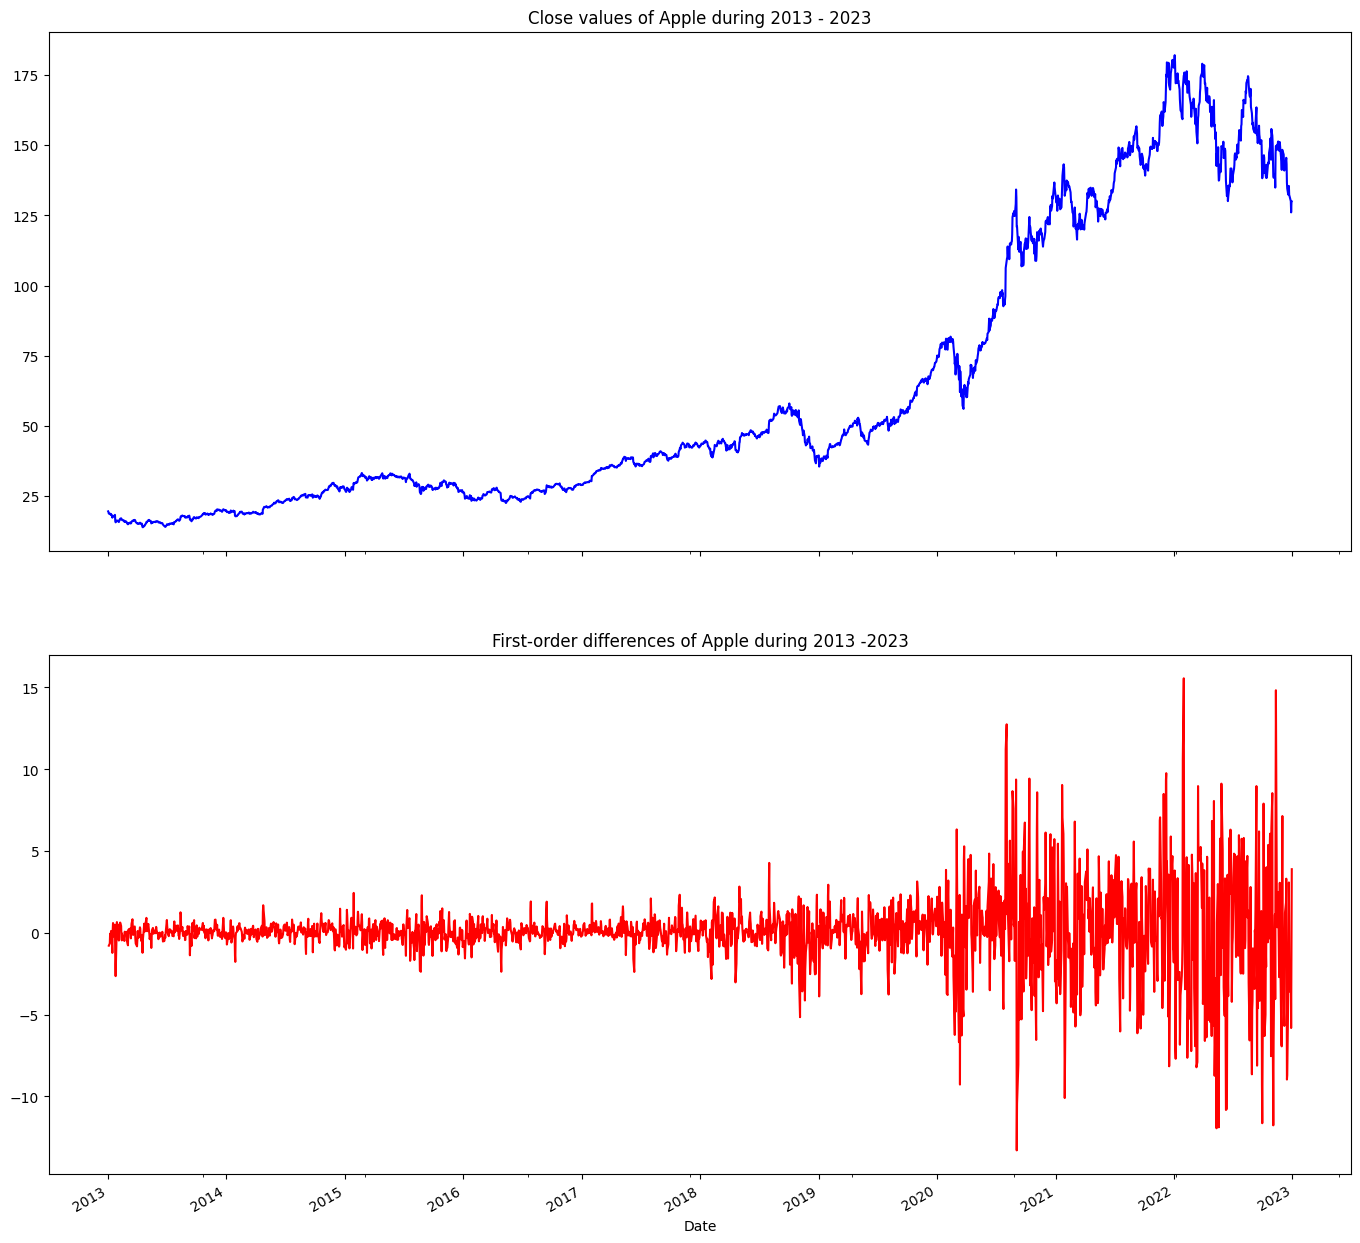

In [ ]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(16.8, 16.8)
Apple['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of Apple during 2013 - 2023')
first_order_diff_a.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of Apple during 2013 -2023')

We will display trend, ACF and PACF to see if the number of differnces has been chosen correctly. 
However we will perform Dicky Fuller Test to display P value.

ADF Statistic: -9.223013
p-value: 0.000000


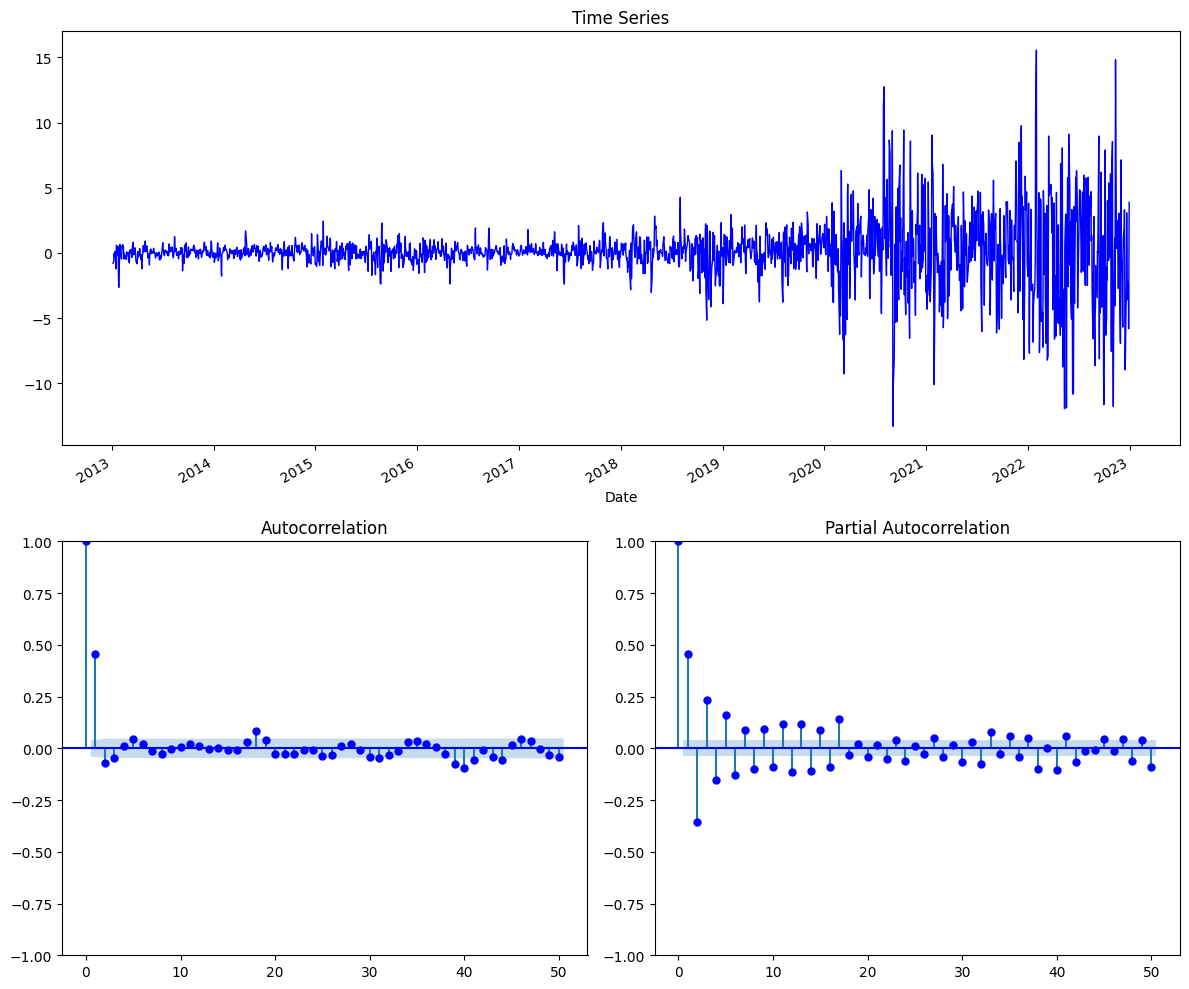

In [ ]:
# plot the data with 50 lags
plotds(first_order_diff_a, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff_a)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

After the test application, we have P value = 0. It means we have stationary data. 
We run the code with 1 and 2 differences. The autocorrelation graph shows significant improvement if we use the first 2 rows from the close price in order to predict the result. We have a visible sinusoidal wave of the values.

### Akaike information criterion (AIC) 

In [ ]:
# A nested loop is written to calculate the AIC values
aicValue_list=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(Apple['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicValue_list.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicValue_list)

[[0, 1, 0, 9503.480457013522], [0, 1, 1, 9497.504515567438], [0, 1, 2, 9497.468004483173], [1, 1, 0, 9497.959659764187], [1, 1, 1, 9496.9749147337], [1, 1, 2, 9498.803491585826], [2, 1, 0, 9497.936369838155], [2, 1, 1, 9498.774279363817], [2, 1, 2, 9495.8931750252], [0, 2, 0, 11378.463897497355], [0, 2, 1, 9508.656618873913], [0, 2, 2, 9502.541202273645], [1, 2, 0, 10608.105992944835], [1, 2, 1, 9503.03136886272], [1, 2, 2, 9507.519864304892], [2, 2, 0, 10306.093290293134], [2, 2, 1, 9502.923466223627], [2, 2, 2, 9494.429559272807]]


The result of AIC:
The smallest AIC VALUE -  [2, 2, 2, 9494.429559272807]. The best parameters for the model will be ARIMA(2,2,2). 

### Traning the model
We will train the model with the parameters ARIMA(2,2,2) and display the summary of it.



In [ ]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(Apple['Close'].tolist(), order = (2, 2, 2))

# d = 2, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# disp : int, optional
# If True, convergence information is printed.  For the default l_bfgs_b solver, disp controls the frequency of the output 
# during the iterations. disp < 0 means no output in this case.

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2518
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -4742.215
Date:                Sun, 30 Apr 2023   AIC                           9494.430
Time:                        15:48:09   BIC                           9523.582
Sample:                             0   HQIC                          9505.010
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9687      0.030    -32.033      0.000      -1.028      -0.909
ar.L2         -0.0788      0.010     -7.717      0.000      -0.099      -0.059
ma.L1         -0.0832      0.037     -2.258      0.024      -0.155      -0.011
ma.L2         -0.9167      0.034    -26.586      0.000      -0.984      -0.849
sigma2         2.5310      0.063     40.052      0.000       2.407       2.655
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9022.28
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              46.10   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AIC	9494.430 

BIC	9523.582

HQIC	9505.010


**Fiting the ARIMA** 
    
We will declare the variable where we store values of ARIMA. The model using the fittedvalues method of the ARIMAResults object arima_obj_fit. And store them in the data frame "Google"

We will declare diffval by adding the difference between the observed values and the predicted values to the fitted values

In [ ]:
# Declare the array 'prediction' and append the values 
prediction = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
Apple['Apple_ARIMA'] = prediction

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
Apple['Apple_diffval'] = diffval

# Display first five records
Apple.head()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2013-01-02 2013-01-02  19.779285  19.821428  19.343929  19.608213  16.837111   
2013-01-03 2013-01-03  19.567142  19.631071  19.321428  19.360714  16.624598   
2013-01-04 2013-01-04  19.177500  19.236786  18.779642  18.821428  16.161530   
2013-01-07 2013-01-07  18.642857  18.903570  18.400000  18.710714  16.066448   
2013-01-08 2013-01-08  18.900356  18.996071  18.616072  18.761070  16.109694   

               Volume Company                                Origin  \
Date                                                                  
2013-01-02  560518000   Apple  Los Altos, California, United States   
2013-01-03  352965200   Apple  Los Altos, California, United States   
2013-01-04  594333600   Apple  Los Altos, California, United States   
2013-01-07  484156400   Apple  Los Altos, California, United States   
2013-01-08  458707200   Apple  Los Altos, California, United States   

                                     Headquarter  Apple_ARIMA  Apple_diffval  
Date                                                                          
2013-01-02  Cupertino, California, United States     0.000000      19.608213  
2013-01-03  Cupertino, California, United States    29.412319      19.360714  
2013-01-04  Cupertino, California, United States    19.113271      18.821428  
2013-01-07  Cupertino, California, United States    18.432142      18.710714  
2013-01-08  Cupertino, California, United States    18.406572      18.761070

If we have a look on column Close, ARIMA and diffval we will be able to see how close  the values are. 
##Visualisation of the model 

We have a data frame with 2 new columns "ARIMA" an "diffval". We will visualise actual and predicted values and color them in blue: actual values and green:predicted values. We will be able to see how close the predicted value to the actual. 

Text(0, 0.5, 'Closing Price Apple')

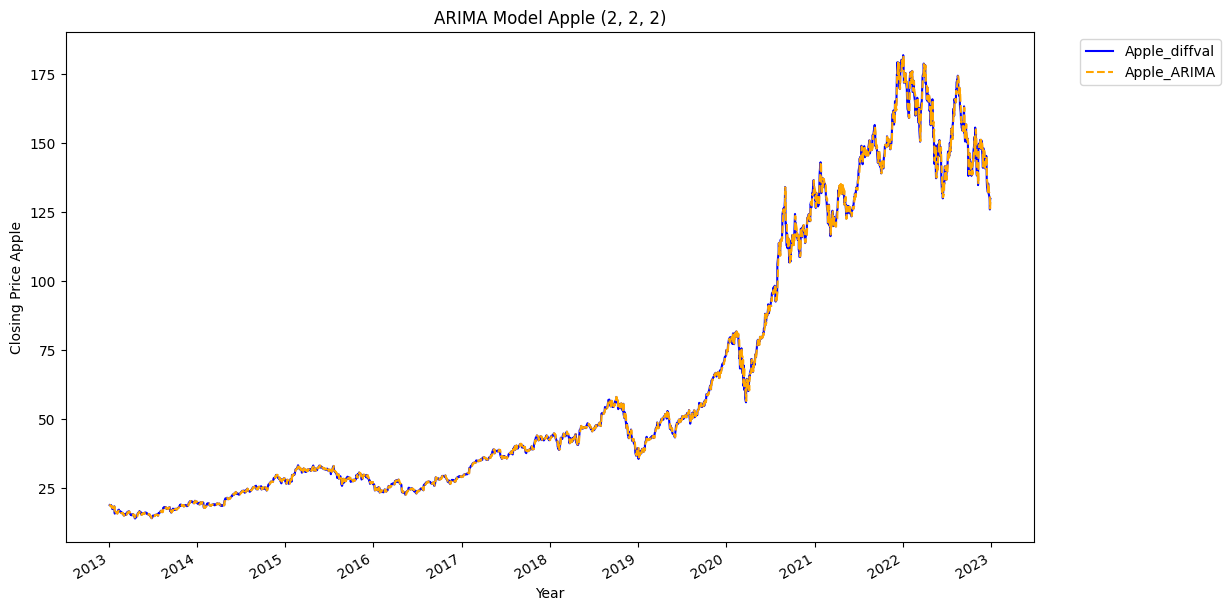

In [ ]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(12.5, 7.5)

# Ignore first two rows because of difference factor d = 2
#add the leble 
Apple['Apple_diffval'].iloc[2:].plot(color = 'blue', linestyle = '-', ax = axarr)
Apple['Apple_ARIMA'].iloc[2:].plot(color = 'orange', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA Model Apple (2, 2, 2)')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
plt.xlabel('Year')
plt.ylabel('Closing Price Apple')

The graph above provides the visualisation of actual value by blue color and predicted value by orange color. 
We can se that the preedicted values is very close to the actual. Which prove that the model has good performance. 

## Prediction Interval 

In [ ]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 129.785 between 127.746 and 131.824
90.0% Confidence Interval: 129.785 between 127.168 and 132.402
95.0% Confidence Interval: 129.785 between 126.666 and 132.904
99.0% Confidence Interval: 129.785 between 125.686 and 133.884


https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/
An alpha of 0.05 means that the ARIMA model will evaluate the upper and lower values around the forecast.  we will have only a 5% chance that the real value won't be in that range. 

The 95% prediction interval indicates a strong chance that the actual observation will fall within the specified range. 

Extending the example above, we can report our forecast with a few commonly used prediction intervals of 80%, 90%, 95% and 99%.

We calculated intervals: 

80% 2.039

90% 2.617

95% 3.119

99% 4.099

## Spliting the data
We will spli the data into traning and testing set and apply the interval. We will visualise the data of spliting as well.




In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
trainA = Apple[:int(0.90 * (len(Apple)))]
testA  = Apple[int(0.90 * (len(Apple))):]
trainA.shape, testA.shape


((2266, 12), (252, 12))

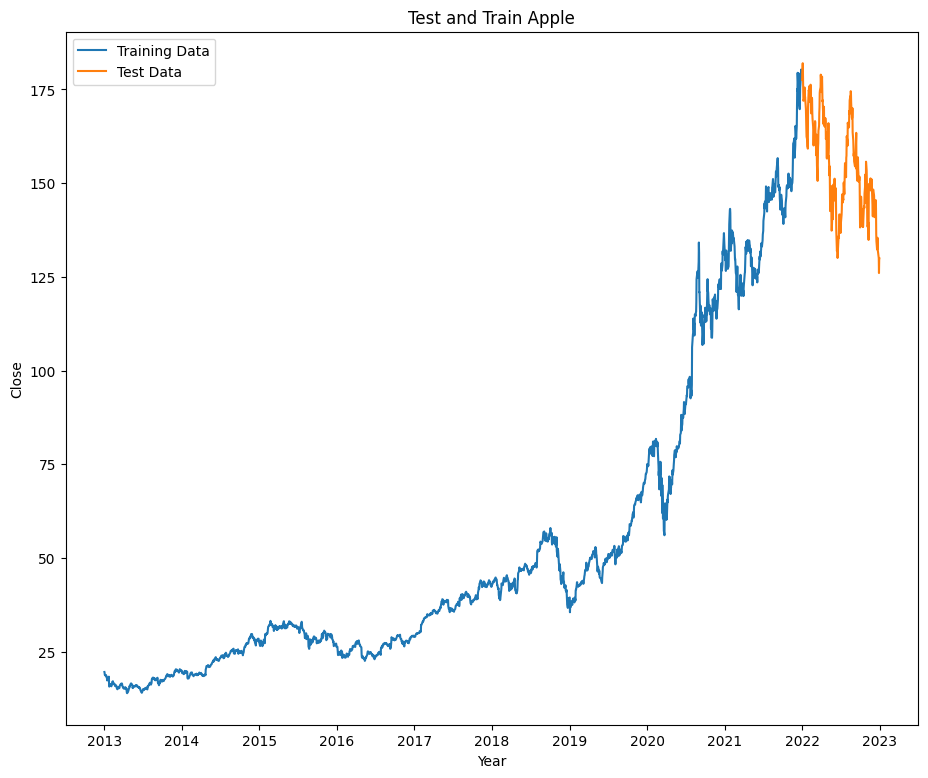

In [ ]:

plt.plot(trainA['Close'], label='Training Data')
plt.plot(testA['Close'], label='Test Data')
plt.xlabel('Year')
plt.ylabel('Close')
plt.title("Test and Train Apple")
plt.legend()
plt.show()

 **Predictions using the ARIMA model**

In [ ]:
start = len(trainA) #  starting point for the predictions
end   = len(trainA) + len(testA) - 1 # the ending point for the predictions
# define the ending point for the predictions
predictionsA = model_fit.predict(start=len(trainA), end=len(trainA)+len(testA)-1, dynamic=False, typ = 'levels')

print(predictionsA)

[146.24348954 146.22784368 146.23353793 146.23146553 146.23221977
 146.23194527 146.23204517 146.23200881 146.23202205 146.23201723
 146.23201898 146.23201834 146.23201858 146.23201849 146.23201852
 146.23201851 146.23201852 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201851 146.23201851 146.23201851 146.23201851 146.23201851
 146.23201

In [ ]:
testA['Close'].mean()

154.92527774603175

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Calculate root mean squared error
rmse = sqrt(mean_squared_error(predictionsA, testA['Close'].values))
print('RMSE: %.3f' % rmse)

RMSE: 26.774


In case RMSE is very close to the value of the test mean it considers a bed model. In this case, the difference between the measurement is significant. We might assume that the model is built well.

In [ ]:
# Fit ARIMA model
model = ARIMA(trainA['Close'].tolist(), order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3696.646
Date:                Sun, 30 Apr 2023   AIC                           7399.292
Time:                        18:14:38   BIC                           7416.468
Sample:                             0   HQIC                          7405.559
                               - 2266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3750      0.098     -3.833      0.000      -0.567      -0.183
ma.L1          0.2911      0.101      2.879      0.004       0.093       0.489
sigma2         1.5315      0.017     90.925      0.0

In [ ]:
Apple.tail()

Date        Open        High         Low       Close  \
Date                                                                    
2022-12-23 2022-12-23  130.919998  132.419998  129.639999  131.860001   
2022-12-27 2022-12-27  131.380005  131.410004  128.720001  130.029999   
2022-12-28 2022-12-28  129.669998  131.029999  125.870003  126.040001   
2022-12-29 2022-12-29  127.989998  130.479996  127.730003  129.610001   
2022-12-30 2022-12-30  128.410004  129.949997  127.430000  129.929993   

             Adj Close    Volume Company  \
Date                                       
2022-12-23  131.658981  63814900   Apple   
2022-12-27  129.831772  69007800   Apple   
2022-12-28  125.847855  85438400   Apple   
2022-12-29  129.412415  75703700   Apple   
2022-12-30  129.731918  77034200   Apple   

                                          Origin  \
Date                                               
2022-12-23  Los Altos, California, United States   
2022-12-27  Los Altos, California, United States   
2022-12-28  Los Altos, California, United States   
2022-12-29  Los Altos, California, United States   
2022-12-30  Los Altos, California, United States   

                                     Headquarter  Apple_ARIMA  Apple_diffval  
Date                                                                          
2022-12-23  Cupertino, California, United States   132.537639     131.860001  
2022-12-27  Cupertino, California, United States   131.942677     130.029999  
2022-12-28  Cupertino, California, United States   130.169229     126.040001  
2022-12-29  Cupertino, California, United States   126.352370     129.610001  
2022-12-30  Cupertino, California, United States   129.540644     129.929993

In [ ]:
# Define the range of future dates
future_dates = pd.date_range(start='2022-12-31', end='2023-12-31')

# Make predictions for the next 12 months
predictionsA = pd.Series(model_fit.predict(start=len(trainA), end=len(trainA)+len(future_dates)-1, dynamic=False, typ='levels'), index=future_dates, name='ARIMA Predictions')

print(predictionsA)

2022-12-31    178.316822
2023-01-01    178.273017
2023-01-02    178.289443
2023-01-03    178.283284
2023-01-04    178.285593
                 ...    
2023-12-27    178.284963
2023-12-28    178.284963
2023-12-29    178.284963
2023-12-30    178.284963
2023-12-31    178.284963
Freq: D, Name: ARIMA Predictions, Length: 366, dtype: float64


<Axes: >

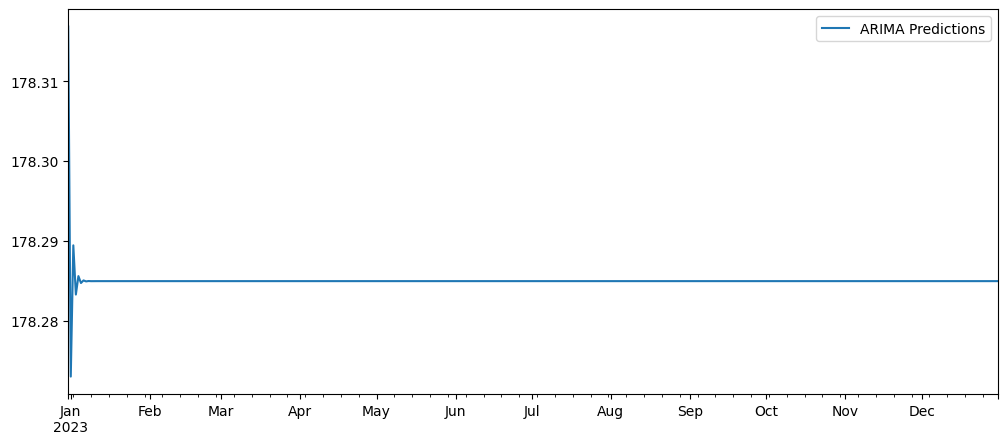

In [ ]:
predictionsA.plot(figsize=(12,5), legend = True)

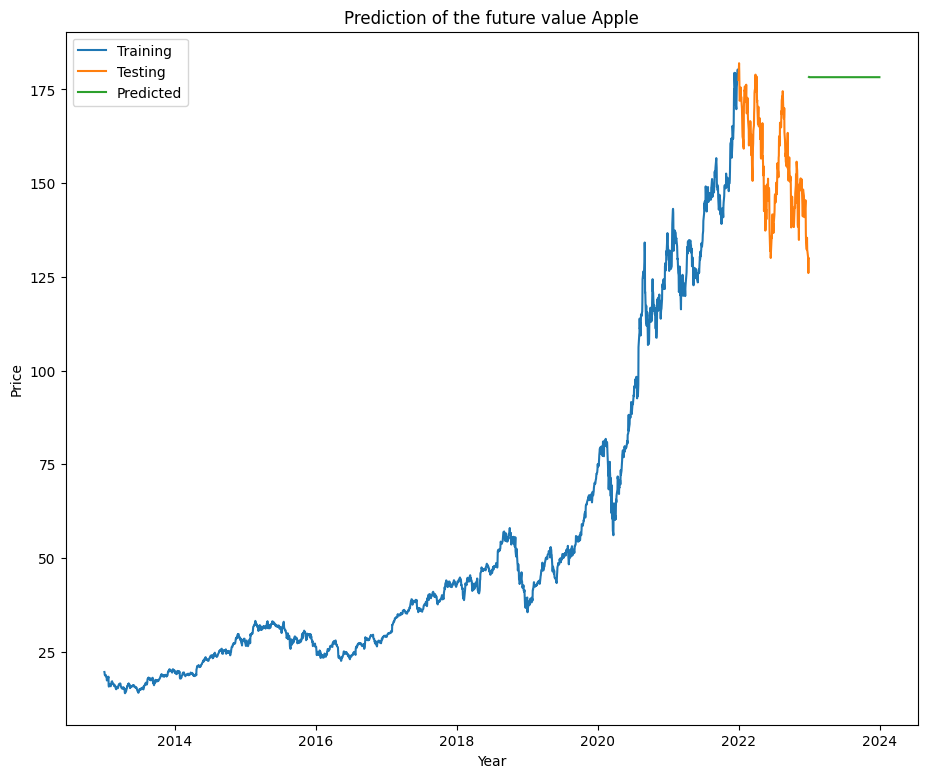

In [ ]:
# Plot the actual and predicted values
plt.plot(trainA['Close'], label='Training')
plt.plot(testA['Close'], label='Testing')
plt.plot(predictionsA, label='Predicted')
plt.legend(loc='upper left')
plt.title("Prediction of the future value Apple")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

# Meta 

In [ ]:
Meta.head()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2013-01-02 2013-01-02  27.440001  28.180000  27.420000  28.000000  28.000000   
2013-01-03 2013-01-03  27.879999  28.469999  27.590000  27.770000  27.770000   
2013-01-04 2013-01-04  28.010000  28.930000  27.830000  28.760000  28.760000   
2013-01-07 2013-01-07  28.690001  29.790001  28.650000  29.420000  29.420000   
2013-01-08 2013-01-08  29.510000  29.600000  28.860001  29.059999  29.059999   

              Volume Company                                   Origin  \
Date                                                                    
2013-01-02  69846400    Meta  Cambridge, Massachusetts, United States   
2013-01-03  63140600    Meta  Cambridge, Massachusetts, United States   
2013-01-04  72715400    Meta  Cambridge, Massachusetts, United States   
2013-01-07  83781800    Meta  Cambridge, Massachusetts, United States   
2013-01-08  45871300    Meta  Cambridge, Massachusetts, United States   

                                      Headquarter  
Date                                               
2013-01-02  Menlo Park, California, United States  
2013-01-03  Menlo Park, California, United States  
2013-01-04  Menlo Park, California, United States  
2013-01-07  Menlo Park, California, United States  
2013-01-08  Menlo Park, California, United States

In [ ]:
Meta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2518 non-null   datetime64[ns]
 1   Open         2518 non-null   float64       
 2   High         2518 non-null   float64       
 3   Low          2518 non-null   float64       
 4   Close        2518 non-null   float64       
 5   Adj Close    2518 non-null   float64       
 6   Volume       2518 non-null   int64         
 7   Company      2518 non-null   object        
 8   Origin       2518 non-null   object        
 9   Headquarter  2518 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 216.4+ KB


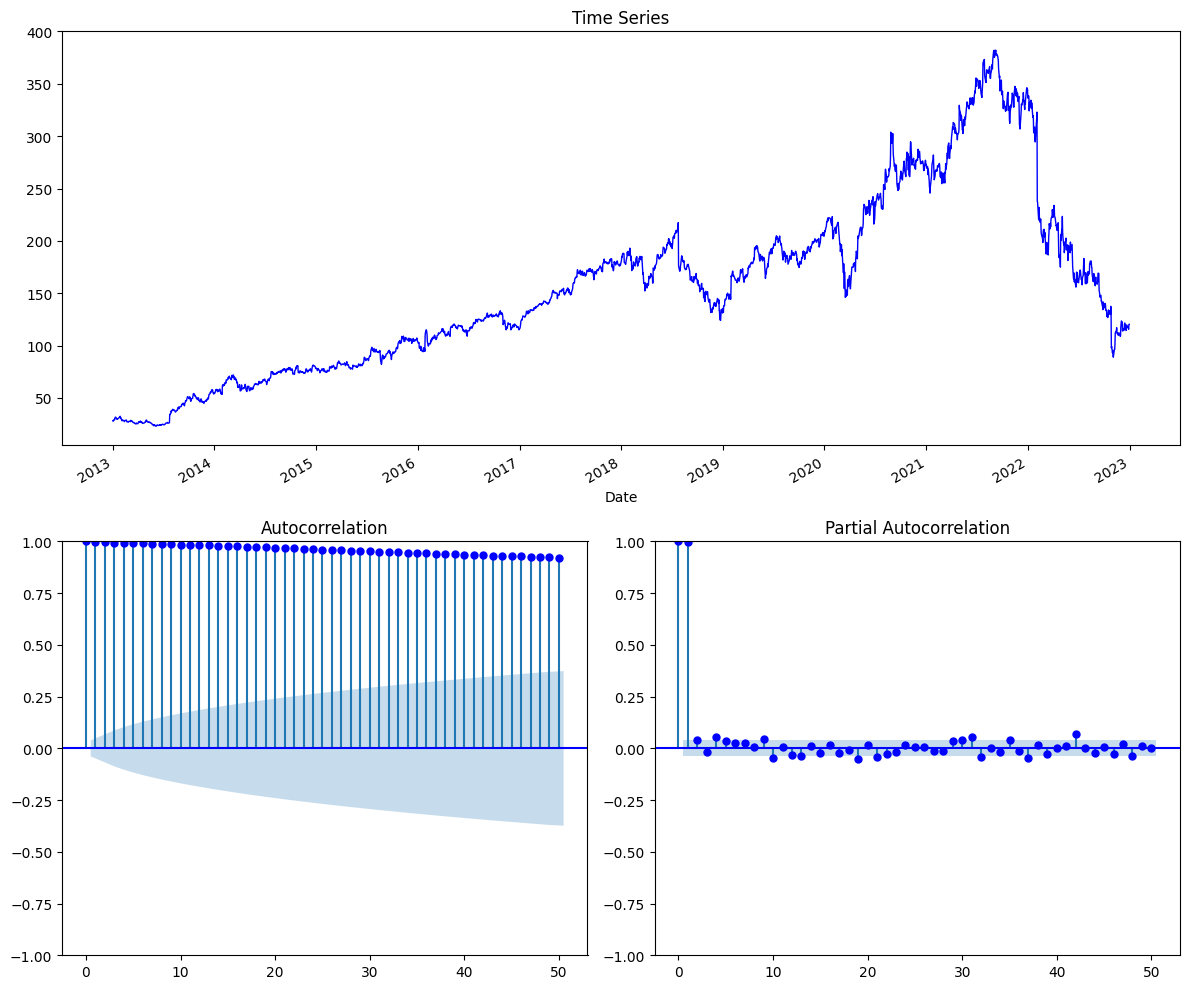

In [ ]:
plotds(Meta["Close"], nlag =50)

We already can see we are working with non Stationary data. As I mentioned before, the Autocorrelation function can detect patterns and observe if the data have seasonality. In this case, the visualisation does not provide any evidence of seasonality. There is no sinusoidal wave that is usually displayed in the case of seasonality.

### Mean and variance of splited time period

In [ ]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 = Meta.iloc[:1258].Close.mean(), Meta.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = Meta.iloc[:1258].Close.var(), Meta.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 93.209316, mean2 = 162.301321
variance1 = 1832.425829, variance2 = 6497.527101


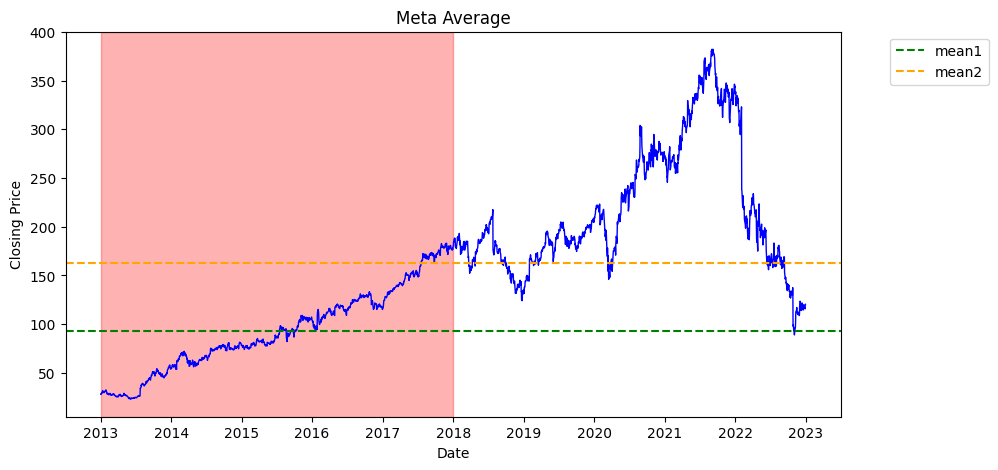

In [ ]:
# Plot time series data
plt.figure(figsize=(10, 5))
plt.plot(Meta.Close, color='blue', lw=1.0)

# Highlight first 125 rows in red
plt.axvspan(Meta.index[0],Meta.index[1258], color='red', alpha=0.3)

# Plot mean values for each part of the time series
plt.axhline(mean1, color='green', linestyle='dashed', label='mean1')
plt.axhline(mean2, color='orange', linestyle='dashed', label='mean2')

# Add legend and axis labels
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Meta Average')
plt.show()

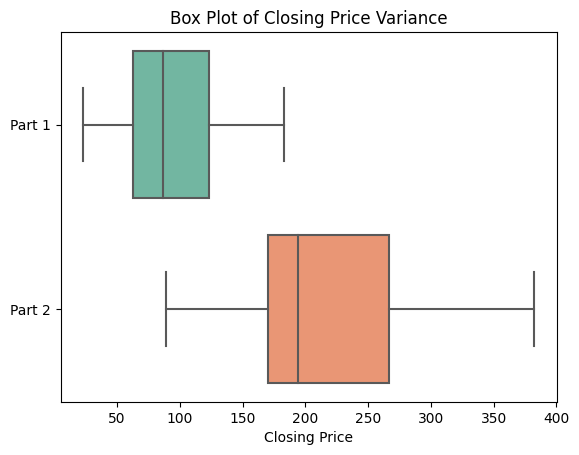

In [ ]:
# Create box plots for each part of the time series
variance = [Meta.iloc[:1258].Close, Meta.iloc[1258:].Close]

sns.boxplot(data = variance, orient='h', palette='Set2')
plt.yticks([0, 1], ['Part 1', 'Part 2'])
plt.xlabel('Closing Price')
plt.title('Box Plot of Closing Price Variance')
plt.show()

The analysis of the mean illustrates that the difference between the time period is not significant for such as long period of time. The difference in mean values can indicate the rising trend of Meat Stocks.

However, the variance of the periods is significantly different. We can say that the variability of the Meta price in the second period is higher. It is useful information for predicting the future performance of Meta Stock.    

The two statistical representations of two parts help to understand the behaviour of the stock price over time.

**mean1 = 93.209316, mean2 = 162.301321**

**variance1 = 1832.425829, variance2 = 6497.527101**

## Dicky Fuller Test

In [ ]:
series = Meta['Close'].values

In [ ]:
from  statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag = 'AIC')

In [ ]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.668696
p-value: 0.447309
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


The ADF tests provide the results of the test statistic, p-value, and critical value at 1%, 5%, and 10% confidence intervals

The p-value is p-value: 0.447309 which is greater than the significance level of 0.05. 
ADF statistic is higher than any of the critical values

## Difference. Transforming into Stationary.

In [ ]:
# Call ARIMA function to train the model on the 'Close' price
model = ARIMA(Meta['Close'], order = (1, 1, 0))

# Train ARIMA Model on the 'Close' price dataset
results_AR = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Store one difference value of the 'Close' column
first_order_diff_m = Meta['Close'].diff(2)

# Display the first five records
first_order_diff_m.head()

Date
2013-01-02         NaN
2013-01-03         NaN
2013-01-04    0.760000
2013-01-07    1.650000
2013-01-08    0.299999
Name: Close, dtype: float64

In [ ]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff_m = Meta['Close'].diff(2).dropna()

# Display the first five records
first_order_diff_m.head()

Date
2013-01-04    0.760000
2013-01-07    1.650000
2013-01-08    0.299999
2013-01-09    1.170000
2013-01-10    2.240000
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of Meta during 2013 -2023')

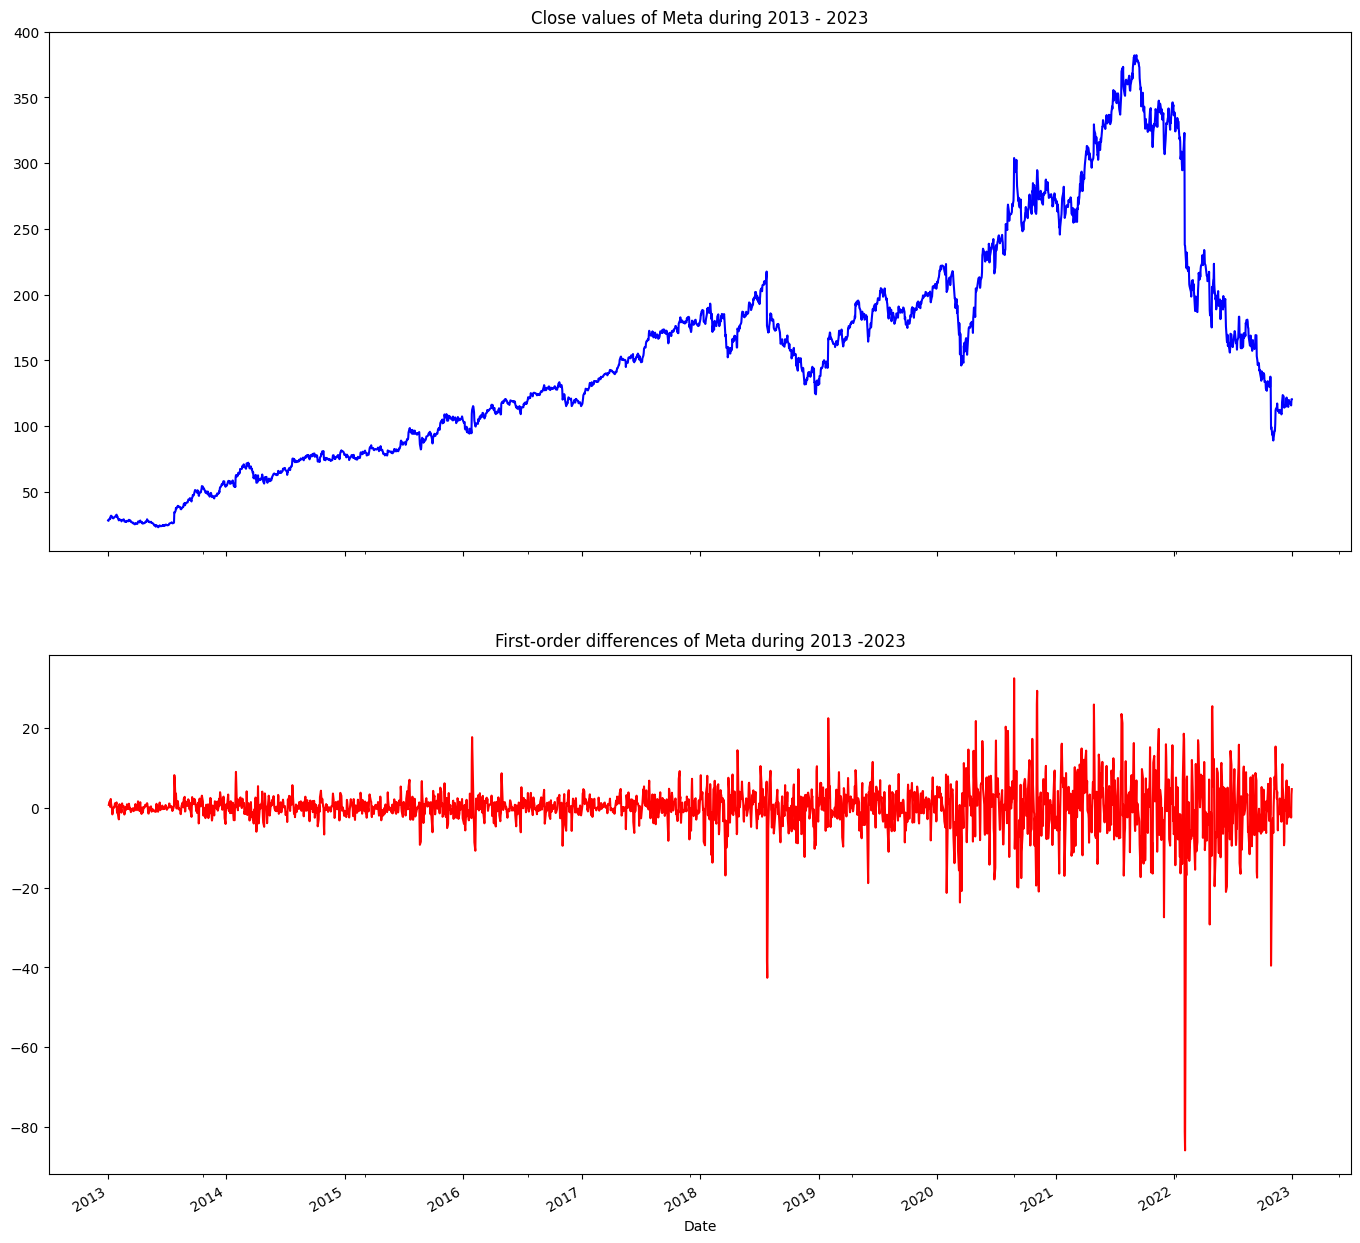

In [ ]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(16.8, 16.8)
Meta['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of Meta during 2013 - 2023')
first_order_diff_m.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of Meta during 2013 -2023')

We will display trend, ACF and PACF to see if the number of differnces has been chosen correctly. 
However we will perform Dicky Fuller Test to display P value.

ADF Statistic: -9.390575
p-value: 0.000000


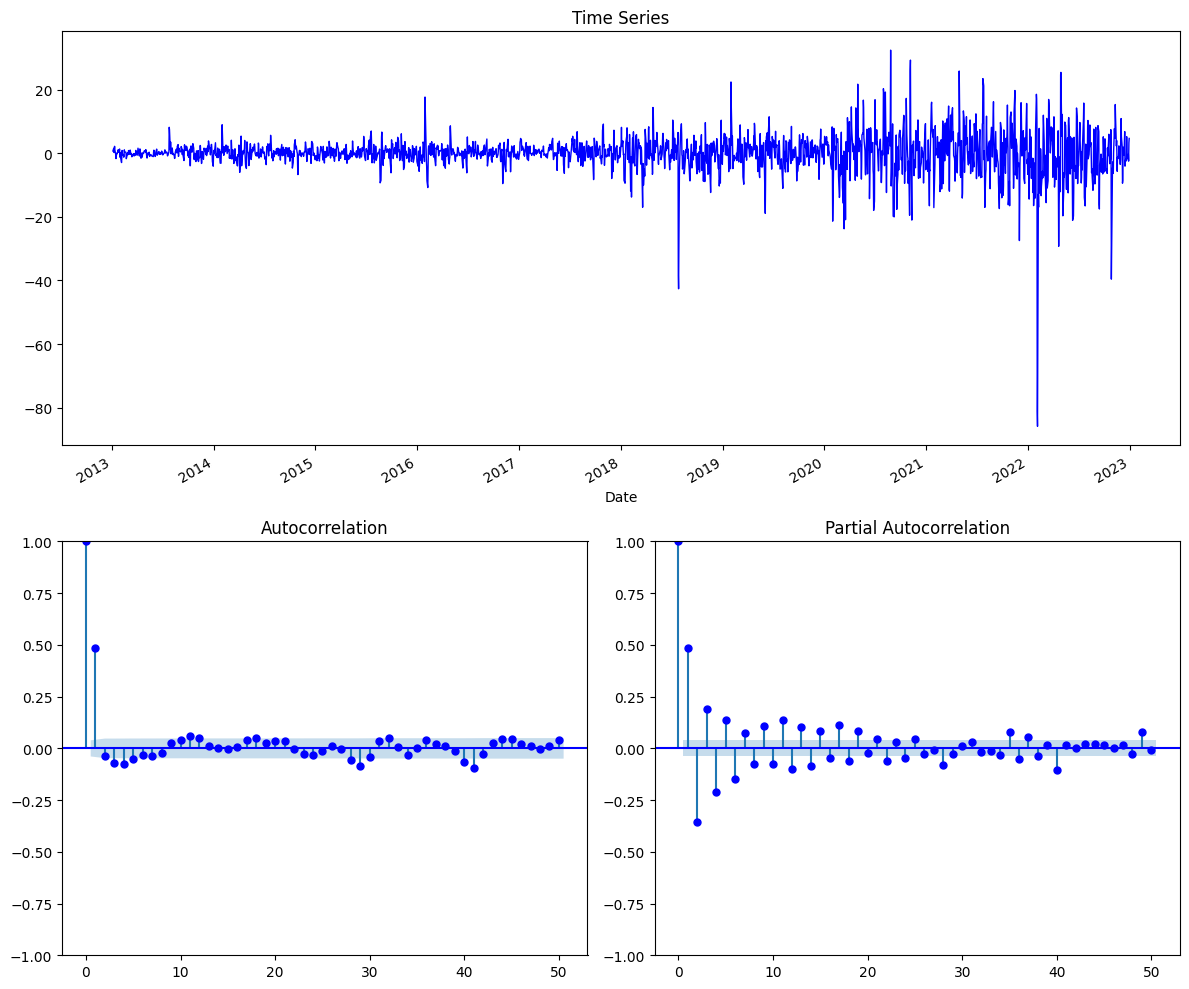

In [ ]:
# plot the data with 50 lags
plotds(first_order_diff_m, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff_m)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

After the test application, we have P value = 0. It means we have stationary data. 
We run the code with 1 and 2 differences. The autocorrelation graph shows significant improvement if we use the first 2 rows from the close price in order to predict the result. We have a visible sinusoidal wave of the values.

##Akaike information criterion (AIC)

In [ ]:
# A nested loop is written to calculate the AIC values
aicValue_list=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(Meta['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicValue_list.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicValue_list)

[[0, 1, 0, 14456.816522484705], [0, 1, 1, 14453.683288101456], [0, 1, 2, 14455.138602295065], [1, 1, 0, 14453.520553989545], [1, 1, 1, 14452.954614201837], [1, 1, 2, 14452.797763477658], [2, 1, 0, 14454.749230482867], [2, 1, 1, 14454.846385683824], [2, 1, 2, 14451.810440471407], [0, 2, 0, 16308.83484891295], [0, 2, 1, 14461.511781557736], [0, 2, 2, 14458.268163050747], [1, 2, 0, 15476.51310063301], [1, 2, 1, 14458.108073495787], [1, 2, 2, 14457.584695268555], [2, 2, 0, 15246.37893788594], [2, 2, 1, 14459.388210168205], [2, 2, 2, 14462.010007294504]]


The result of AIC:
The smallest AIC VALUE -  [2, 1, 2, 14451.810440471407]]. The best parameters for the model will be ARIMA(2,1,2). 

The model AR term of order 1, an I term of order 1 (the data will be differenced once), and an MA term of order 1.

## Traning the model
We will train the model with the parameters ARIMA(2,1,2) and display the summary of it.


In [ ]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(Meta['Close'].tolist(), order = (2, 1, 2))

# d = 2, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# disp : int, optional
# If True, convergence information is printed.  For the default l_bfgs_b solver, disp controls the frequency of the output 
# during the iterations. disp < 0 means no output in this case.

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2518
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7220.905
Date:                Sun, 30 Apr 2023   AIC                          14451.810
Time:                        15:48:35   BIC                          14480.965
Sample:                             0   HQIC                         14462.391
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1495      0.284      0.527      0.598      -0.407       0.706
ar.L2          0.4654      0.169      2.754      0.006       0.134       0.797
ma.L1         -0.2119      0.285     -0.744      0.457      -0.770       0.346
ma.L2         -0.4606      0.182     -2.531      0.011      -0.817      -0.104
sigma2        18.1710      0.115    158.364      0.000      17.946      18.396
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):            521849.14
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):              19.01   Skew:                            -3.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        73.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AIC	14451.810

BIC	14480.965

HQIC	14462.391

**Fiting the ARIMA** 
    
We will declare the variable where we store values of ARIMA. The model using the fittedvalues method of the ARIMAResults object arima_obj_fit. And store them in the data frame "Meta"

We will declare diffval by adding the difference between the observed values and the predicted values to the fitted values
    

In [ ]:
# Declare the array 'prediction' and append the values 
prediction = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
Meta['Meta_ARIMA'] = prediction

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
Meta['Meta_diffval'] = diffval

# Display first five records
Meta.head()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2013-01-02 2013-01-02  27.440001  28.180000  27.420000  28.000000  28.000000   
2013-01-03 2013-01-03  27.879999  28.469999  27.590000  27.770000  27.770000   
2013-01-04 2013-01-04  28.010000  28.930000  27.830000  28.760000  28.760000   
2013-01-07 2013-01-07  28.690001  29.790001  28.650000  29.420000  29.420000   
2013-01-08 2013-01-08  29.510000  29.600000  28.860001  29.059999  29.059999   

              Volume Company                                   Origin  \
Date                                                                    
2013-01-02  69846400    Meta  Cambridge, Massachusetts, United States   
2013-01-03  63140600    Meta  Cambridge, Massachusetts, United States   
2013-01-04  72715400    Meta  Cambridge, Massachusetts, United States   
2013-01-07  83781800    Meta  Cambridge, Massachusetts, United States   
2013-01-08  45871300    Meta  Cambridge, Massachusetts, United States   

                                      Headquarter  Meta_ARIMA  Meta_diffval  
Date                                                                         
2013-01-02  Menlo Park, California, United States    0.000000     28.000000  
2013-01-03  Menlo Park, California, United States   27.999969     27.770000  
2013-01-04  Menlo Park, California, United States   27.784053     28.760000  
2013-01-07  Menlo Park, California, United States   28.700450     29.420000  
2013-01-08  Menlo Park, California, United States   29.378622     29.059999

If we have a look on column Close, ARIMA and diffval we will be able to see how close  the values are. 
## Visualisation of the model 

We have a data frame with 2 new columns "ARIMA" an "diffval". We will visualise actual and predicted values and color them in blue: actual values and green:predicted values. We will be able to see how close the predicted value to the actual. 

Text(0, 0.5, 'Closing Price')

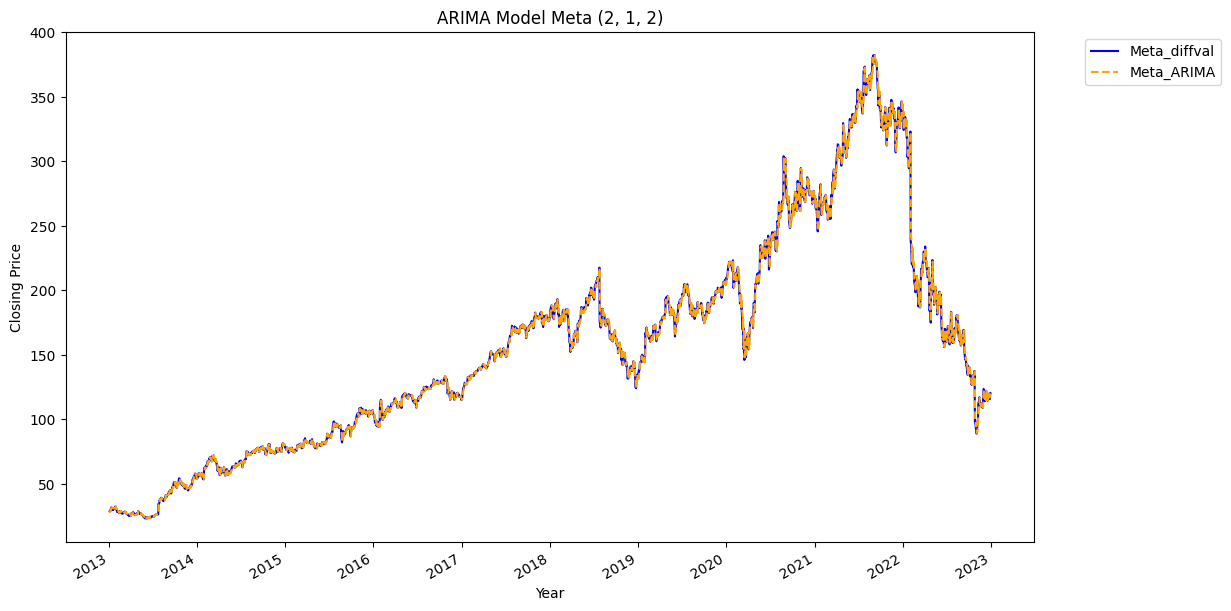

In [ ]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(12.5, 7.5)

# Ignore first two rows because of difference factor d = 2
#add the leble 
Meta['Meta_diffval'].iloc[2:].plot(color = 'blue', linestyle = '-', ax = axarr)
Meta['Meta_ARIMA'].iloc[2:].plot(color = 'orange', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA Model Meta (2, 1, 2)')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
plt.xlabel('Year')
plt.ylabel('Closing Price')

The graph above provides the visualisation of actual value by blue color and predicted value by orange color. 
We can se that the preedicted values is very close to the actual. Which prove that the model has good performance. 


## Prediction Interval 

80% Confidence: 
90% Confidence: 
95% Confidence: 
99% Confidence: 


In [ ]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 120.333 between 114.870 and 125.796
90.0% Confidence Interval: 120.333 between 113.322 and 127.345
95.0% Confidence Interval: 120.333 between 111.978 and 128.688
99.0% Confidence Interval: 120.333 between 109.353 and 131.313


## Spliting the data
We will spli the data into traning and testing set and apply the interval. We will visualise the data of spliting as well.

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
trainM = Meta[:int(0.90 * (len(Meta)))]
testM  = Meta[int(0.90 * (len(Meta))):]
trainM.shape, testM.shape


((2266, 12), (252, 12))

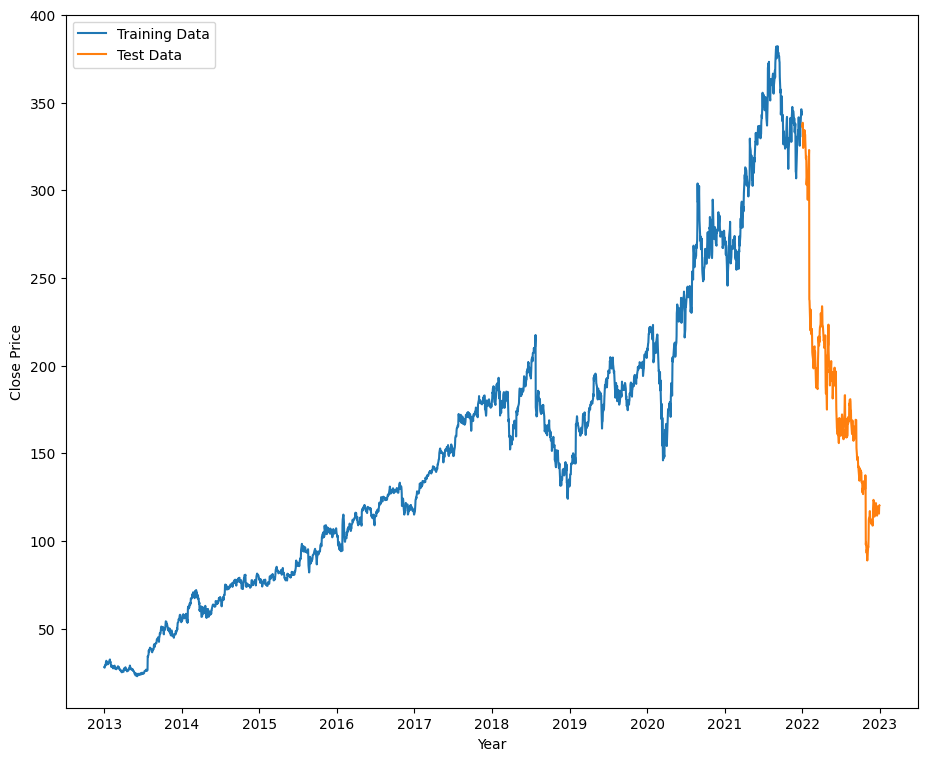

In [ ]:
plt.plot(trainM['Close'], label='Training Data')
plt.plot(testM['Close'], label='Test Data')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
start = len(trainM) #  starting point for the predictions
end   = len(trainM) + len(testM) - 1 # the ending point for the predictions
# define the ending point for the predictions
predictionsM = model_fit.predict(start=len(trainM), end=len(trainM)+len(testM)-1, dynamic=False, typ = 'levels')

print(predictionsM)

[178.3168224  178.27301711 178.28944251 178.28328358 178.28559295
 178.28472702 178.28505171 178.28492997 178.28497562 178.2849585
 178.28496492 178.28496251 178.28496341 178.28496308 178.2849632
 178.28496315 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.28496317 178.28496317 178.28496317 178.28496317 178.28496317
 178.2849631

In [ ]:
testM['Close'].mean()

180.80738148015874

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Calculate root mean squared error
rmse = sqrt(mean_squared_error(predictionsM, testM['Close'].values))
print('RMSE: %.3f' % rmse)

RMSE: 57.337


In case RMSE is very close to the value of the test mean it considers a bed model. In this case, the difference between the measurement is significant. We might assume that the model is built well.

In [ ]:
# Fit ARIMA model
model = ARIMA(trainM['Close'].tolist(), order=(2, 2, 2))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2266
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -6080.206
Date:                Sun, 30 Apr 2023   AIC                          12170.413
Time:                        17:45:28   BIC                          12199.037
Sample:                             0   HQIC                         12180.857
                               - 2266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0460      0.015    -68.607      0.000      -1.076      -1.016
ar.L2         -0.0498      0.013     -3.793      0.000      -0.076      -0.024
ma.L1         -0.0073      0.174     -0.042      0.9

In [ ]:
Meta.tail()

Date        Open        High         Low       Close  \
Date                                                                    
2022-12-23 2022-12-23  116.029999  118.180000  115.540001  118.040001   
2022-12-27 2022-12-27  117.930000  118.599998  116.050003  116.879997   
2022-12-28 2022-12-28  116.250000  118.150002  115.510002  115.620003   
2022-12-29 2022-12-29  116.400002  121.029999  115.769997  120.260002   
2022-12-30 2022-12-30  118.160004  120.419998  117.739998  120.339996   

             Adj Close    Volume Company  \
Date                                       
2022-12-23  118.040001  17796600    Meta   
2022-12-27  116.879997  21392300    Meta   
2022-12-28  115.620003  19612500    Meta   
2022-12-29  120.260002  22366200    Meta   
2022-12-30  120.339996  19583800    Meta   

                                             Origin  \
Date                                                  
2022-12-23  Cambridge, Massachusetts, United States   
2022-12-27  Cambridge, Massachusetts, United States   
2022-12-28  Cambridge, Massachusetts, United States   
2022-12-29  Cambridge, Massachusetts, United States   
2022-12-30  Cambridge, Massachusetts, United States   

                                      Headquarter  Meta_ARIMA  Meta_diffval  
Date                                                                         
2022-12-23  Menlo Park, California, United States  117.187012    118.040001  
2022-12-27  Menlo Park, California, United States  117.966288    116.879997  
2022-12-28  Menlo Park, California, United States  116.971958    115.620003  
2022-12-29  Menlo Park, California, United States  115.678477    120.260002  
2022-12-30  Menlo Park, California, United States  120.019527    120.339996

In [ ]:
# Define the range of future dates
future_dates = pd.date_range(start='2022-12-31', end='2023-12-31')

# Make predictions for the next 12 months
predictionsM = pd.Series(model_fit.predict(start=len(trainM), end=len(trainM)+len(future_dates)-1, dynamic=False, typ='levels'), index=future_dates, name='ARIMA Predictions')

print(predictionsM)

2022-12-31    344.160006
2023-01-01    344.590987
2023-01-02    344.442702
2023-01-03    344.868903
2023-01-04    344.723043
                 ...    
2023-12-27    394.734282
2023-12-28    394.806011
2023-12-29    395.013197
2023-12-30    395.085468
2023-12-31    395.292114
Freq: D, Name: ARIMA Predictions, Length: 366, dtype: float64


<Axes: >

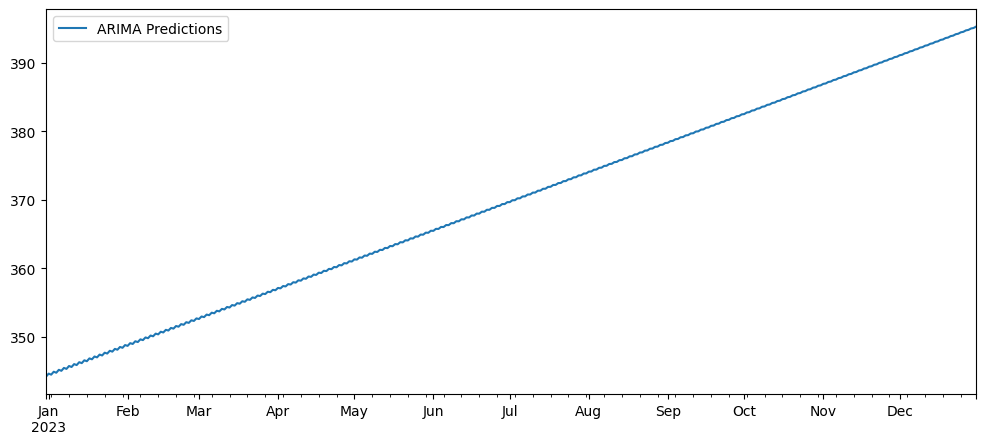

In [ ]:
predictionsM.plot(figsize=(12,5), legend = True)

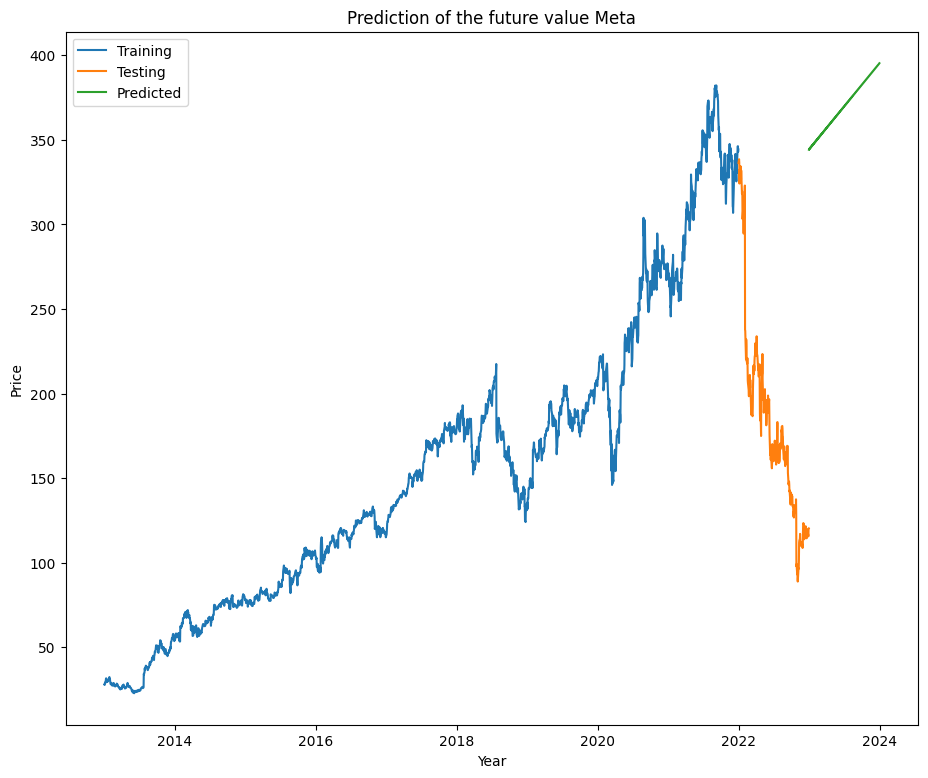

In [ ]:
# Plot the actual and predicted values
plt.plot(trainM['Close'], label='Training')
plt.plot(testM['Close'], label='Testing')
plt.plot(predictionsM, label='Predicted')
plt.legend(loc='upper left')
plt.title("Prediction of the future value Meta")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()



# Microsoft

In [ ]:
Microsoft.head()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2013-01-02 2013-01-02  27.250000  27.730000  27.150000  27.620001  22.717789   
2013-01-03 2013-01-03  27.629999  27.650000  27.160000  27.250000  22.413460   
2013-01-04 2013-01-04  27.270000  27.340000  26.730000  26.740000  21.993973   
2013-01-07 2013-01-07  26.770000  26.879999  26.639999  26.690001  21.952847   
2013-01-08 2013-01-08  26.750000  26.790001  26.459999  26.549999  21.837690   

              Volume    Company                                  Origin  \
Date                                                                      
2013-01-02  52899300  Microsoft  Albuquerque, New Mexico, United States   
2013-01-03  48294400  Microsoft  Albuquerque, New Mexico, United States   
2013-01-04  52521100  Microsoft  Albuquerque, New Mexico, United States   
2013-01-07  37110400  Microsoft  Albuquerque, New Mexico, United States   
2013-01-08  44703100  Microsoft  Albuquerque, New Mexico, United States   

                                   Headquarter  
Date                                            
2013-01-02  Redmond, Washington, United States  
2013-01-03  Redmond, Washington, United States  
2013-01-04  Redmond, Washington, United States  
2013-01-07  Redmond, Washington, United States  
2013-01-08  Redmond, Washington, United States

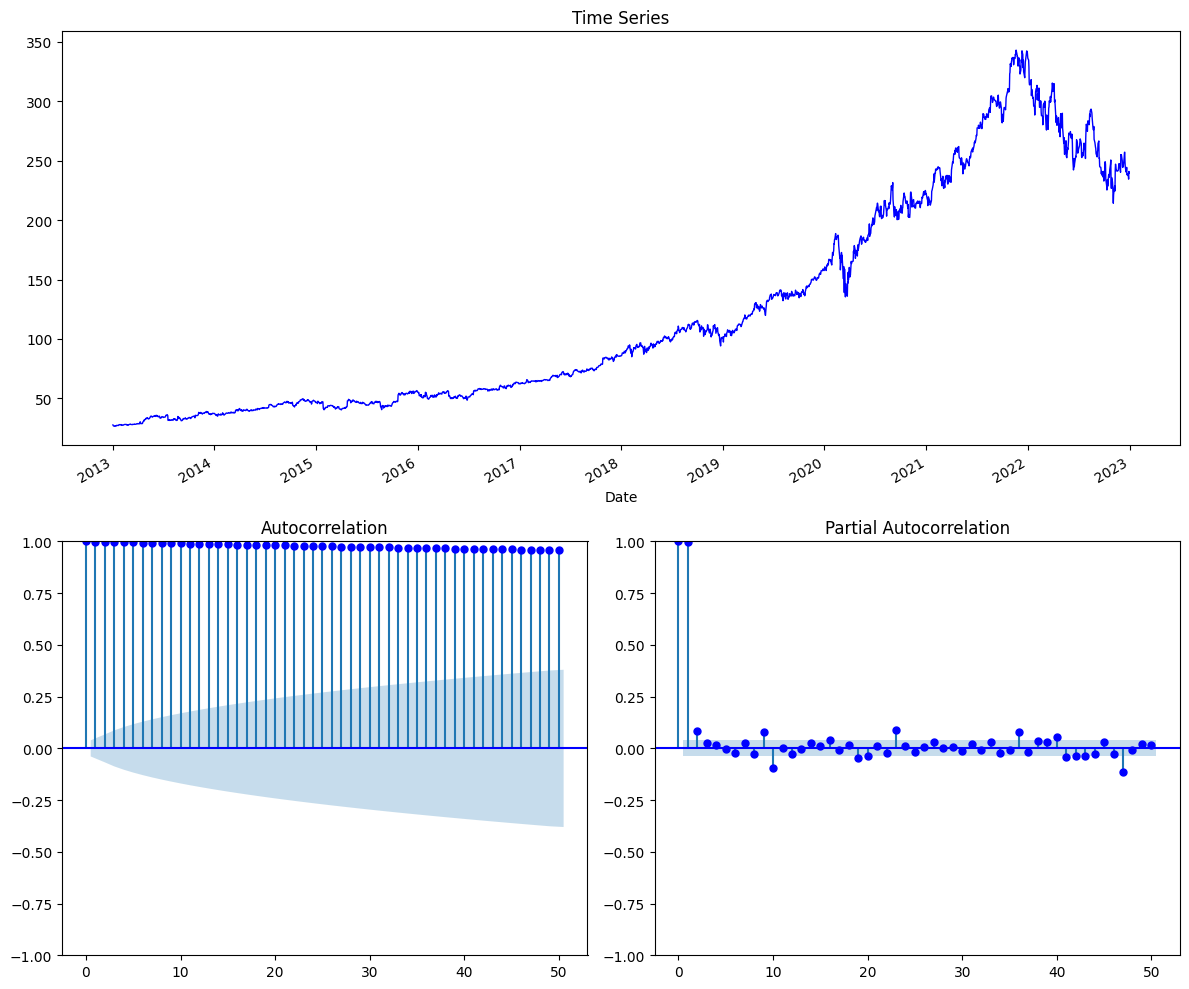

In [ ]:
plotds(Microsoft["Close"], nlag = 50)

We already can see we are working with non Stationary data. As I mentioned before, the Autocorrelation function can detect patterns and observe if the data have seasonality. In this case, the visualisation does not provide any evidence of seasonality. There is no sinusoidal wave that is usually displayed in the case of seasonality.

### Mean and variance of splited time period

In [ ]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 = Microsoft.iloc[:1258].Close.mean(), Microsoft.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = Microsoft.iloc[:1258].Close.var(), Microsoft.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 49.734531, mean2 = 126.596736
variance1 = 197.844078, variance2 = 8037.079881


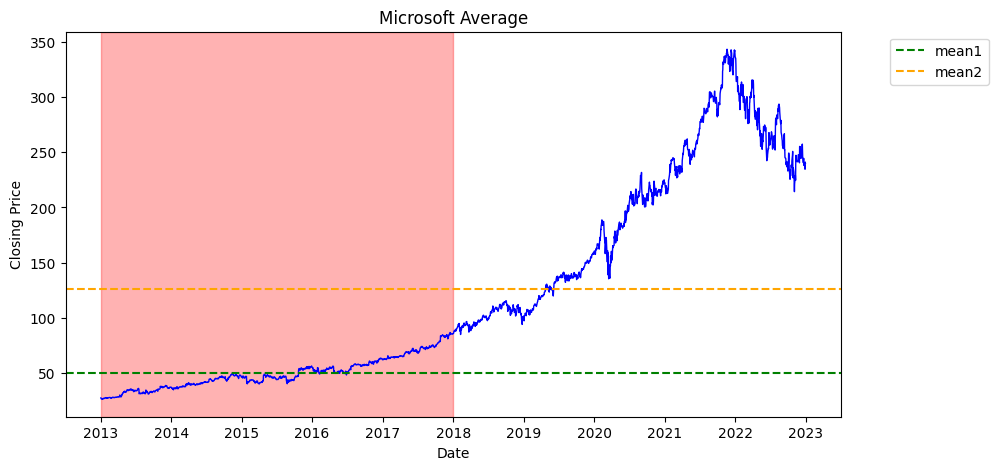

In [ ]:
# Plot time series data
plt.figure(figsize=(10, 5))
plt.plot(Microsoft.Close, color='blue', lw=1.0)

# Highlight first 125 rows in red
plt.axvspan(Microsoft.index[0],Meta.index[1258], color='red', alpha=0.3)

# Plot mean values for each part of the time series
plt.axhline(mean1, color='green', linestyle='dashed', label='mean1')
plt.axhline(mean2, color='orange', linestyle='dashed', label='mean2')

# Add legend and axis labels
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Microsoft Average')
plt.show()

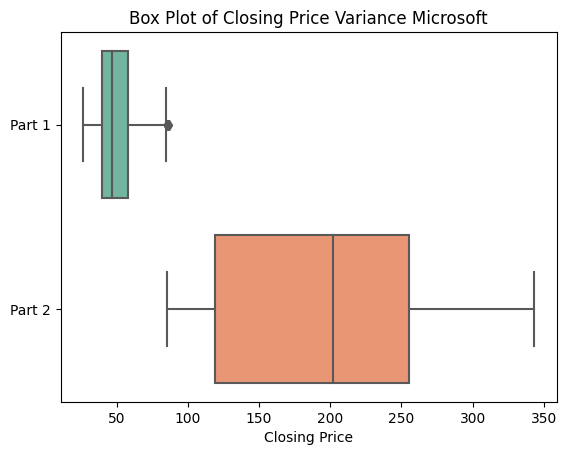

In [ ]:
# Create box plots for each part of the time series
variance = [Microsoft.iloc[:1258].Close, Microsoft.iloc[1258:].Close]

sns.boxplot(data = variance, orient='h', palette='Set2')
plt.yticks([0, 1], ['Part 1', 'Part 2'])
plt.xlabel('Closing Price')
plt.title('Box Plot of Closing Price Variance Microsoft')
plt.show()

The analysis of the mean illustrates that the difference between the time period is not significant for such as long period of time. The difference in mean values can indicate the rising trend of Google Stocks.

However, the variance of the periods is significantly different. We can say that the variability of the Google price in the second period is higher. It is useful information for predicting the future performance of Google Stock.    

The two statistical representations of two parts help to understand the behaviour of the stock price over time.

**mean1 = 49.734531, mean2 = 126.596736**

**variance1 = 197.844078, variance2 = 8037.079881**

In [ ]:
series = Microsoft['Close'].values

In [ ]:
from  statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag = 'AIC')

In [ ]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -0.420386
p-value: 0.906639
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


The ADF tests provide the results of the test statistic, p-value, and critical value at 1%, 5%, and 10% confidence intervals

The p-value is 0.906639 which is greater than the significance level of 0.05. 
ADF statistic is higher than any of the critical values.

##Difference. Transforming into Stationary.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Call ARIMA function to train the model on the 'Close' price
model = ARIMA(Microsoft['Close'], order = (1, 1, 0))

# Train ARIMA Model on the 'Close' price dataset
results_AR = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Store one difference value of the 'Close' column
first_order_diff_mc = Microsoft['Close'].diff(2)

# Display the first five records
first_order_diff_mc.head()

Date
2013-01-02         NaN
2013-01-03         NaN
2013-01-04   -0.880001
2013-01-07   -0.559999
2013-01-08   -0.190001
Name: Close, dtype: float64

In [ ]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff_mc = Microsoft['Close'].diff(2).dropna()

# Display the first five records
first_order_diff_mc.head()

Date
2013-01-04   -0.880001
2013-01-07   -0.559999
2013-01-08   -0.190001
2013-01-09    0.010000
2013-01-10   -0.090000
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of Microsoft during 2013 -2023')

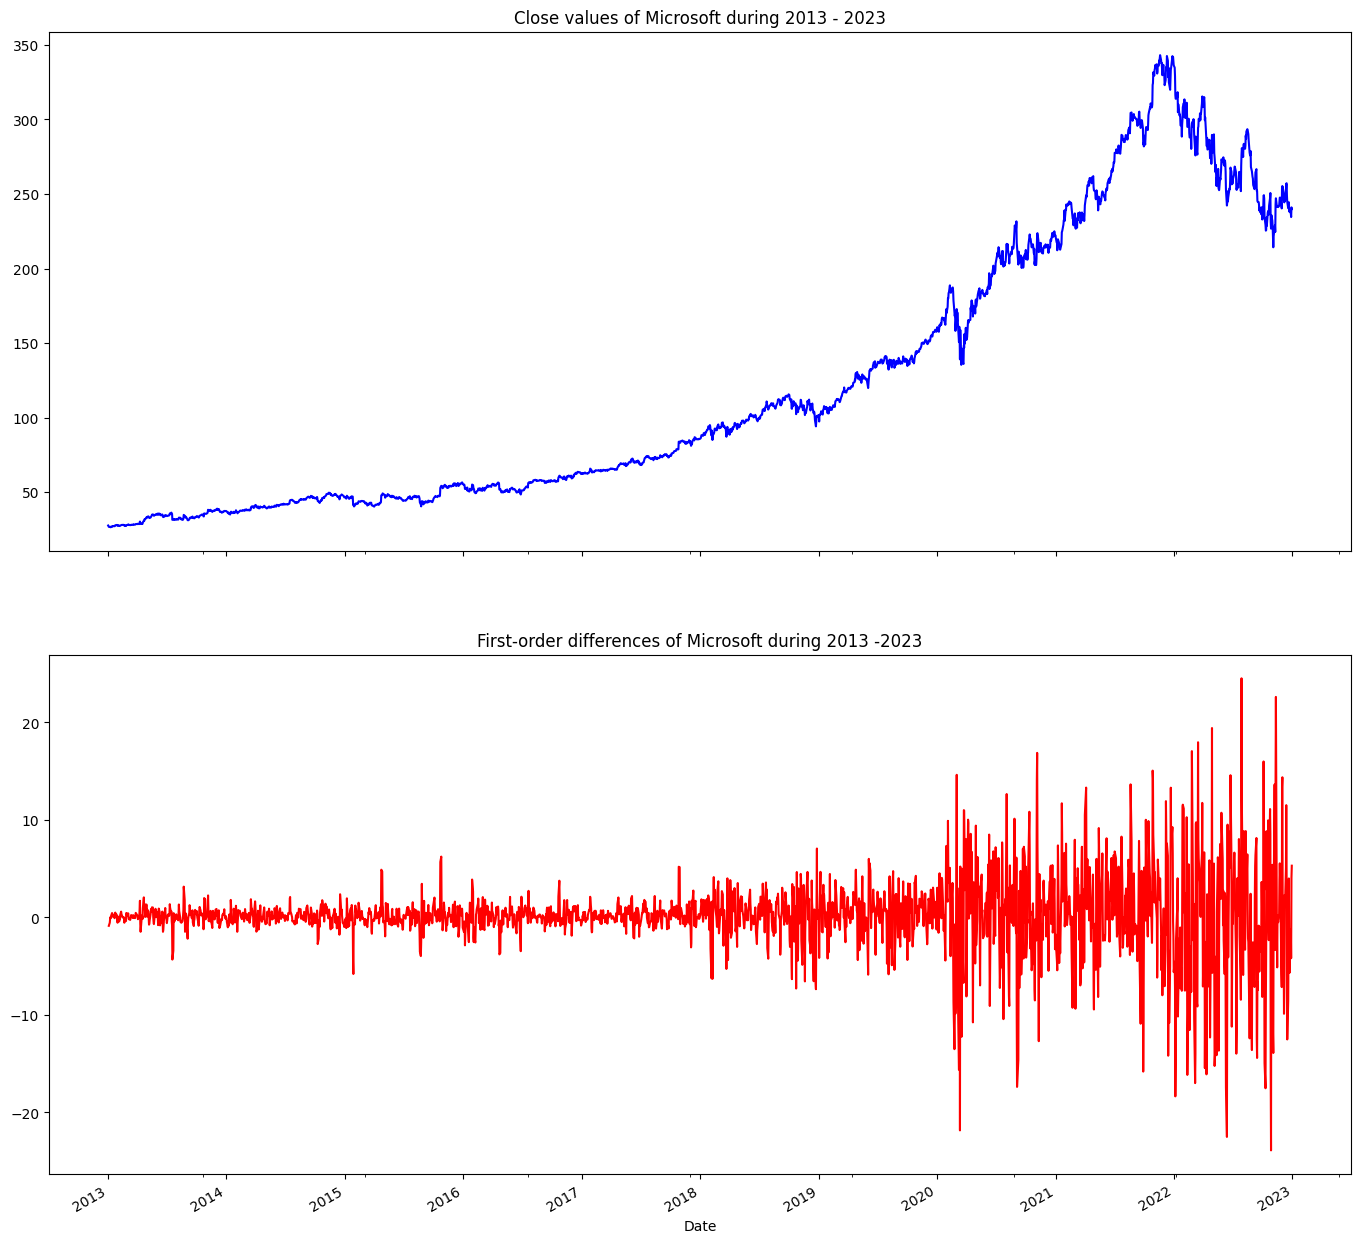

In [ ]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(16.8, 16.8)
Microsoft['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of Microsoft during 2013 - 2023')
first_order_diff_mc.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of Microsoft during 2013 -2023')

We will display trend, ACF and PACF to see if the number of differnces has been chosen correctly. 
However we will perform Dicky Fuller Test to display P value.

ADF Statistic: -10.135266
p-value: 0.000000


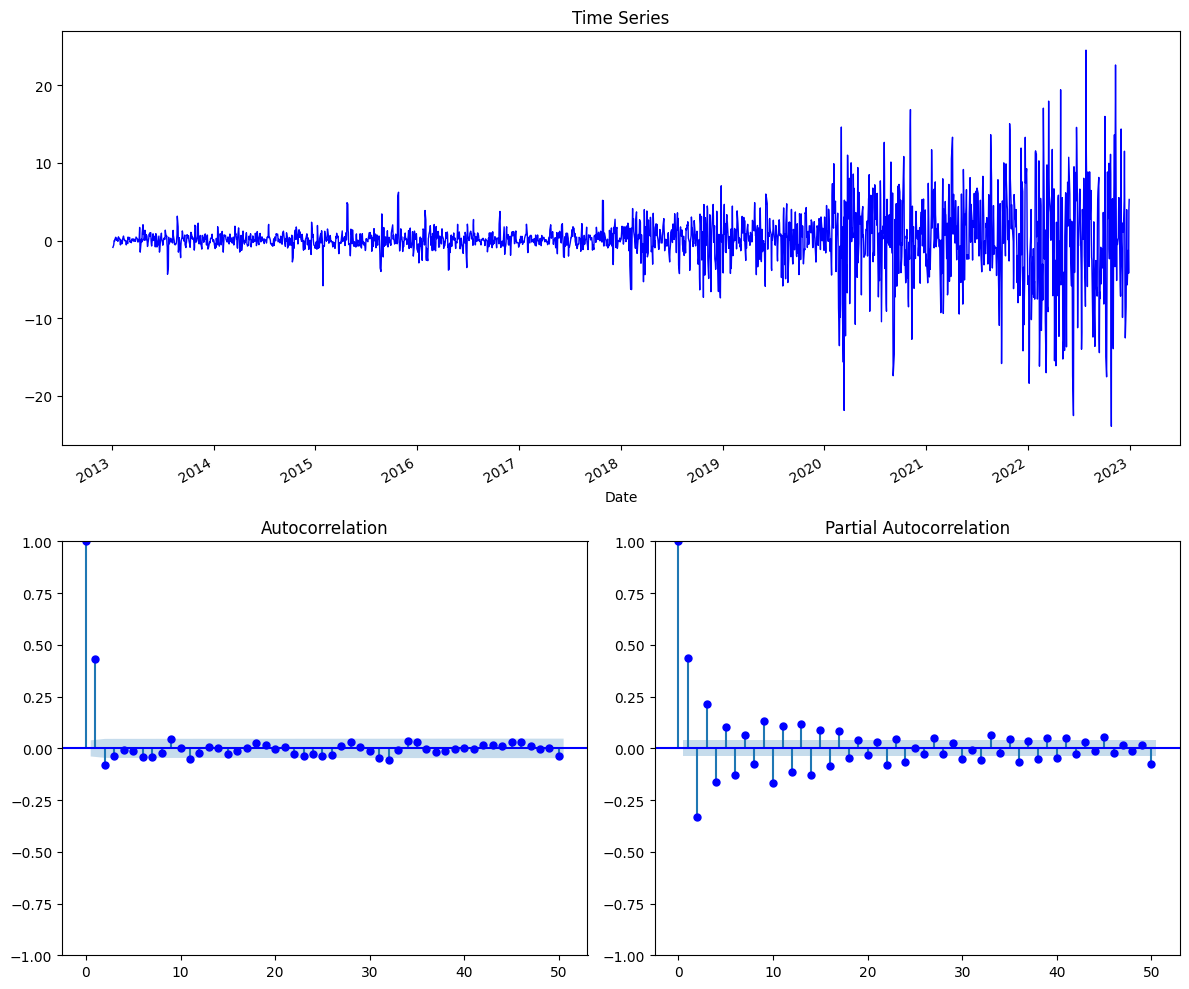

In [ ]:
# plot the data with 50 lags
plotds(first_order_diff_mc, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff_mc)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

After the test application, we have P value = 0. It means we have stationary data. 
We run the code with 1 and 2 differences. The autocorrelation graph shows significant improvement if we use the first 2 rows from the close price in order to predict the result. We have a visible sinusoidal wave of the values.

##Akaike information criterion (AIC).

In [ ]:
# A nested loop is written to calculate the AIC values
aicValue_list=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(Microsoft['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicValue_list.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicValue_list)

[[0, 1, 0, 12351.141293878314], [0, 1, 1, 12314.217381922297], [0, 1, 2, 12316.207070495551], [1, 1, 0, 12314.329680267045], [1, 1, 1, 12316.194489983693], [1, 1, 2, 12317.849213258705], [2, 1, 0, 12316.269318518509], [2, 1, 1, 12314.80106999606], [2, 1, 2, 12316.254487674818], [0, 2, 0, 14384.581064260743], [0, 2, 1, 12354.829508110739], [0, 2, 2, 12317.420908117423], [1, 2, 0, 13440.693170080885], [1, 2, 1, 12317.604139842933], [1, 2, 2, 12355.32997652419], [2, 2, 0, 13133.28666060189], [2, 2, 1, 12319.516581509703], [2, 2, 2, 12316.868731160495]]




The result of AIC:
The smallest AIC VALUE -  [0, 1, 1, 12314.217381922297]. The best parameters for the model will be ARIMA(0,1,1). 

The model AR term of order 1, an I term of order 1 (the data will be differenced once), and an MA term of order 1.

## Traning the model
We will train the model with the parameters ARIMA(0,1,1) and display the summary of it.

In [ ]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(Microsoft['Close'].tolist(), order = (0, 1, 1))

# d = 2, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# disp : int, optional
# If True, convergence information is printed.  For the default l_bfgs_b solver, disp controls the frequency of the output 
# during the iterations. disp < 0 means no output in this case.

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2518
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -6155.109
Date:                Sun, 30 Apr 2023   AIC                          12314.217
Time:                        15:49:02   BIC                          12325.879
Sample:                             0   HQIC                         12318.450
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1246      0.010    -13.001      0.000      -0.143      -0.106
sigma2         7.7908      0.096     80.754      0.000       7.602       7.980
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              8985.46
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              45.85   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AIC	12314.217

BIC	12325.879

HQIC	12318.450

**Fiting the ARIMA** 
    
We will declare the variable where we store values of ARIMA. The model using the fittedvalues method of the ARIMAResults object arima_obj_fit. And store them in the data frame "Microsoft"

We will declare diffval by adding the difference between the observed values and the predicted values to the fitted values
    

In [ ]:
# Declare the array 'prediction' and append the values 
prediction = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
Microsoft['Microsoft_ARIMA'] = prediction

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
Microsoft['Microsoft_diffval'] = diffval

# Display first five records
Microsoft.head()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2013-01-02 2013-01-02  27.250000  27.730000  27.150000  27.620001  22.717789   
2013-01-03 2013-01-03  27.629999  27.650000  27.160000  27.250000  22.413460   
2013-01-04 2013-01-04  27.270000  27.340000  26.730000  26.740000  21.993973   
2013-01-07 2013-01-07  26.770000  26.879999  26.639999  26.690001  21.952847   
2013-01-08 2013-01-08  26.750000  26.790001  26.459999  26.549999  21.837690   

              Volume    Company                                  Origin  \
Date                                                                      
2013-01-02  52899300  Microsoft  Albuquerque, New Mexico, United States   
2013-01-03  48294400  Microsoft  Albuquerque, New Mexico, United States   
2013-01-04  52521100  Microsoft  Albuquerque, New Mexico, United States   
2013-01-07  37110400  Microsoft  Albuquerque, New Mexico, United States   
2013-01-08  44703100  Microsoft  Albuquerque, New Mexico, United States   

                                   Headquarter  Microsoft_ARIMA  \
Date                                                              
2013-01-02  Redmond, Washington, United States         0.000000   
2013-01-03  Redmond, Washington, United States        27.619974   
2013-01-04  Redmond, Washington, United States        27.295381   
2013-01-07  Redmond, Washington, United States        26.809163   
2013-01-08  Redmond, Washington, United States        26.704844   

            Microsoft_diffval  
Date                           
2013-01-02          27.620001  
2013-01-03          27.250000  
2013-01-04          26.740000  
2013-01-07          26.690001  
2013-01-08          26.549999

If we have a look on column Close, ARIMA and diffval we will be able to see how close  the values are. 
## Visualisation of the model 

We have a data frame with 2 new columns "ARIMA" an "diffval". We will visualise actual and predicted values and color them in blue: actual values and green:predicted values. We will be able to see how close the predicted value to the actual.

Text(0, 0.5, 'Closing Price')

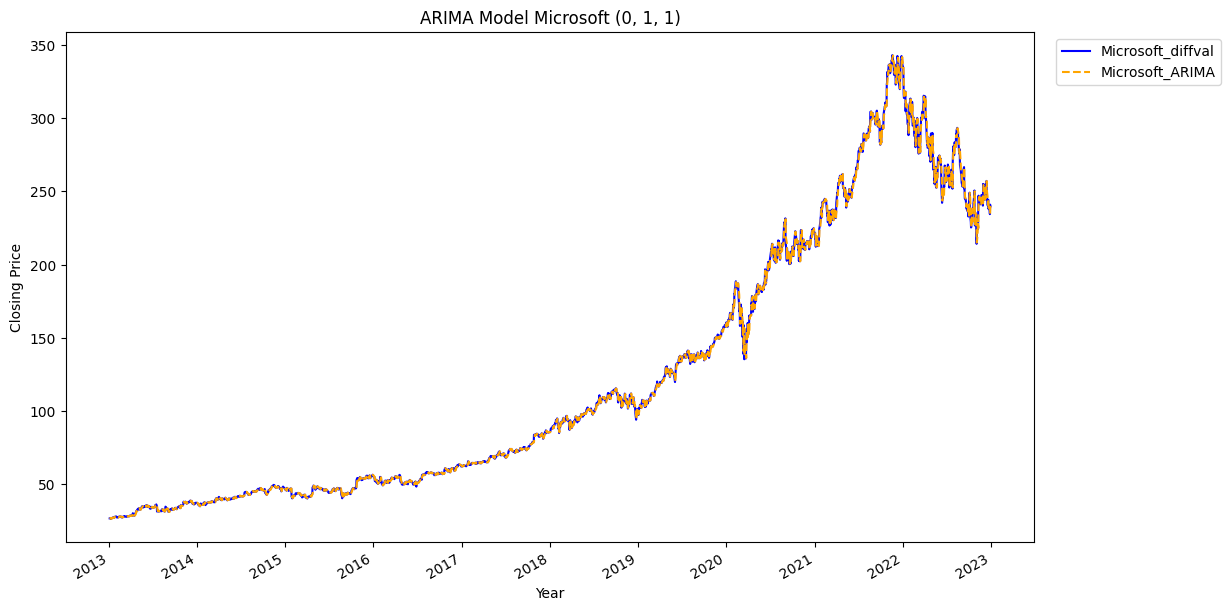

In [ ]:
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(12.5, 7.5)

# Ignore first two rows because of difference factor d = 2
#add the leble 
Microsoft['Microsoft_diffval'].iloc[2:].plot(color = 'blue', linestyle = '-', ax = axarr)
Microsoft['Microsoft_ARIMA'].iloc[2:].plot(color = 'orange', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA Model Microsoft (0, 1, 1)')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
plt.xlabel('Year')
plt.ylabel('Closing Price')

## Prediction Interval

In [ ]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 239.873 between 236.296 and 243.450
90.0% Confidence Interval: 239.873 between 235.282 and 244.464
95.0% Confidence Interval: 239.873 between 234.402 and 245.343
99.0% Confidence Interval: 239.873 between 232.683 and 247.062


80% Confidence: 3.577

90% Confidence: 4.591

95% Confidence: 5.47

99% Confidence: 7.091

## Spliting the data
We will spli the data into traning and testing set and apply the interval. We will visualise the data of spliting as well.




In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
trainMc = Microsoft[:int(0.90 * (len(Microsoft)))]
testMc  = Microsoft[int(0.90 * (len(Microsoft))):]
trainMc.shape, testMc.shape


((2266, 12), (252, 12))

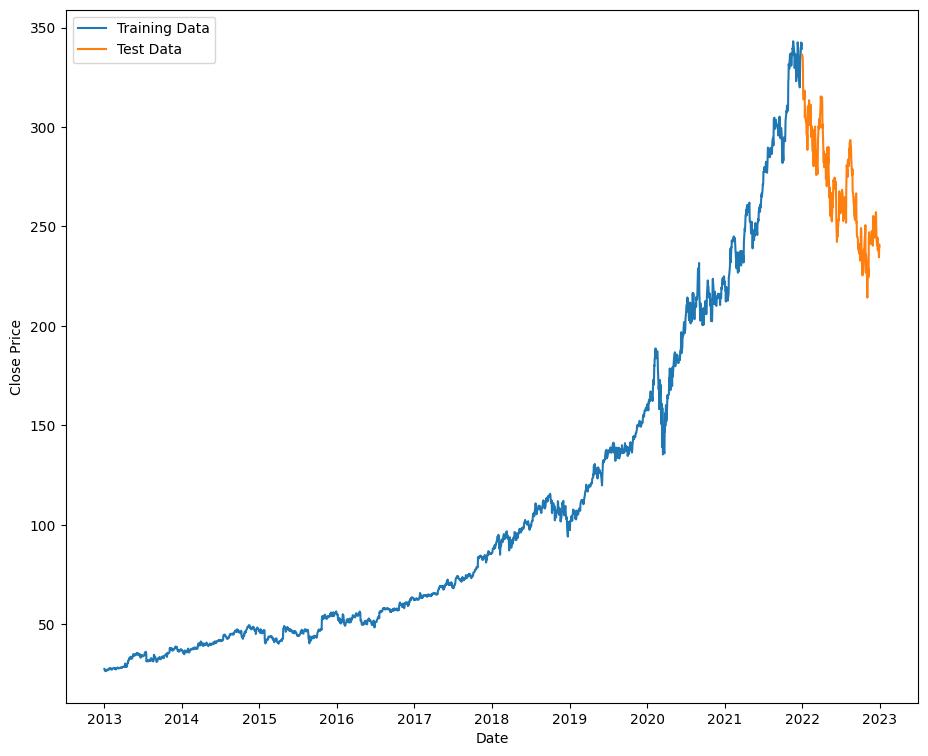

In [ ]:
plt.plot(trainMc['Close'], label='Training Data')
plt.plot(testMc['Close'], label='Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
start = len(trainMc) #  starting point for the predictions
end   = len(trainMc) + len(testMc) - 1 # the ending point for the predictions
# define the ending point for the predictions
predictionsMc = model_fit.predict(start=len(trainMc), end=len(trainMc)+len(testMc)-1, dynamic=False, typ = 'levels')

print(predictionsMc)

[344.16000576 344.59098701 344.44270248 344.86890342 344.72304267
 345.14694651 345.00336782 345.42499903 345.28368384 345.70306062
 345.56399084 345.9811312  345.84428888 346.2592107  346.12457804
 346.53729905 346.40485839 346.81539618 346.68512999 347.09350202
 346.96539292 347.37161649 347.24564724 347.64973954 347.52589303
 347.92787108 347.80613035 348.20601106 348.08635927 348.4841594
 348.36657986 348.76231604 348.64679219 349.04048092 348.92699632
 349.31865396 349.20719231 349.5968351  349.48738023 349.87502428
 349.76756015 350.15322143 350.04773213 350.4314265  350.32789623
 350.7096394  350.60805252 350.98786009 350.88820105 351.2660885
 351.1683419  351.54432457 351.44847511 351.82256823 351.72860077
 352.10081943 352.00871891 352.37907811 352.28882961 352.65734421
 352.56893292 352.93561766 352.8490289  353.21389841 353.12911761
 353.4921864  353.40919911 353.77048158 353.68927346 354.04878388
 353.96934071 354.32709325 354.24940093 354.60540962 354.52945415
 354.8837329

In [ ]:
testMc['Close'].mean()

269.1845631587302

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


# Calculate root mean squared error
rmse = sqrt(mean_squared_error(predictionsMc, testMc['Close'].values))
print('RMSE: %.3f' % rmse)

RMSE: 99.056


In case RMSE is very close to the value of the test mean it considers a bed model. In this case, the difference between the measurement is significant. We might assume that the model is built well.

In [ ]:
# Fit ARIMA model
model = ARIMA(trainMc['Close'].tolist(), order=(0, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2266
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4973.238
Date:                Sun, 30 Apr 2023   AIC                           9950.475
Time:                        17:47:15   BIC                           9961.926
Sample:                             0   HQIC                          9954.653
                               - 2266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1846      0.009    -21.595      0.000      -0.201      -0.168
sigma2         4.7279      0.054     88.343      0.000       4.623       4.833
Ljung-Box (L1) (Q):                   0.85   Jarque-

In [ ]:
Microsoft.tail()

Date        Open        High         Low       Close  \
Date                                                                    
2022-12-23 2022-12-23  236.110001  238.869995  233.940002  238.729996   
2022-12-27 2022-12-27  238.699997  238.929993  235.830002  236.960007   
2022-12-28 2022-12-28  236.889999  239.720001  234.169998  234.529999   
2022-12-29 2022-12-29  235.649994  241.919998  235.649994  241.009995   
2022-12-30 2022-12-30  238.210007  239.960007  236.660004  239.820007   

             Adj Close    Volume    Company  \
Date                                          
2022-12-23  238.133545  21207000  Microsoft   
2022-12-27  236.367981  16688600  Microsoft   
2022-12-28  233.944031  17457100  Microsoft   
2022-12-29  240.407837  19770700  Microsoft   
2022-12-30  239.220825  21938500  Microsoft   

                                            Origin  \
Date                                                 
2022-12-23  Albuquerque, New Mexico, United States   
2022-12-27  Albuquerque, New Mexico, United States   
2022-12-28  Albuquerque, New Mexico, United States   
2022-12-29  Albuquerque, New Mexico, United States   
2022-12-30  Albuquerque, New Mexico, United States   

                                   Headquarter  Microsoft_ARIMA  \
Date                                                              
2022-12-23  Redmond, Washington, United States       238.925038   
2022-12-27  Redmond, Washington, United States       238.754291   
2022-12-28  Redmond, Washington, United States       237.183508   
2022-12-29  Redmond, Washington, United States       234.860528   
2022-12-30  Redmond, Washington, United States       240.243999   

            Microsoft_diffval  
Date                           
2022-12-23         238.729996  
2022-12-27         236.960007  
2022-12-28         234.529999  
2022-12-29         241.009995  
2022-12-30         239.820007

In [ ]:
# Define the range of future dates
future_dates = pd.date_range(start='2022-12-31', end='2023-12-31')

# Make predictions for the next 12 months
predictionsMc = pd.Series(model_fit.predict(start=len(trainMc), end=len(trainMc)+len(future_dates)-1, dynamic=False, typ='levels'), index=future_dates, name='ARIMA Predictions')

print(predictionsMc)

2022-12-31    339.779594
2023-01-01    339.779594
2023-01-02    339.779594
2023-01-03    339.779594
2023-01-04    339.779594
                 ...    
2023-12-27    339.779594
2023-12-28    339.779594
2023-12-29    339.779594
2023-12-30    339.779594
2023-12-31    339.779594
Freq: D, Name: ARIMA Predictions, Length: 366, dtype: float64


<Axes: >

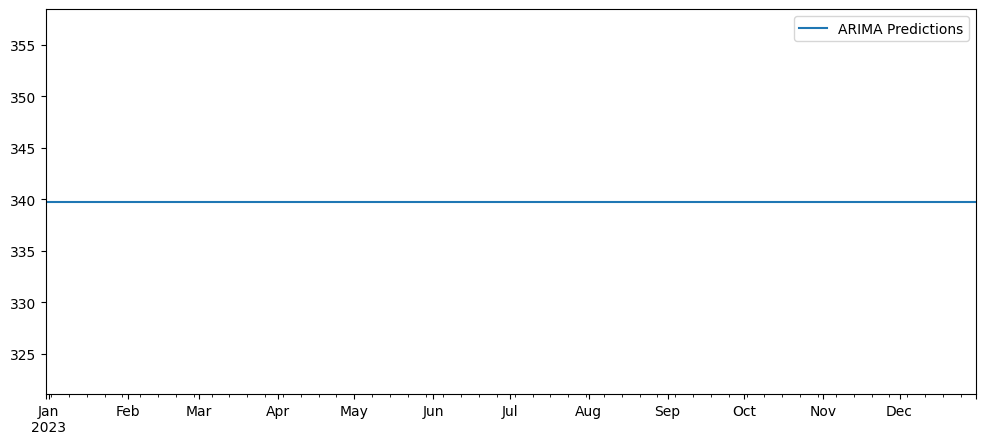

In [ ]:
predictionsMc.plot(figsize=(12,5), legend = True)

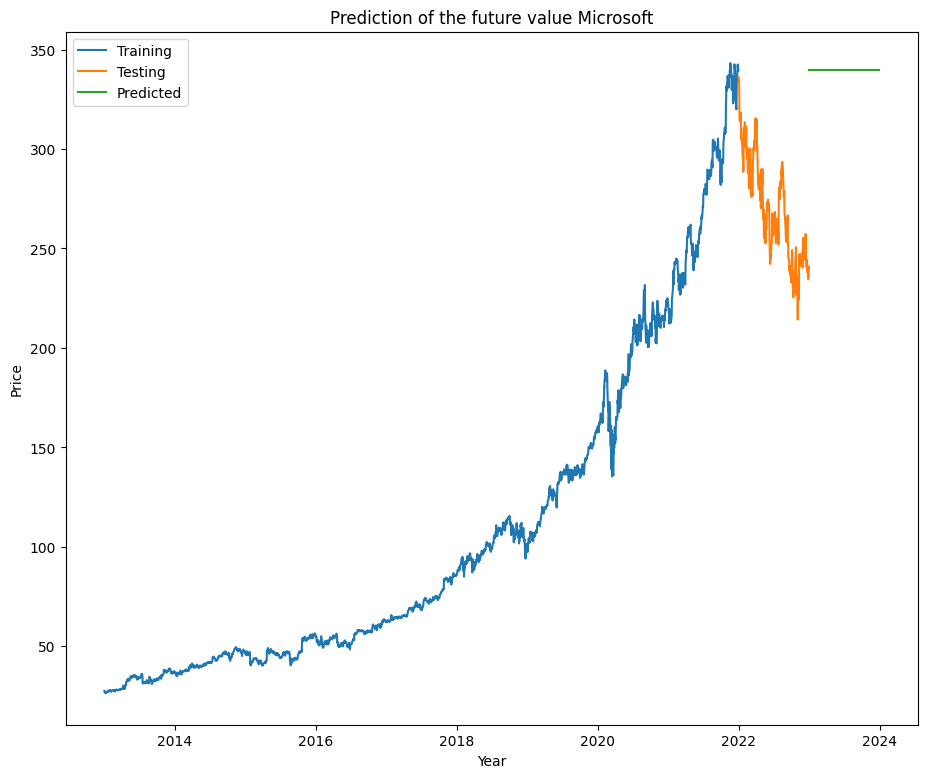

In [ ]:
# Plot the actual and predicted values
plt.plot(trainMc['Close'], label='Training')
plt.plot(testMc['Close'], label='Testing')
plt.plot(predictionsMc, label='Predicted')
plt.legend(loc='upper left')
plt.title("Prediction of the future value Microsoft")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

Overal Prediction. 

Companies such us Google, Meta and Microsoft have a straight line of predicted value. Due to stationarity of the data we are obtaining the predictin as straight line. It is one of the simplest visualisation of forcasted values. However, the line of Apple goes up what showf raising trend in the values. 

# Visualisation of the modles for every company

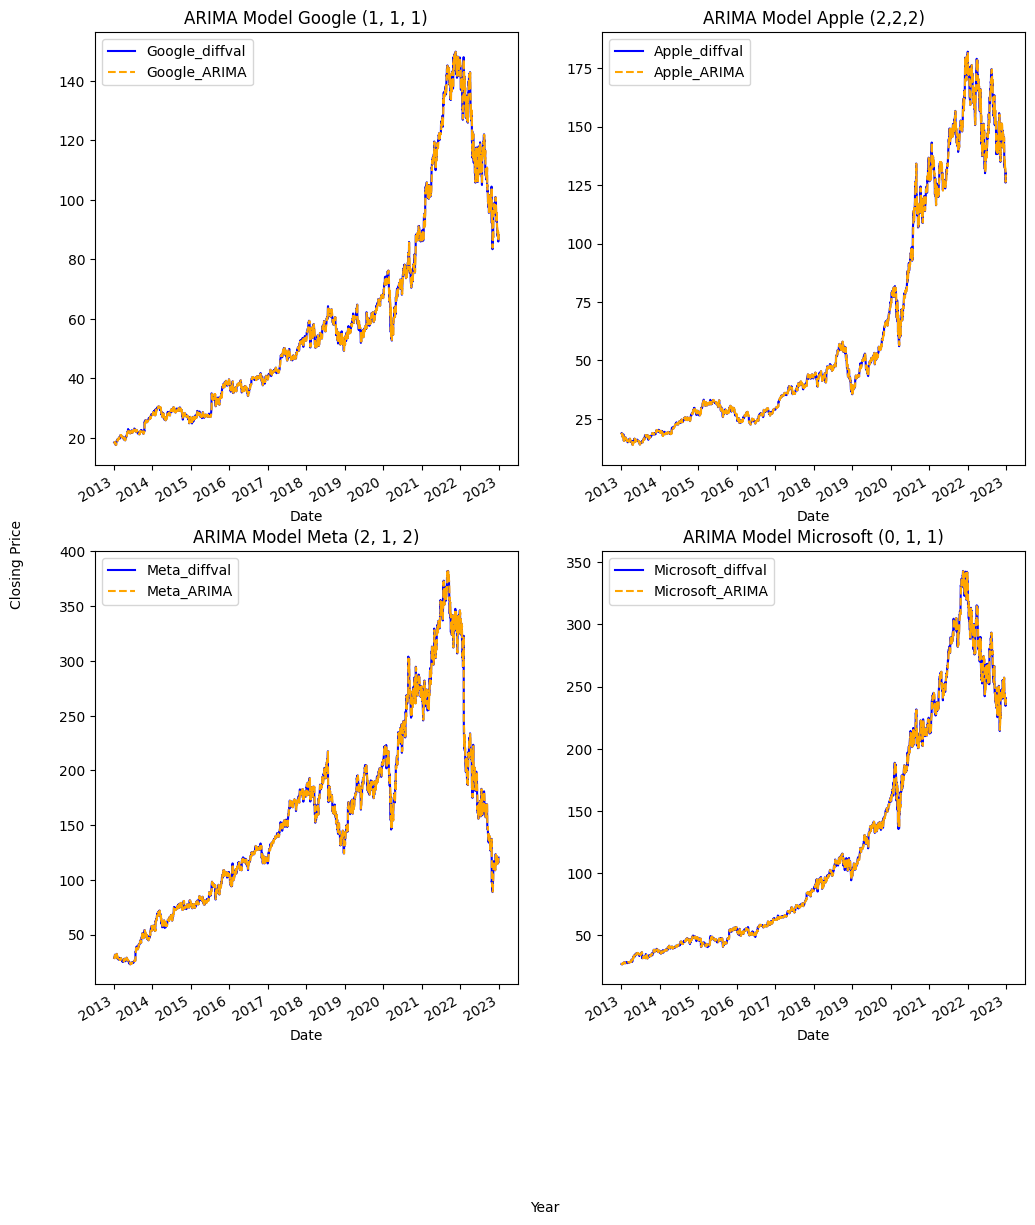

In [ ]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 14))
axarr = axes.flatten()

# Plot the data for each company on a separate subplot

Google['Google_diffval'].iloc[2:].plot(color='blue', linestyle='-', ax=axarr[0])
Google['Google_ARIMA'].iloc[2:].plot(color='orange', linestyle='--', ax=axarr[0])
axarr[0].set_title('ARIMA Model Google (1, 1, 1)')

Apple['Apple_diffval'].iloc[2:].plot(color='blue', linestyle='-', ax=axarr[1])
Apple['Apple_ARIMA'].iloc[2:].plot(color='orange', linestyle='--', ax=axarr[1])
axarr[1].set_title('ARIMA Model Apple (2,2,2)')

Meta['Meta_diffval'].iloc[2:].plot(color='blue', linestyle='-', ax=axarr[2])
Meta['Meta_ARIMA'].iloc[2:].plot(color='orange', linestyle='--', ax=axarr[2])
axarr[2].set_title('ARIMA Model Meta (2, 1, 2)')

Microsoft['Microsoft_diffval'].iloc[2:].plot(color='blue', linestyle='-', ax=axarr[3])
Microsoft['Microsoft_ARIMA'].iloc[2:].plot(color='orange', linestyle='--', ax=axarr[3])
axarr[3].set_title('ARIMA Model Microsoft (0, 1, 1)')


# Set the common x and y labels for all subplots
fig.text(0.5, 0.04, 'Year', ha='center', va='center')
fig.text(0.06, 0.5, 'Closing Price', ha='center', va='center', rotation='vertical')

# Add a legend to the first subplot
axarr[0].legend()
axarr[1].legend()
axarr[2].legend()
axarr[3].legend()

# Show the plot
plt.show()

Overall application of the model provides a very close result between actual and predicted values. Each model has it is own parameters in order to perform the prediction. The blue line represents the actual value and the orange line represents the predicted values by the model. Based on we can assume that the metrics chosen are correct and that the model is reliable 

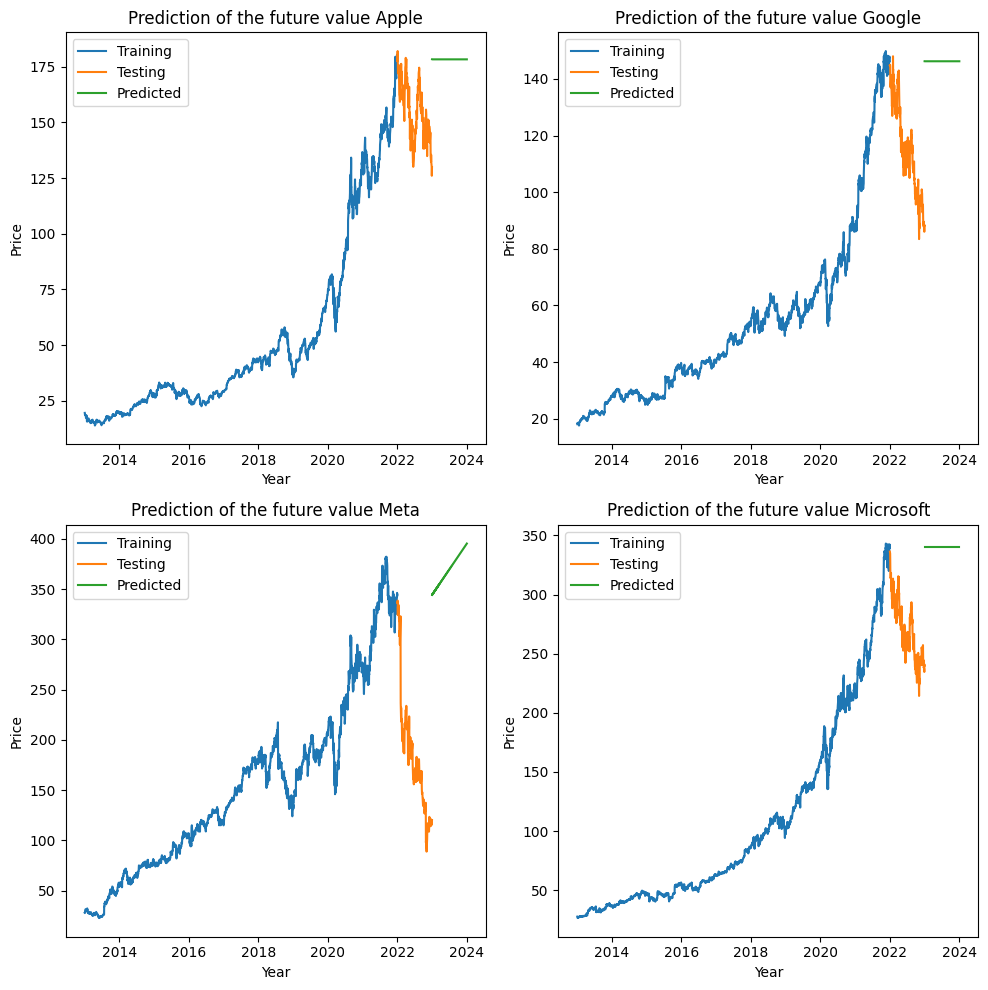

In [ ]:

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot for Apple
axs[0, 0].plot(trainA['Close'], label='Training')
axs[0, 0].plot(testA['Close'], label='Testing')
axs[0, 0].plot(predictionsA, label='Predicted')
axs[0, 0].set_title("Prediction of the future value Apple")
axs[0, 0].set_xlabel("Year")
axs[0, 0].set_ylabel("Price")
axs[0, 0].legend(loc='upper left')

# Plot for Google
axs[0, 1].plot(trainG['Close'], label='Training')
axs[0, 1].plot(testG['Close'], label='Testing')
axs[0, 1].plot(predictionsG, label='Predicted')
axs[0, 1].set_title("Prediction of the future value Google")
axs[0, 1].set_xlabel("Year")
axs[0, 1].set_ylabel("Price")
axs[0, 1].legend(loc='upper left')

# Plot for Meta
axs[1, 0].plot(trainM['Close'], label='Training')
axs[1, 0].plot(testM['Close'], label='Testing')
axs[1, 0].plot(predictionsM, label='Predicted')
axs[1, 0].set_title("Prediction of the future value Meta")
axs[1, 0].set_xlabel("Year")
axs[1, 0].set_ylabel("Price")
axs[1, 0].legend(loc='upper left')

# Plot for Microsoft
axs[1, 1].plot(trainMc['Close'], label='Training')
axs[1, 1].plot(testMc['Close'], label='Testing')
axs[1, 1].plot(predictionsMc, label='Predicted')
axs[1, 1].set_title("Prediction of the future value Microsoft")
axs[1, 1].set_xlabel("Year")
axs[1, 1].set_ylabel("Price")
axs[1, 1].legend(loc='upper left')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plots
plt.show()

Overall the prediction for the next year does not give a good result. The reason of it that the model isn't good for very long predictions. It is not widely used fir forecasting over 6 months. 

However the mode has very good performance with actual and forecated value. We will apply anther model for beter future forecasting.

# Double Exponential Smoothing


Double Exponential Smoothing is well known as well as Holt's trend method forecast as well, that method aims to provide a short-term forecast trend. It works for datasets with the following profile : 

Double Exponential Smoothing is variable from Single exponential smoothing, although the smoothing process is applied twice on the dataset. “An alpha (α) weighting parameter is used on the first or single exponential smoothing (SES) while a beta (β) weighting parameter is used on the second or double exponential smoothing (DES).”(Polanitzer, 2022)


On the following lines of code, the Machine Learning method will be applied in order to predict in a short period the prices from the category “Close” from the stocks dataset. The prices will be displayed afterwards and visualized on graphs. We will end the process by comparing outcomes. 

The formula is followed by:
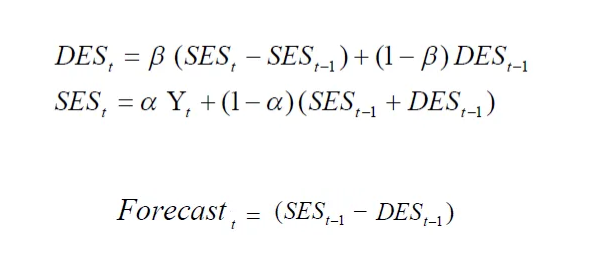

(Image by Polanitzer, 2022)

Where:

- α = alph
- β = beta
- DES = Double exponential smoothing
- SES = Single exponential smoothing
- Y = “Close” price (real values)
- Forecast = Predicted values of “Close” price

Let's get our hands on the model.


In [ ]:
Smooth = Google[["Date","Close"]]

Smooth['Date'] = pd.to_datetime(Smooth['Date'])

Smooth.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [ ]:
## Data prep to work with time-series
## Setting up datetime index
Smooth.set_index("Date", inplace=True)
Smooth.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)

In [ ]:
y = Smooth['Close'].resample('MS').mean()

*On the code above, I sat up and resample the values of the Close price per montly prices using the mean of values for that range of time.*

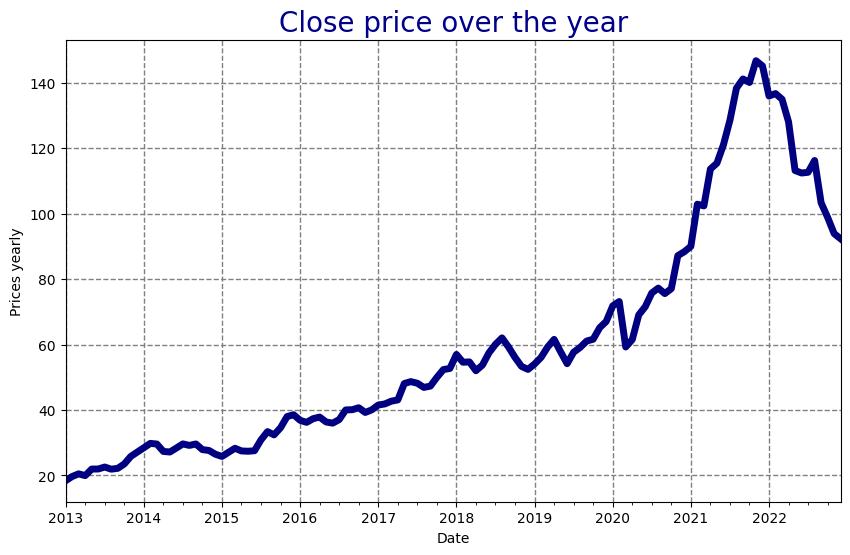

In [ ]:
y.plot(figsize=(10, 6),color="navy",linewidth = 5)

plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.ylabel("Prices yearly")
plt.title("Close price over the year", size=20, color="darkblue");


plt.show()

*As we can check out there is not recognized sasionality on the "Close" prices over the years.*

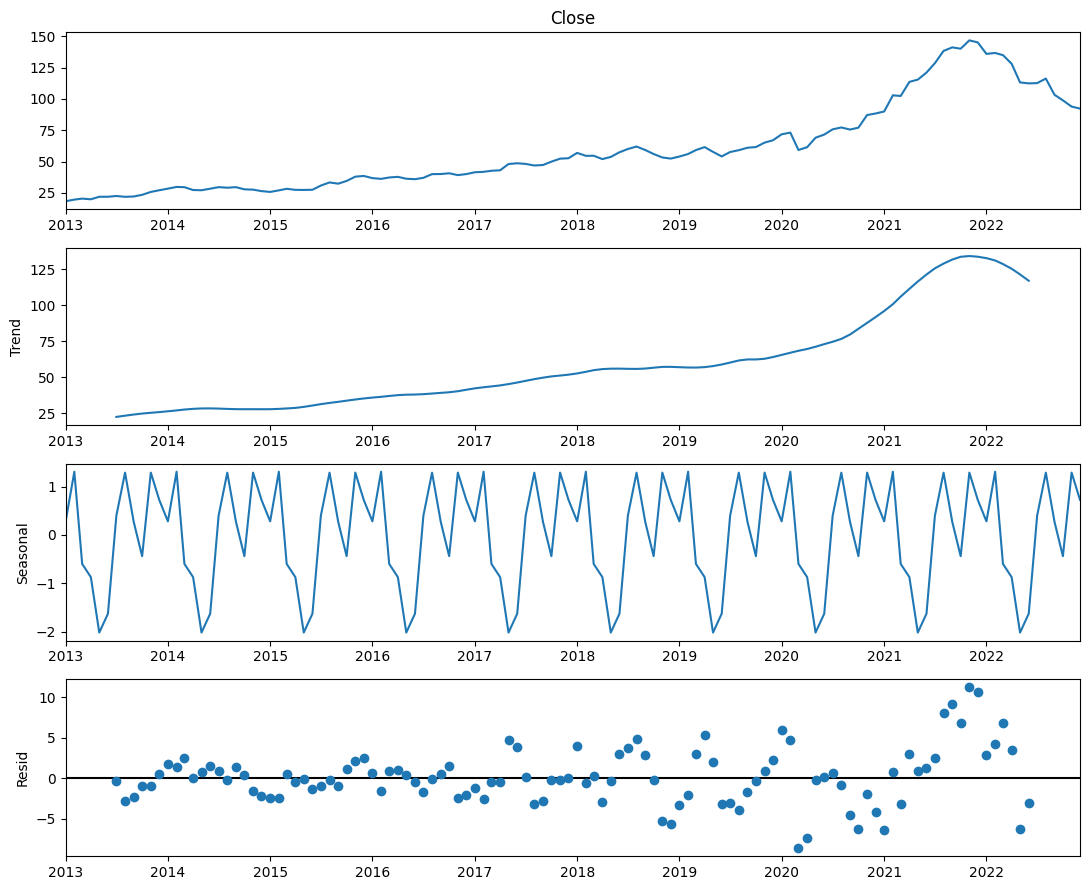

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')

fig = decomposition.plot()
plt.show()

With the model *seasonal_decompose*  we are able to analyse the trend, seasonality and residuals from the dataset. So let’s break down the outcomes: 

- Trend: The dataset shows an ascending trend over the years, which means the  close price was getting higher over time. 
- Seasonality: Shows an inconsistent pattern although we cannot say is a normal seasonality recognized. 
- Residual: The residual values show an ascending wide range over the years.

*(The code and thime-series developement comes from the website www.digitalocean.com, n.d.)*




## Model DES development 

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

*Above, we uploaded all the necessary libraries.*

***********************

*In the next line, we will define the variables to work with the ML model separately with each of the companies, set the column "Date" as a datetime and afterwards, set up this column as a index. That will make us to analyse the predicted prices once the Double Exponential Smoothing model is done.*

In [ ]:
from datetime import date

## Meta 
SmoothM = Meta[["Date","Close"]]
SmoothM['Date'] = pd.to_datetime(SmoothM['Date'], format="%Y-%m-%d")
SmoothM.set_index('Date', inplace=True)

## Google 
SmoothG = Google[["Date","Close"]]
SmoothG['Date'] = pd.to_datetime(SmoothG['Date'], format="%Y-%m-%d")
SmoothG.set_index('Date', inplace=True)

##Microsoft 
SmoothMS = Microsoft[["Date","Close"]]
SmoothMS['Date'] = pd.to_datetime(SmoothMS['Date'], format="%Y-%m-%d")
SmoothMS.set_index('Date', inplace=True)


##Apple
SmoothA = Apple[["Date","Close"]]
SmoothA['Date'] = pd.to_datetime(SmoothA['Date'], format="%Y-%m-%d")
SmoothA.set_index('Date', inplace=True)


## Double Exponential Smoothing 
### Company : Apple

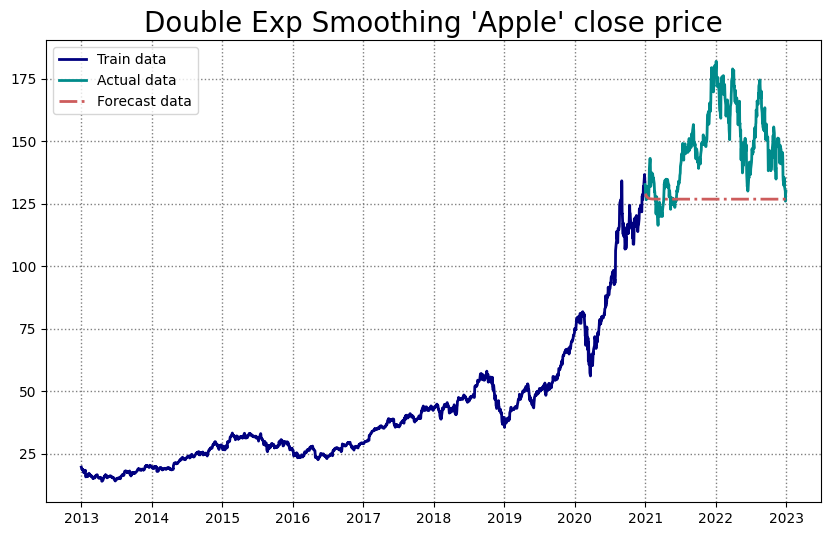

In [ ]:
# Select only the column with the time series data
ts_data = SmoothA['Close']

# Create the double exponential smoothing model
model = ExponentialSmoothing(ts_data, trend='add', damped=True, seasonal=None,)

# Split the data into train and test sets
train_data = ts_data[:int(0.8*len(ts_data))]
test_data = ts_data[int(0.8*len(ts_data)):]


# Fit the model to the training data
#alpha = 0.3
#beta = 0.1
model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.1)

# Generate forecasts for the test data
forecast_data = model_fit.forecast(len(test_data))

# Plot the actual and forecasted data
plt.figure(figsize=(10,6))
plt.grid(color = 'grey', linestyle = ':', linewidth = 1)
plt.plot(train_data.index, train_data, label='Train data',linewidth=2, color="navy")
plt.plot(test_data.index, test_data, label='Actual data',linewidth=2, color="darkcyan")
plt.plot(test_data.index, forecast_data, label='Forecast data',linewidth=2, color="indianred",linestyle = 'dashdot')
plt.title("Double Exp Smoothing 'Apple' close price", size=20 );
plt.legend()
plt.show()

## Model and parameters

For this first model, we will work with the company Apple. 
We are going to break down the structure of the model. The same will be applied in all the companies so no need to break down the other ones afterwards. 

In the first part, we defined our target variable which is the column “Close”.
For the parameters of the model, we picked up by **adding trend and no seasonality** in order to respect the profile of the dataset we are working with. 
The dataset was split up between train and test subsets and for the values of **alpha and beta, we got 0.3 and 0.1 respectively**. Those are the most common combination of alpha and beta values, which goes in between 0 and 1. 

For the forecast, we fitted the model and defined the length as the same for the test subset. 
Afterwards, the visualization of the model was built up in order to check out the model effects on the dataset for the Close price. 

##  Evaluation of the model

With the view to evaluate our model, we will work with the following index : 

* **MSE- Mean-Squared**: “is an absolute error measure that squares the errors (the difference between the actual historical data and the prediction data by the model)”
(Polanitzer, 2022)
* **RMSE- Root Mean-Squared**: Is defined by the square root of MSE and is the average of the absolute values of the prediction errors. 
* **MAE- Mean Absolute**: “statistic that averages the distance (absolute value of the difference between the actual historical data and the predicted data by the model)”
(Polanitzer, 2022)
* **MAPE- Mean Absolute Percent**: “an average percent error of the historical data points”, in other words, is the difference between the predicted values and the actual ones in percentage. The closest to 0, the best since can explain the accuracy of the model. (Polanitzer, 2022)


In [ ]:
# Calculate mean absolute error
mae = mean_absolute_error(test_data, forecast_data)
print('MAE: %.3f' % mae)

# Calculate mean squared error
mse = mean_squared_error(test_data, forecast_data)
print('MSE: %.3f' % mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

def smape(actual, predicted):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    dividend= np.abs(np.array(actual) - np.array(predicted))
    denominator = np.array(actual) + np.array(predicted)
    
    return 2 * np.mean(np.divide(dividend, denominator, out=np.zeros_like(dividend), where=denominator!=0, casting='unsafe'))

# Calculate SMAPE
smape_val = smape(test_data, forecast_data)
print('SMAPE: %.3f' % smape_val)

MAE: 21.654
MSE: 681.822
RMSE: 26.112
SMAPE: 0.152


The model got 13,9% away from the predicted values and the actual ones by the SMAPE.

## Set the summary of results

In [ ]:
# Initialize the level and trend components

# Create the double exponential smoothing model
model = ExponentialSmoothing(ts_data, trend='add', damped=True, seasonal=None)

# fit the model with alpha=0.3 and beta=0.1
results = model.fit(smoothing_level=0.3, smoothing_trend=0.1)

# Print the model summary
print(results.summary())

# Forecast future values
forecast = results.forecast(steps=12)

# Print the forecasted values
print(forecast)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 2518
Model:             ExponentialSmoothing   SSE                          10068.054
Optimized:                         True   AIC                           3499.702
Trend:                         Additive   BIC                           3528.859
Seasonal:                          None   AICC                          3499.747
Seasonal Periods:                  None   Date:                 Sun, 30 Apr 2023
Box-Cox:                          False   Time:                         23:29:24
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_trend            0.10000

## Potting future forecast 

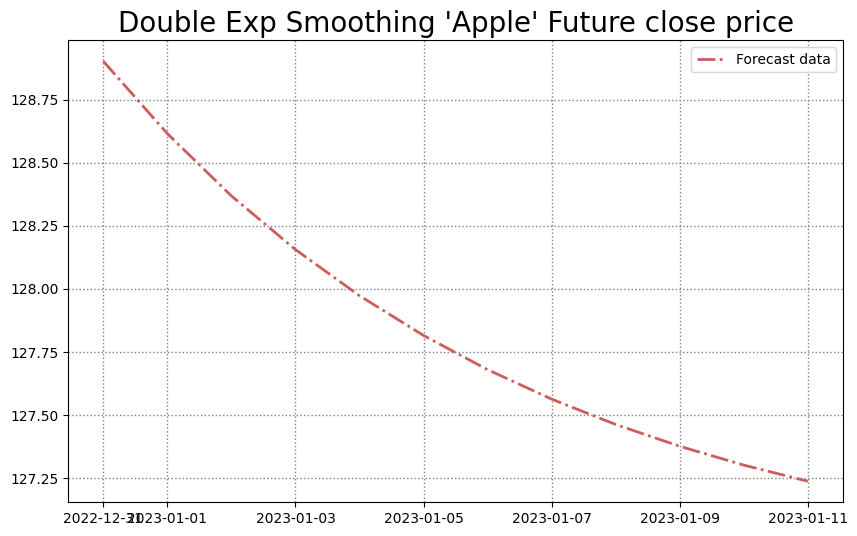

In [ ]:
# Create a date range starting after the last date in the original time series data
start_date = ts_data.index[-1] + pd.Timedelta(days=1)
end_date = start_date + pd.Timedelta(days=len(forecast)-1)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Plot the forecasted data with dates
plt.figure(figsize=(10,6))
plt.grid(color = 'grey', linestyle = ':', linewidth = 1)
plt.plot(forecast_dates, forecast, label='Forecast data',linewidth=2, color="indianred",linestyle = 'dashdot')
plt.title("Double Exp Smoothing 'Apple' Future close price", size=20 );
plt.legend()
plt.show()

The forecast made by the model on the Apple company presents a downward tendency for the next year on the “Close” price of the stocks. 

*******************

## Double Exponential Smoothing 
### Company : Google



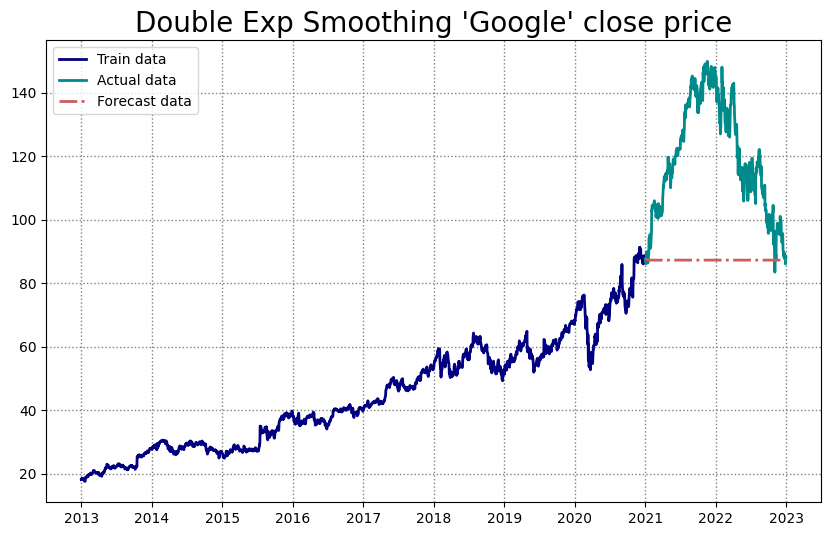

In [ ]:
# Select only the column with the time series data
ts_data = SmoothG['Close']

# Create the double exponential smoothing model
model = ExponentialSmoothing(ts_data, trend='add', damped=True, seasonal=None)

# Split the data into train and test sets
train_data = ts_data[:int(0.8*len(ts_data))]
test_data = ts_data[int(0.8*len(ts_data)):]


# Fit the model to the training data
#alpha = 0.3
#beta = 0.1
model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.1)

# Generate forecasts for the test data
forecast_data = model_fit.forecast(len(test_data))

# Plot the actual and forecasted data
plt.figure(figsize=(10,6))
plt.grid(color = 'grey', linestyle = ':', linewidth = 1)
plt.plot(train_data.index, train_data, label='Train data',linewidth=2, color="navy")
plt.plot(test_data.index, test_data, label='Actual data',linewidth=2, color="darkcyan")
plt.plot(test_data.index, forecast_data, label='Forecast data',linewidth=2, color="indianred",linestyle = 'dashdot')
plt.title("Double Exp Smoothing 'Google' close price", size=20 );
plt.legend()
plt.show()

## Evaluation of the model

In [ ]:
# Calculate mean absolute error
mae = mean_absolute_error(test_data, forecast_data)
print('MAE: %.3f' % mae)

# Calculate mean squared error
mse = mean_squared_error(test_data, forecast_data)
print('MSE: %.3f' % mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

def smape(actual, predicted):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    dividend= np.abs(np.array(actual) - np.array(predicted))
    denominator = np.array(actual) + np.array(predicted)
    
    return 2 * np.mean(np.divide(dividend, denominator, out=np.zeros_like(dividend), where=denominator!=0, casting='unsafe'))

# Calculate SMAPE
smape_val = smape(test_data, forecast_data)
print('SMAPE: %.3f' % smape_val)

MAE: 32.256
MSE: 1358.333
RMSE: 36.856
SMAPE: 0.299


The model got 29,9% away from the predicted values and the actual ones by the SMAPE.

## Set the summary of results


In [ ]:
# Initialize the level and trend components

# Create the double exponential smoothing model
model = ExponentialSmoothing(ts_data, trend='add', damped=True, seasonal=None)

# fit the model with alpha=0.3 and beta=0.1
results = model.fit(smoothing_level=0.3, smoothing_trend=0.1)

# Print the model summary
print(results.summary())

# Forecast future values
forecast = results.forecast(steps=12)

# Print the forecasted values
print(forecast)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 2518
Model:             ExponentialSmoothing   SSE                           6478.590
Optimized:                         True   AIC                           2389.606
Trend:                         Additive   BIC                           2418.762
Seasonal:                          None   AICC                          2389.650
Seasonal Periods:                  None   Date:                 Sun, 30 Apr 2023
Box-Cox:                          False   Time:                         23:29:27
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_trend            0.10000

## Potting future forecast 

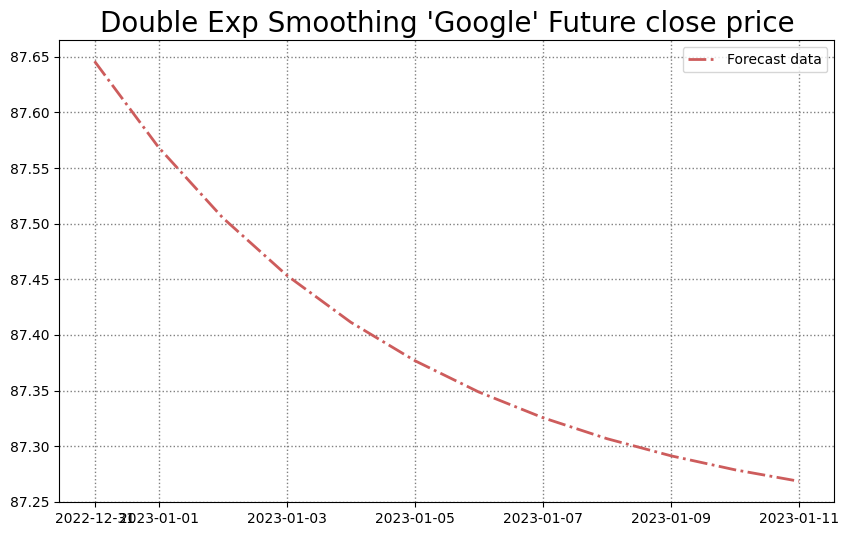

In [ ]:
# Create a date range starting after the last date in the original time series data
start_date = ts_data.index[-1] + pd.Timedelta(days=1)
end_date = start_date + pd.Timedelta(days=len(forecast)-1)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Plot the forecasted data with dates
plt.figure(figsize=(10,6))
plt.grid(color = 'grey', linestyle = ':', linewidth = 1)
plt.plot(forecast_dates, forecast, label='Forecast data',linewidth=2, color="indianred",linestyle = 'dashdot')
plt.title("Double Exp Smoothing 'Google' Future close price", size=20 );
plt.legend()
plt.show()

The forecast made by the model on the Google company presents a downward tendency for the next year on the “Close” price of the stocks. 

*************

## Double Exponential Smoothing 
### Company : Meta

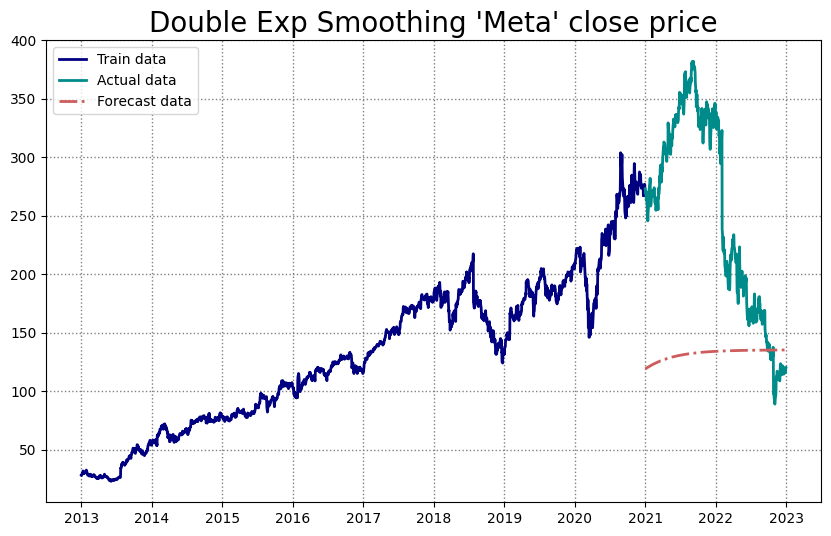

In [ ]:
# Select only the column with the time series data
ts_data = SmoothM['Close']

# Create the double exponential smoothing model
model = ExponentialSmoothing(ts_data, trend='add', damped=True, seasonal=None)

# Split the data into train and test sets
train_data = ts_data[:int(0.8*len(ts_data))]
test_data = ts_data[int(0.8*len(ts_data)):]


# Fit the model to the training data
#alpha = 0.3
#beta = 0.1
model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.1)

# Generate forecasts for the test data
forecast_data = model_fit.forecast(len(test_data))

# Plot the actual and forecasted data
plt.figure(figsize=(10,6))
plt.grid(color = 'grey', linestyle = ':', linewidth = 1)
plt.plot(train_data.index, train_data, label='Train data',linewidth=2, color="navy")
plt.plot(test_data.index, test_data, label='Actual data',linewidth=2, color="darkcyan")
plt.plot(test_data.index, forecast_data, label='Forecast data',linewidth=2, color="indianred",linestyle = 'dashdot')
plt.title("Double Exp Smoothing 'Meta' close price", size=20 );
plt.legend()
plt.show()

## Evaluation of the model


In [ ]:
# Calculate mean absolute error
mae = mean_absolute_error(test_data, forecast_data)
print('MAE: %.3f' % mae)

# Calculate mean squared error
mse = mean_squared_error(test_data, forecast_data)
print('MSE: %.3f' % mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

def smape(actual, predicted):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    dividend= np.abs(np.array(actual) - np.array(predicted))
    denominator = np.array(actual) + np.array(predicted)
    
    return 2 * np.mean(np.divide(dividend, denominator, out=np.zeros_like(dividend), where=denominator!=0, casting='unsafe'))

# Calculate SMAPE
smape_val = smape(test_data, forecast_data)
print('SMAPE: %.3f' % smape_val)

MAE: 123.244
MSE: 21546.297
RMSE: 146.787
SMAPE: 0.579


The model got 57,9% away from the predicted values and the actual ones by the SMAPE. The model performed differently in each company the lower accuracy can be explained by outliers and the performance of the stocks over the years. 

## Set the summary of results


In [ ]:
# Initialize the level and trend components

# Create the double exponential smoothing model
model = ExponentialSmoothing(ts_data, trend='add', damped=True, seasonal=None)

# fit the model with alpha=0.3 and beta=0.1
results = model.fit(smoothing_level=0.3, smoothing_trend=0.1)

# Print the model summary
print(results.summary())

# Forecast future values
forecast = results.forecast(steps=12)

# Print the forecasted values
print(forecast)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 2518
Model:             ExponentialSmoothing   SSE                          78936.170
Optimized:                         True   AIC                           8684.950
Trend:                         Additive   BIC                           8714.106
Seasonal:                          None   AICC                          8684.994
Seasonal Periods:                  None   Date:                 Sun, 30 Apr 2023
Box-Cox:                          False   Time:                         23:29:32
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_trend            0.10000

## Potting future forecast 

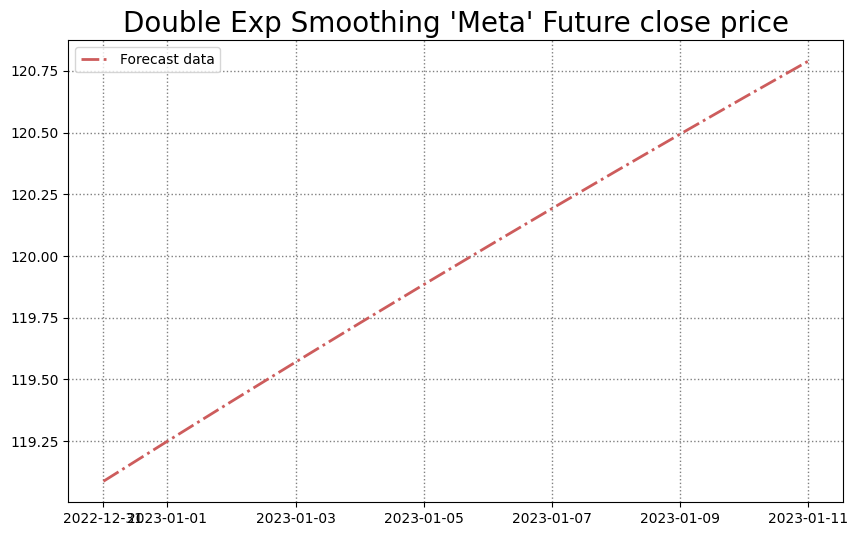

In [ ]:
# Create a date range starting after the last date in the original time series data
start_date = ts_data.index[-1] + pd.Timedelta(days=1)
end_date = start_date + pd.Timedelta(days=len(forecast)-1)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Plot the forecasted data with dates
plt.figure(figsize=(10,6))
plt.grid(color = 'grey', linestyle = ':', linewidth = 1)
plt.plot(forecast_dates, forecast, label='Forecast data',linewidth=2, color="indianred",linestyle = 'dashdot')
plt.title("Double Exp Smoothing 'Meta' Future close price", size=20 );
plt.legend()
plt.show()

The forecast made by the model on the Meta company presents an upward tendency for the next year on the “Close” price of the stocks. 

**********

## Double Exponential Smoothing 
### Company : Microsoft

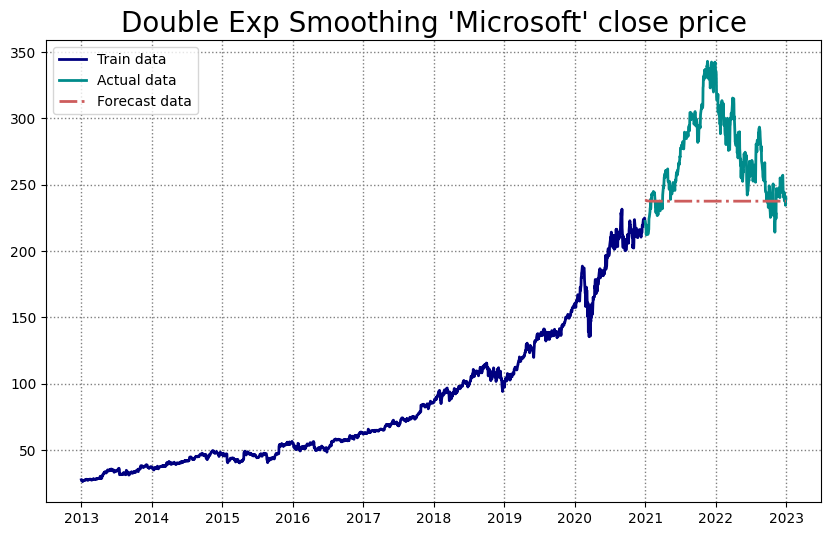

In [ ]:
# Select only the column with the time series data
ts_data = SmoothMS['Close']

# Create the double exponential smoothing model
model = ExponentialSmoothing(ts_data, trend='add', damped=True, seasonal=None)

# Split the data into train and test sets
train_data = ts_data[:int(0.8*len(ts_data))]
test_data = ts_data[int(0.8*len(ts_data)):]



# Fit the model to the training data
#alpha = 0.3
#beta = 0.1
model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.1)

# Generate forecasts for the test data
forecast_data = model_fit.forecast(len(test_data))

# Plot the actual and forecasted data
plt.figure(figsize=(10,6))
plt.grid(color = 'grey', linestyle = ':', linewidth = 1)
plt.plot(train_data.index, train_data, label='Train data',linewidth=2, color="navy")
plt.plot(test_data.index, test_data, label='Actual data',linewidth=2, color="darkcyan")
plt.plot(test_data.index, forecast_data, label='Forecast data',linewidth=2, color="indianred",linestyle = 'dashdot')
plt.title("Double Exp Smoothing 'Microsoft' close price", size=20 );
plt.legend()
plt.show()

## Evaluation of the model


In [ ]:
# Calculate mean absolute error
mae = mean_absolute_error(test_data, forecast_data)
print('MAE: %.3f' % mae)

# Calculate mean squared error
mse = mean_squared_error(test_data, forecast_data)
print('MSE: %.3f' % mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

def smape(actual, predicted):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    dividend= np.abs(np.array(actual) - np.array(predicted))
    denominator = np.array(actual) + np.array(predicted)
    
    return 2 * np.mean(np.divide(dividend, denominator, out=np.zeros_like(dividend), where=denominator!=0, casting='unsafe'))

# Calculate SMAPE
smape_val = smape(test_data, forecast_data)
print('SMAPE: %.3f' % smape_val)

MAE: 37.139
MSE: 2230.043
RMSE: 47.223
SMAPE: 0.139


The model got 13,9% away from the predicted values and the actual ones by the SMAPE. 

## Set the summary of results

In [ ]:
# Initialize the level and trend components

# Create the double exponential smoothing model
model = ExponentialSmoothing(ts_data, trend='add', damped=True, seasonal=None)

# fit the model with alpha=0.3 and beta=0.1
results = model.fit(smoothing_level=0.3, smoothing_trend=0.1)

# Print the model summary
print(results.summary())

# Forecast future values
forecast = results.forecast(steps=12)

# Print the forecasted values
print(forecast)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 2518
Model:             ExponentialSmoothing   SSE                          29117.493
Optimized:                         True   AIC                           6173.747
Trend:                         Additive   BIC                           6202.903
Seasonal:                          None   AICC                          6173.792
Seasonal Periods:                  None   Date:                 Sun, 30 Apr 2023
Box-Cox:                          False   Time:                         23:29:37
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_trend            0.10000

## Potting future forecast 

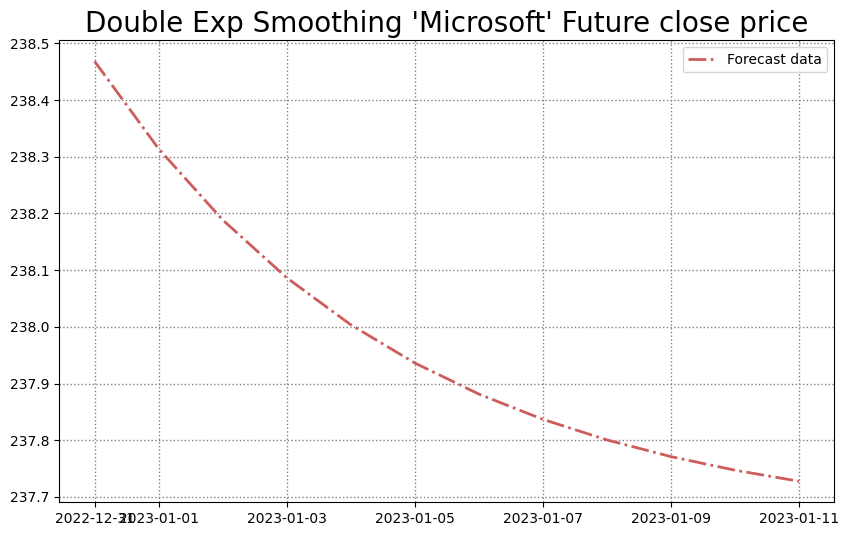

In [ ]:

# Create a date range starting after the last date in the original time series data
start_date = ts_data.index[-1] + pd.Timedelta(days=1)
end_date = start_date + pd.Timedelta(days=len(forecast)-1)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Plot the forecasted data with dates
plt.figure(figsize=(10,6))
plt.grid(color = 'grey', linestyle = ':', linewidth = 1)
plt.plot(forecast_dates, forecast, label='Forecast data',linewidth=2, color="indianred",linestyle = 'dashdot')
plt.title("Double Exp Smoothing 'Microsoft' Future close price", size=20 );
plt.legend()
plt.show()

The forecast made by the model on the Meta company presents a downward tendency for the next year on the “Close” price of the stocks. 

***************

## Sum up the results

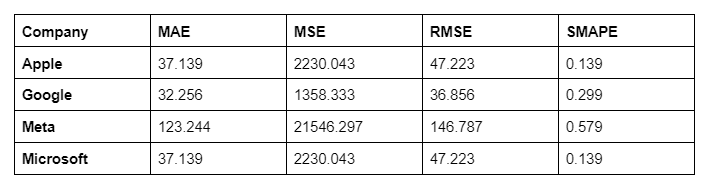

As we can tell by the outcomes, the model Double Exponential Smoothing for the companies Apple and Microsoft the forecast performed better than the others. The performance for Meta was very low, which could be explained by the profile of the stock prices over the years of the sampling as we noticed previously the dataset has outliers for that company, which affects the accuracy of the model. 

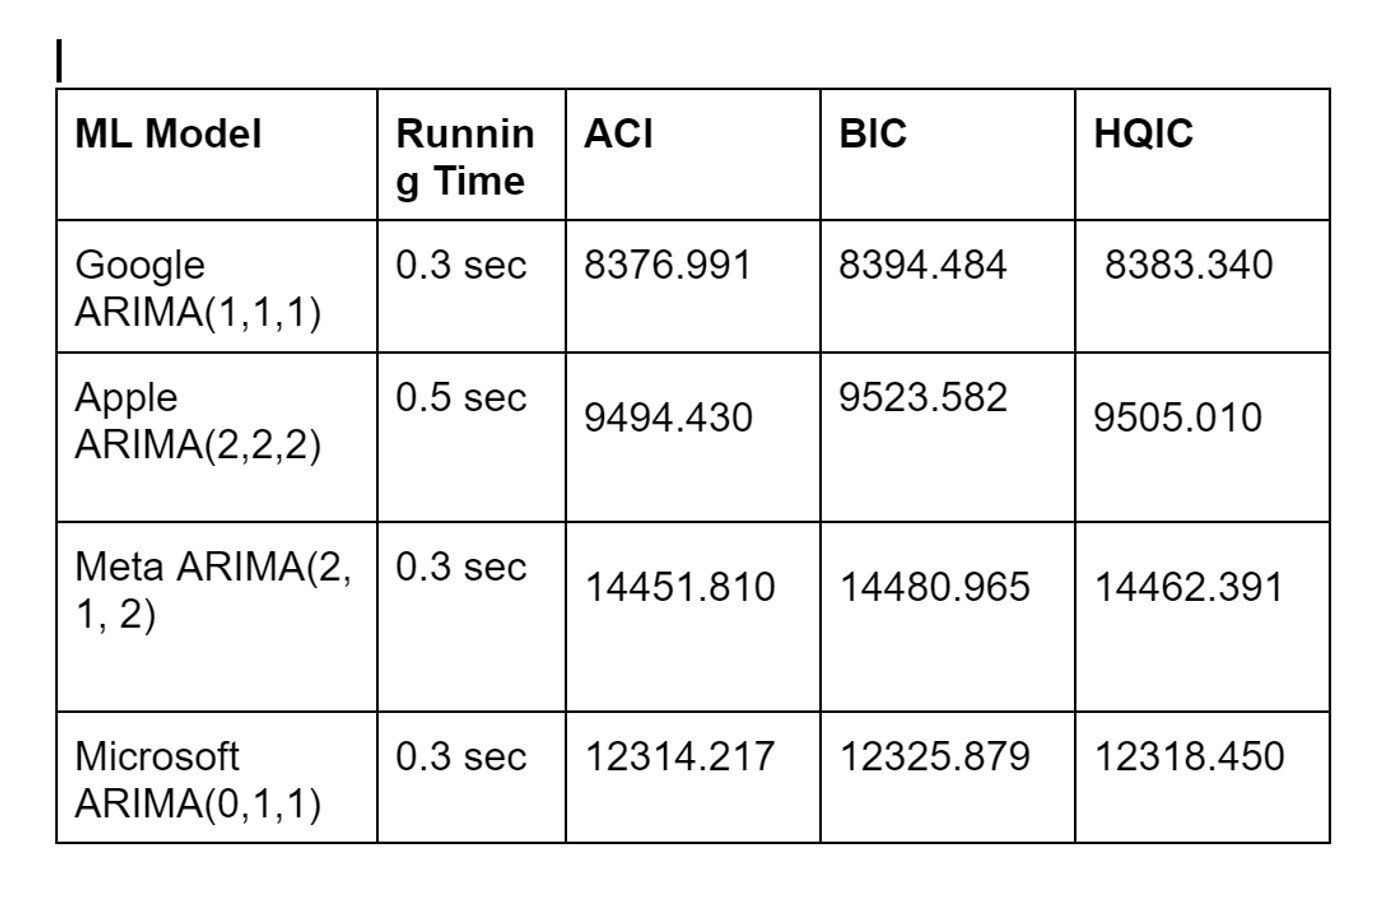

In [ ]:
from IPython.display import Image
Image(filename =r'/content/drive/MyDrive/ML_Business/Picture1.jpg', width=500)

The models have been chosen individually for each company as they have different data. The parameters were chosen by Akaike information criterion (AIC). AIC is the method for evaluating how well a model fits the data. We calculated different combinations of ARIMA(p,d,q) modelsThe model was built based on the minimum values of the AIC. The running time of the models is the same which equals 0,3 seconds. Except for the Apple model which takes around 0.5 seconds to perform. Generally, all the models have good results. However,  the lowest  ACI has the Google model, then the Apple model, Microsoft and Meta.

# Conclusion

In conclusion, Double exponential smoothie did a better job making future forecasting for stock market data than ARIMA. One of the reason might be becuase ARIMA does not perform very well making long future forcasting more than 6 months, also because for using ARIMA we had to transformed data and make it stationary before applying the model. which means that then mean and variance do not vary across time and we only have a straight line similiar to Mean value for the future. On the other hand DES works really well with trends and this dataset has a significant positive trend.  

In order to perform ARIMA model we had to take a few steps. At first, we defined stationarity / non - stationarity of the data. We perform Dicky Fuller Test to define stationarity. In order to make the data stationary we took the difference = 2 and tested the data one more time. As the data became stationary we were able to apply the model and find actual data with a number of differences and predicted values. The models were set with specific parameters of (p,d,q) for each company. To see the performance of the model we used visualisation where actual values and predicted values were very close to each other. It shows how well the model performs. 

The future prediction does not give good results as the model does not suitable for the long-term forecasting. The visualisation provides information of forecasted values. Where the values visualised as straight line.


## References

Analytics India Magazine. Complete Guide to Dickey-Fuller Test in Time Series Analysis. [online] Available at: https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/ [Accessed 20 April 2023]

Analytics Vidhya. Statistical Tests to Check Stationarity in Time Series — Part 1. [online] Available at: https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/ [Accessed 20 April 2023]

Statsmodels. statsmodels.tsa.stattools.adfuller. [online] Available at: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html [Accessed 20 April 2023]

Statistics How To. Bayesian Information Criterion: Simple Definition, Examples. [online] Available at: https://www.statisticshowto.com/bayesian-information-criterion/[Accessed 18 April 2023]

Statsmodels. statsmodels.tsa.arima.model.ARIMAResults.fittedvalues. [online] Available at: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.fittedvalues.html [Accessed 20 April 2023]

Brownlee, J. Time Series Forecast Uncertainty using Confidence Intervals in Python. [online] Available at: https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/ [Accessed 21 April 2023]

StatQuest with Josh Starmer. (2015, December 3). Statistics Fundamentals: Dickey-Fuller Test for Stationarity. [video] Available at: https://www.youtube.com/watch?v=8FCDpFhd1zk [Accessed 18 April 2023]

DataCamp. (2018, January 16). Time Series Analysis in Python - A Comprehensive Guide with Examples. [video] Available at: https://www.youtube.com/watch?v=JMT1eGJ9c2M&t=293s[Accessed 24 April 2023]

Iqbal, M. (2021). Tutorial 6 ARIMA Model (a) [PowerPoint slides]. Time Series Analysis course at CCT College [Accessed 17 April 2023]


Forbes,2023,available at:https://www.forbes.com/advisor/investing/what-is-the-stock-market/#:~:text=Investors%20make%20money%20in%20the,time%2C%20leading%20to%20capital%20gains.[accessesed:20/04/2023]

datascience, 2022, available at:https://www.datascience-pm.com/crisp-dm-2/[acessesed: 19/04/2023]


Polanitzer, R. (2022). Time-Series Methodologies — Part 4: Double Exponential Smoothing. [online] Medium. Available at: https://medium.com/@polanitzer/time-series-methodologies-part-4-double-exponential-smoothing-bc1c5b517631.[Accessed 20 April 2023]


www.digitalocean.com. (n.d.). A Guide to Time Series Visualization with Python 3 | DigitalOcean. [online] Available at: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3.[Accessed 20 April 2023]
